
              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

For 379 the number of spikes is 1
For 414 the number of spikes is 2
For 480 the number of spikes is 3
For 504 the number of spikes is 4
For 505 the number of spikes is 5
For 506 the number of spikes is 6
For 507 the number of spikes is 7
For 508 the number of spikes is 8
For 509 the number of spikes is 11
Result: [[378, 0], [379, 1], [414, 2], [480, 3], [504, 4], [505, 5], [506, 6], [507, 7], [508, 8], [509, 11]]


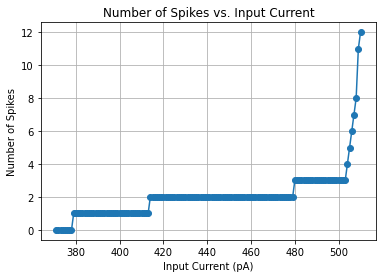

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nest

# Reset the NEST kernel
nest.ResetKernel()
nest.set_verbosity(20)  # Set NEST verbosity level to 20

# Create a spike recorder
spike_recorder = nest.Create('spike_recorder')

# Initialize variables and lists
currents = []  # List to store input currents
spike_counts = []  # List to store spike counts
min_current = 0  # Variable to store the minimum current
inc = 1  # Increment value for increasing the current
current = 370  # Initial current value
num_spikes = 0  # Variable to store the number of spikes
neuron_params = {
    'C_m': 250.0,       # Membrane capacitance (pF)
    'tau_m': 10.0,      # Membrane time constant (ms)
    't_ref': 2.0,       # Refractory period (ms)
    'E_L': 0.0,         # Resting membrane potential (mV)
    'V_th': 20.0,       # Threshold potential (mV)
    'V_reset': 10.0,    # Reset potential (mV)
    'tau_syn_ex': 0.5,  # Excitatory synaptic time constant (ms)
    'tau_syn_in': 0.5   # Inhibitory synaptic time constant (ms)
}

# Create a single neuron with the IAF_PSC_ALPHA model
neuron = nest.Create('iaf_psc_alpha')

# List to store current and spike count pairs where number of spikes increased
current_spikes_values = [[0, 0]]
current_spikes_idx = 0  # Index for current_spikes_values list
actual_number_spikes = 0  # Actual number of spikes observed
number_spikes = 0  # Number of spikes observed

# Connect the neuron to the spike recorder
nest.Connect(neuron, spike_recorder)

# Loop through the input currents from 200 to 500 in increments of 10
while current < 800 and num_spikes < 12:
    nest.SetStatus(neuron, neuron_params)
    nest.SetStatus(spike_recorder, {'n_events': 0})
    neuron = nest.Create('iaf_psc_alpha')

    # Connect the neuron to the spike recorder
    nest.Connect(neuron, spike_recorder)

    # Set the input current to the neuron
    nest.SetStatus(neuron, {'I_e': current})
    current += inc  # Increment the current

    # Simulate for 50 ms
    nest.Simulate(50.0)

    # Get the number of spikes recorded by the spike recorder
    num_spikes = nest.GetStatus(spike_recorder, 'n_events')[0]

    # Store the current and spike count
    currents.append(current)
    spike_counts.append(num_spikes)

    # Record the current and spike count if the number of spikes increased
    if num_spikes == 0 and current > min_current:
        min_current = current
        current_spikes_values[0][0] = current
        number_spikes = 0
        current_spikes_idx = 1
    if num_spikes > 0:
        if num_spikes > actual_number_spikes:
            if len(current_spikes_values) < 10:
                current_spikes_values.append([current, num_spikes])
                actual_number_spikes = num_spikes
                print("For", current, "the number of spikes is", num_spikes)
            else:
                break

# Print the result
print("Result:", current_spikes_values)

# Save the current_spikes_values as npy file
np.save('results/current_spikes_values.npy', current_spikes_values)

# Plot the number of spikes for different increments
plt.plot(currents, spike_counts, marker='o')
plt.title('Number of Spikes vs. Input Current')
plt.xlabel('Input Current (pA)')
plt.ylabel('Number of Spikes')
plt.grid(True)
plt.show()

Audio Information:
Number of samples: 1323000
Length (seconds): 30.0
Minimum value: -26270
Maximum value: 30423


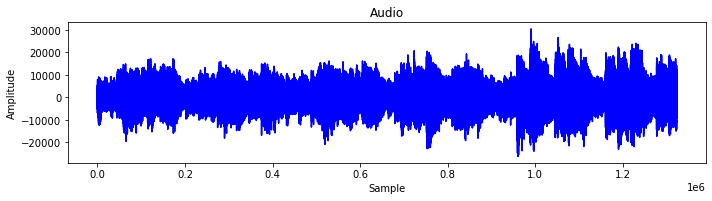

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import io
from scipy.io import wavfile

# Function to convert mp3 to wav and return its data
def read_mp3(filename):
    sound = AudioSegment.from_mp3(filename)
    with io.BytesIO() as wav_data:
        sound.export(wav_data, format="wav")
        wav_data.seek(0)
        rate, data = wavfile.read(wav_data)
    return rate, data

# Function to display sound file information
def display_info(data, rate):
    num_samples = len(data)
    length = len(data) / rate
    min_val = np.min(data)
    max_val = np.max(data)
    print("Number of samples:", num_samples)
    print("Length (seconds):", length)
    print("Minimum value:", min_val)
    print("Maximum value:", max_val)

# Read the mp3 files
rate, data = read_mp3('Sound/Song.mp3')

# Display information about each sound file
print("Audio Information:")
display_info(data, rate)

# Plot the data
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(data, color='blue')
plt.title('Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')



plt.tight_layout()
plt.show()

# Store the data in npy files
np.save('results/data.npy', data)
np.save('results/rate.npy', rate)


In [3]:
import numpy as np

# Function to get current for a given index
def get_current_for_idx(idx):
    # Load the current_spikes_values from npy file
    current_spikes_values = np.load('results/current_spikes_values.npy')

    # Check if the index is within the valid range
    if 0 <= idx < len(current_spikes_values):
        return current_spikes_values[idx][0]
    else:
        raise ValueError("Index out of range")


#####################################
# test values from 0 to 9 - Neuron 0
#####################################
# Generate 20 random indices from 0 to 9, including 0
random_indices = np.random.randint(0, 10, size=20)

# Test the function for each random index
for idx in random_indices:
    try:
        current = get_current_for_idx(idx)
        print(f"Current for index {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")

#######################################
# test values from 10 to 90 - Neuron 1
#######################################
# Generate 20 random values from 10 to 90
random_values = np.random.randint(10, 90, size=20)
# normlise values
# Test the function for each random index
for idx in random_values:
    try:
        current = get_current_for_idx(int(idx/10))
        print(f"Current for value {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")


#########################################
# test values from 100 to 900 - Neuron 2
#########################################
# Generate 20 random values from 100 to 90
random_values = np.random.randint(100, 900, size=20)
# normlise values
# Test the function for each random index
for idx in random_values:
    try:
        current = get_current_for_idx(int(idx/100))
        print(f"Current for value {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")

###########################################
# test values from 1000 to 9000 - Neuron 3
###########################################
# Generate 20 random values from 1000 to 9000
random_values = np.random.randint(1000, 9000, size=20)
# normlise values
# Test the function for each random index
for idx in random_values:
    try:
        current = get_current_for_idx(int(idx/1000))
        print(f"Current for value {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")

############################################
# test values from 10000 to 90000 - Neuron 4
############################################
# Generate 20 random values from 10000 to 90000
random_values = np.random.randint(10000, 90000, size=20)
# normlise values
# Test the function for each random index
for idx in random_values:
    try:
        current = get_current_for_idx(int(idx/1000))
        print(f"Current for value {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")

############################################
# test values from -1 to 1 - Neuron 5
############################################
# Generate 20 random values from 10000 to 90000
random_values = np.random.randint(-1, 2, size=20)
# normlise values
# Test the function for each random index
for idx in random_values:
    try:
        idx1=-idx
        if idx1<0:
            idx1=0
        current = get_current_for_idx(idx1)
        print(f"Current for value {idx}: {current}")
    except ValueError as e:
        print(f"Error: {e}")

Current for index 8: 508
Current for index 4: 504
Current for index 9: 509
Current for index 3: 480
Current for index 9: 509
Current for index 0: 378
Current for index 6: 506
Current for index 6: 506
Current for index 5: 505
Current for index 6: 506
Current for index 5: 505
Current for index 1: 379
Current for index 3: 480
Current for index 1: 379
Current for index 2: 414
Current for index 9: 509
Current for index 4: 504
Current for index 1: 379
Current for index 2: 414
Current for index 4: 504
Current for value 56: 505
Current for value 38: 480
Current for value 76: 507
Current for value 45: 504
Current for value 78: 507
Current for value 84: 508
Current for value 81: 508
Current for value 33: 480
Current for value 56: 505
Current for value 74: 507
Current for value 21: 414
Current for value 18: 379
Current for value 68: 506
Current for value 66: 506
Current for value 42: 504
Current for value 39: 480
Current for value 26: 414
Current for value 12: 379
Current for value 70: 507
Curren

In [7]:
import numpy as np

# Load the current_spikes_values array
current_spikes_values = np.load('results/current_spikes_values.npy')

# Print the shape and type of the loaded array
print(f"Shape of current_spikes_values: {current_spikes_values.shape}")
print(f"Type of current_spikes_values: {type(current_spikes_values)}")

# Function to get current for a given index
def get_current_for_idx(idx):
    """
    Get the current spike value for a given index.
    """
    if 0 <= idx < len(current_spikes_values):
        return current_spikes_values[idx]  # Direct access since it's a 1D array
    else:
        raise ValueError("Index out of range")

# Function to get currents for a given value
def get_currents_for_value(value):
    """
    Encode a value into an array of spike currents for each neuron.
    """
    currents = np.zeros(6)

    # Normalize the value to be within the range of -99999 to 99999
    value = max(-99999, min(value, 99999))

    # Encoding the value into spike currents
    if value >= 0:
        currents[5] = get_current_for_idx(0)  # Neuron 5: No spike for positive values
    else:
        currents[5] = get_current_for_idx(1)  # Neuron 5: Activate negative spike neuron

    # Break down the value by digit and encode each digit into a spike current
    currents[0] = get_current_for_idx(abs(value) % 10)
    currents[1] = get_current_for_idx((abs(value) // 10) % 10)
    currents[2] = get_current_for_idx((abs(value) // 100) % 10)
    currents[3] = get_current_for_idx((abs(value) // 1000) % 10)
    currents[4] = get_current_for_idx((abs(value) // 10000) % 10)

    return currents

# Function to decode the spike currents back into the original value
def reconstruct_value_from_currents(currents):
    """
    Decode a set of spike currents back into the original value.
    """
    # Initialize a value
    value = 0

    # Map each spike current back to its index (digit)
    indices = []
    for i in range(5):
        # Find the index of the current in current_spikes_values
        idx = np.where(current_spikes_values == currents[i])[0]
        if len(idx) == 0:
            return -11111  # Failed to find the correct mapping
        indices.append(idx[0])

    # Reconstruct the value using the same logic as in encoding
    value = indices[0] + indices[1] * 10 + indices[2] * 100 + indices[3] * 1000 + indices[4] * 10000

    # Adjust the sign based on the sixth neuron
    if currents[5] == get_current_for_idx(1):
        value *= -1

    return value

# Generate 30 random values between -99999 to 99999 (inclusive)
random_values = np.random.randint(-99999, 99999, size=30)

# Print the value, the currents for each neuron, and the reconstructed value
for value in random_values:
    currents = get_currents_for_value(value)
    reconstructed_value = reconstruct_value_from_currents(currents)
    print(f"Original Value: {value}, Currents: {currents}, Reconstructed Value: {reconstructed_value}")
    
print(current_spikes_values[:10])  # Print the first 10 elements



Shape of current_spikes_values: (41,)
Type of current_spikes_values: <class 'numpy.ndarray'>
Original Value: 42812, Currents: [2. 1. 8. 2. 4. 0.], Reconstructed Value: 42812
Original Value: 15427, Currents: [7. 2. 4. 5. 1. 0.], Reconstructed Value: 15427
Original Value: 86195, Currents: [5. 9. 1. 6. 8. 0.], Reconstructed Value: 86195
Original Value: -36194, Currents: [4. 9. 1. 6. 3. 1.], Reconstructed Value: -36194
Original Value: -65097, Currents: [7. 9. 0. 5. 6. 1.], Reconstructed Value: -65097
Original Value: -22603, Currents: [3. 0. 6. 2. 2. 1.], Reconstructed Value: -22603
Original Value: 11257, Currents: [7. 5. 2. 1. 1. 0.], Reconstructed Value: 11257
Original Value: 65458, Currents: [8. 5. 4. 5. 6. 0.], Reconstructed Value: 65458
Original Value: -16316, Currents: [6. 1. 3. 6. 1. 1.], Reconstructed Value: -16316
Original Value: 4020, Currents: [0. 2. 0. 4. 0. 0.], Reconstructed Value: 4020
Original Value: 26864, Currents: [4. 6. 8. 6. 2. 0.], Reconstructed Value: 26864
Original V

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nest
import time as tm  # Import time module with an alias
import h5py

# Function to chunk data into chunks of specified duration
def chunk_data(data, rate, duration_sec):
    chunk_size = int(rate * duration_sec)
    num_chunks = len(data) // chunk_size
    chunks = [data[i * chunk_size: (i + 1) * chunk_size] for i in range(num_chunks)]
    return chunks

# Function to plot data
def plot_data(data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(data)
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

# Function to plot raster plot
def raster_plot(raster_data, chunk_idx, num_total_neurons):
    plt.figure(figsize=(10, 5))
    plt.eventplot(raster_data, colors='black')
    plt.title(f'Raster Plot for Chunk {chunk_idx + 1}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron ID')
    plt.xlim(0, 50)  # Limit x-axis to 50 ms
    plt.ylim(0, num_total_neurons)
    plt.show()

def get_current_for_idx(idx):
    # Load the current_spikes_values from npy file
    current_spikes_values = np.load('results/current_spikes_values.npy')

    # Check if the index is within the valid range
    if 0 <= idx < len(current_spikes_values):
        return current_spikes_values[idx][0]
    else:
        raise ValueError("Index out of range")

# Function to get currents for a given value
def get_currents_for_value(value):
    # Create an array to store currents for each neuron
    currents = np.zeros(6)

    # Normalize the value to be within the range of -99999 to 99999
    value = max(-99999, min(value, 99999))

    # Compute currents for each neuron
    if value >= 0:
        currents[5] = get_current_for_idx(0)  # Neuron 5: No spike for positive values
    else:
        currents[5] = get_current_for_idx(1)  # Neuron 5: Activate negative spike neuron
    currents[0] = get_current_for_idx(value % 10)  # Neuron 0: Increment of 1
    currents[1] = get_current_for_idx((value // 10) % 10)  # Neuron 1: Increment of 10
    currents[2] = get_current_for_idx((value // 100) % 10)  # Neuron 2: Increment of 100
    currents[3] = get_current_for_idx((value // 1000) % 10)  # Neuron 3: Increment of 1000
    currents[4] = get_current_for_idx((value // 10000) % 10)  # Neuron 4: Increment of 10000
    return currents

# Function to simulate SNN and plot results
def simulate_snn(chunks, num_total_neurons):
    nest.ResetKernel()
    nest.set_verbosity(20)  # Set NEST verbosity level to 20
    nest.SetKernelStatus({'print_time': False})
    neuron_model = 'iaf_psc_alpha'
    pop_left = nest.Create(neuron_model, num_total_neurons, params=neuron_params)
    pop_right = nest.Create(neuron_model, num_total_neurons, params=neuron_params)
    spike_detector_left = nest.Create('spike_recorder')
    spike_detector_right = nest.Create('spike_recorder')

    nest.Connect(pop_left, spike_detector_left)
    nest.Connect(pop_right, spike_detector_right)

    num_chunks = len(chunks)
    total_time = 0
    for chunk_idx, chunk in enumerate(chunks):
        print("Simulating chunk", (chunk_idx+1), "of", num_chunks, "...")
        start_time = tm.time()  # Use the imported time module alias
        neuron_idx = 0

        # Reset neuron parameters and spike recorder
        nest.SetStatus(pop_left, neuron_params)
        nest.SetStatus(pop_right, neuron_params)

        for sample in chunk:
            # Convert amplitude to current and scale to suitable range
            currents_left = get_currents_for_value(sample[0])
            currents_right = get_currents_for_value(sample[1])

            # Set the current to 6 neurons of the left channel
            for i in range(0, 6):
                nest.SetStatus(pop_left[neuron_idx], {'I_e': currents_left[i]})
                nest.SetStatus(pop_right[neuron_idx], {'I_e': currents_right[i]})
                neuron_idx += 1

        nest.Simulate(50.0)  # Simulate for 50 ms

        end_time = tm.time()
        chunk_time = end_time - start_time
        total_time += chunk_time
        print(f"Chunk {chunk_idx+1} processing time: {chunk_time} seconds")

    # Get spike times
    events_left = spike_detector_left.get("events")
    senders_left = events_left["senders"]
    ts_left = events_left["times"]

    events_right = spike_detector_right.get("events")
    senders_right = events_right["senders"]
    ts_right = events_right["times"]

    np.save(f'results/data_left_senders.npy', senders_left)
    np.save(f'results/data_left_ts.npy', ts_left)
    np.save(f'results/data_right_senders.npy', senders_right)
    np.save(f'results/data_right_ts.npy', ts_right)
    # Save senders and timestamps in an HDF5 file
    filename = f"results/spike_results.h5"
    with h5py.File(filename, "w") as file:
        file.create_dataset("senders_left", data=senders_left)
        file.create_dataset("ts_left", data=ts_left)
        file.create_dataset("senders_right", data=senders_right)
        file.create_dataset("ts_right", data=ts_right)
    print(f"Total processing time: {total_time} seconds")


neuron_params = {
    'C_m': 250.0,       # Membrane capacitance (pF)
    'tau_m': 10.0,      # Membrane time constant (ms)
    't_ref': 2.0,       # Refractory period (ms)
    'E_L': 0.0,         # Resting membrane potential (mV)
    'V_th': 20.0,       # Threshold potential (mV)
    'V_reset': 10.0,    # Reset potential (mV)
    'tau_syn_ex': 0.5,  # Excitatory synaptic time constant (ms)
    'tau_syn_in': 0.5   # Inhibitory synaptic time constant (ms)
}

# Load the data from npy files
data = np.load('results/data.npy')
rate = np.load('results/rate.npy')

# Chunk the data into chunks of 1/30 second
chunk_duration = 1 / 30  # seconds
chunks = chunk_data(data, rate, chunk_duration)

num_samples = len(chunks[0])
num_neurons_per_sample = 6  # 6 neurons per channel, 2 channels

num_total_neurons = num_samples * num_neurons_per_sample

print("\nSimulating SNN for Sound chunks:")
simulate_snn(chunks, num_total_neurons)



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


Simulating SNN for Sound chunks:
Simulating chunk 1 of 900 ...
Chunk 1 processing time: 8.40617561340332 seconds
Simulating chunk 2 of 900 ...
Chunk 2 processing time: 8.199281930923462 seconds
Simulating chunk 3 of 900 ...
Chunk 3 processing time: 8.593093156814575 seconds
Simulating chunk 4 of 900 ...
Chunk 4 processing time: 274.2616856098175 seconds
Simulating chunk 5 of 900 ...
Chunk 5 processing time: 10.022499561309814 seconds
Simulating chunk 6 of 900 ...
Chunk 6 processing time: 8.392667055130005 seconds
Simulating chunk 7 of 900 ...
Chunk 7 processing time: 8.887184381484985 seconds
Simulating chunk 8 of 900 ...
Chunk 8 processing time: 176.6647756099

Chunk 96 processing time: 7.805193662643433 seconds
Simulating chunk 97 of 900 ...
Chunk 97 processing time: 7.704397916793823 seconds
Simulating chunk 98 of 900 ...
Chunk 98 processing time: 7.877969980239868 seconds
Simulating chunk 99 of 900 ...
Chunk 99 processing time: 7.973231792449951 seconds
Simulating chunk 100 of 900 ...
Chunk 100 processing time: 7.9066853523254395 seconds
Simulating chunk 101 of 900 ...
Chunk 101 processing time: 7.867971897125244 seconds
Simulating chunk 102 of 900 ...
Chunk 102 processing time: 7.949357986450195 seconds
Simulating chunk 103 of 900 ...
Chunk 103 processing time: 7.858303070068359 seconds
Simulating chunk 104 of 900 ...
Chunk 104 processing time: 7.962831735610962 seconds
Simulating chunk 105 of 900 ...
Chunk 105 processing time: 7.777537107467651 seconds
Simulating chunk 106 of 900 ...
Chunk 106 processing time: 7.683812141418457 seconds
Simulating chunk 107 of 900 ...
Chunk 107 processing time: 7.752354621887207 seconds
Simulating chunk 1

Chunk 193 processing time: 8.429514169692993 seconds
Simulating chunk 194 of 900 ...
Chunk 194 processing time: 9.27230954170227 seconds
Simulating chunk 195 of 900 ...
Chunk 195 processing time: 9.062443494796753 seconds
Simulating chunk 196 of 900 ...
Chunk 196 processing time: 9.516274213790894 seconds
Simulating chunk 197 of 900 ...
Chunk 197 processing time: 8.656397581100464 seconds
Simulating chunk 198 of 900 ...
Chunk 198 processing time: 8.718778133392334 seconds
Simulating chunk 199 of 900 ...
Chunk 199 processing time: 9.35352349281311 seconds
Simulating chunk 200 of 900 ...
Chunk 200 processing time: 8.772164583206177 seconds
Simulating chunk 201 of 900 ...
Chunk 201 processing time: 9.154582500457764 seconds
Simulating chunk 202 of 900 ...
Chunk 202 processing time: 9.044257402420044 seconds
Simulating chunk 203 of 900 ...
Chunk 203 processing time: 8.279320001602173 seconds
Simulating chunk 204 of 900 ...
Chunk 204 processing time: 7.808867931365967 seconds
Simulating chu

Chunk 290 processing time: 7.601833820343018 seconds
Simulating chunk 291 of 900 ...
Chunk 291 processing time: 7.632809162139893 seconds
Simulating chunk 292 of 900 ...
Chunk 292 processing time: 7.76276707649231 seconds
Simulating chunk 293 of 900 ...
Chunk 293 processing time: 7.825700044631958 seconds
Simulating chunk 294 of 900 ...
Chunk 294 processing time: 7.805372714996338 seconds
Simulating chunk 295 of 900 ...
Chunk 295 processing time: 7.817175626754761 seconds
Simulating chunk 296 of 900 ...
Chunk 296 processing time: 8.019657611846924 seconds
Simulating chunk 297 of 900 ...
Chunk 297 processing time: 7.786130905151367 seconds
Simulating chunk 298 of 900 ...
Chunk 298 processing time: 7.794098377227783 seconds
Simulating chunk 299 of 900 ...
Chunk 299 processing time: 7.7655580043792725 seconds
Simulating chunk 300 of 900 ...
Chunk 300 processing time: 7.93598484992981 seconds
Simulating chunk 301 of 900 ...
Chunk 301 processing time: 7.783270835876465 seconds
Simulating ch

Chunk 387 processing time: 7.843059539794922 seconds
Simulating chunk 388 of 900 ...
Chunk 388 processing time: 7.817196607589722 seconds
Simulating chunk 389 of 900 ...
Chunk 389 processing time: 8.042535543441772 seconds
Simulating chunk 390 of 900 ...
Chunk 390 processing time: 7.713747501373291 seconds
Simulating chunk 391 of 900 ...
Chunk 391 processing time: 7.806970596313477 seconds
Simulating chunk 392 of 900 ...
Chunk 392 processing time: 7.814235210418701 seconds
Simulating chunk 393 of 900 ...
Chunk 393 processing time: 7.728302717208862 seconds
Simulating chunk 394 of 900 ...
Chunk 394 processing time: 7.739844083786011 seconds
Simulating chunk 395 of 900 ...
Chunk 395 processing time: 7.78379487991333 seconds
Simulating chunk 396 of 900 ...
Chunk 396 processing time: 7.756217956542969 seconds
Simulating chunk 397 of 900 ...
Chunk 397 processing time: 8.006206512451172 seconds
Simulating chunk 398 of 900 ...
Chunk 398 processing time: 7.794814825057983 seconds
Simulating ch

Chunk 484 processing time: 7.847513675689697 seconds
Simulating chunk 485 of 900 ...
Chunk 485 processing time: 7.981269121170044 seconds
Simulating chunk 486 of 900 ...
Chunk 486 processing time: 7.96565842628479 seconds
Simulating chunk 487 of 900 ...
Chunk 487 processing time: 7.835860252380371 seconds
Simulating chunk 488 of 900 ...
Chunk 488 processing time: 7.787126541137695 seconds
Simulating chunk 489 of 900 ...
Chunk 489 processing time: 8.046853065490723 seconds
Simulating chunk 490 of 900 ...
Chunk 490 processing time: 7.966350317001343 seconds
Simulating chunk 491 of 900 ...
Chunk 491 processing time: 7.967190504074097 seconds
Simulating chunk 492 of 900 ...
Chunk 492 processing time: 7.828940153121948 seconds
Simulating chunk 493 of 900 ...
Chunk 493 processing time: 7.850091218948364 seconds
Simulating chunk 494 of 900 ...
Chunk 494 processing time: 7.9141480922698975 seconds
Simulating chunk 495 of 900 ...
Chunk 495 processing time: 7.8407909870147705 seconds
Simulating 

Chunk 581 processing time: 7.827588319778442 seconds
Simulating chunk 582 of 900 ...
Chunk 582 processing time: 7.965238094329834 seconds
Simulating chunk 583 of 900 ...
Chunk 583 processing time: 7.846027851104736 seconds
Simulating chunk 584 of 900 ...
Chunk 584 processing time: 7.8043763637542725 seconds
Simulating chunk 585 of 900 ...
Chunk 585 processing time: 7.826029539108276 seconds
Simulating chunk 586 of 900 ...
Chunk 586 processing time: 7.786332130432129 seconds
Simulating chunk 587 of 900 ...
Chunk 587 processing time: 7.788405895233154 seconds
Simulating chunk 588 of 900 ...
Chunk 588 processing time: 7.714197874069214 seconds
Simulating chunk 589 of 900 ...
Chunk 589 processing time: 7.8445963859558105 seconds
Simulating chunk 590 of 900 ...
Chunk 590 processing time: 7.869818687438965 seconds
Simulating chunk 591 of 900 ...
Chunk 591 processing time: 7.857537508010864 seconds
Simulating chunk 592 of 900 ...
Chunk 592 processing time: 7.626152515411377 seconds
Simulating

Chunk 678 processing time: 7.722697973251343 seconds
Simulating chunk 679 of 900 ...
Chunk 679 processing time: 7.933173179626465 seconds
Simulating chunk 680 of 900 ...
Chunk 680 processing time: 7.780197620391846 seconds
Simulating chunk 681 of 900 ...
Chunk 681 processing time: 8.000511646270752 seconds
Simulating chunk 682 of 900 ...
Chunk 682 processing time: 7.815534591674805 seconds
Simulating chunk 683 of 900 ...
Chunk 683 processing time: 8.432936906814575 seconds
Simulating chunk 684 of 900 ...
Chunk 684 processing time: 8.050399780273438 seconds
Simulating chunk 685 of 900 ...
Chunk 685 processing time: 7.933928728103638 seconds
Simulating chunk 686 of 900 ...
Chunk 686 processing time: 7.8992297649383545 seconds
Simulating chunk 687 of 900 ...
Chunk 687 processing time: 8.011273384094238 seconds
Simulating chunk 688 of 900 ...
Chunk 688 processing time: 7.909488916397095 seconds
Simulating chunk 689 of 900 ...
Chunk 689 processing time: 7.897221326828003 seconds
Simulating 

Chunk 775 processing time: 8.113780736923218 seconds
Simulating chunk 776 of 900 ...
Chunk 776 processing time: 7.882367372512817 seconds
Simulating chunk 777 of 900 ...
Chunk 777 processing time: 7.780613422393799 seconds
Simulating chunk 778 of 900 ...
Chunk 778 processing time: 7.8438498973846436 seconds
Simulating chunk 779 of 900 ...
Chunk 779 processing time: 7.910536527633667 seconds
Simulating chunk 780 of 900 ...
Chunk 780 processing time: 7.894556522369385 seconds
Simulating chunk 781 of 900 ...
Chunk 781 processing time: 7.862064838409424 seconds
Simulating chunk 782 of 900 ...
Chunk 782 processing time: 7.7220141887664795 seconds
Simulating chunk 783 of 900 ...
Chunk 783 processing time: 8.40816855430603 seconds
Simulating chunk 784 of 900 ...
Chunk 784 processing time: 8.492166757583618 seconds
Simulating chunk 785 of 900 ...
Chunk 785 processing time: 8.360055685043335 seconds
Simulating chunk 786 of 900 ...
Chunk 786 processing time: 8.217113733291626 seconds
Simulating 

Chunk 872 processing time: 8.149117231369019 seconds
Simulating chunk 873 of 900 ...
Chunk 873 processing time: 7.8993613719940186 seconds
Simulating chunk 874 of 900 ...
Chunk 874 processing time: 7.867316484451294 seconds
Simulating chunk 875 of 900 ...
Chunk 875 processing time: 7.70011043548584 seconds
Simulating chunk 876 of 900 ...
Chunk 876 processing time: 8.099277973175049 seconds
Simulating chunk 877 of 900 ...
Chunk 877 processing time: 7.882341384887695 seconds
Simulating chunk 878 of 900 ...
Chunk 878 processing time: 7.9111480712890625 seconds
Simulating chunk 879 of 900 ...
Chunk 879 processing time: 7.81486964225769 seconds
Simulating chunk 880 of 900 ...
Chunk 880 processing time: 7.7510154247283936 seconds
Simulating chunk 881 of 900 ...
Chunk 881 processing time: 7.852244853973389 seconds
Simulating chunk 882 of 900 ...
Chunk 882 processing time: 7.907906770706177 seconds
Simulating chunk 883 of 900 ...
Chunk 883 processing time: 7.898705959320068 seconds
Simulating 

1 8819
1 8819
55.300000000000004 45000.0
55.300000000000004 45000.0
++++++++++++++++++ Processing data... +++++++++++++++++++++++
Starting normalization ...
Processing left...
Left completed ...
Processing right...
Normalization completed!
Preparing raster plots...


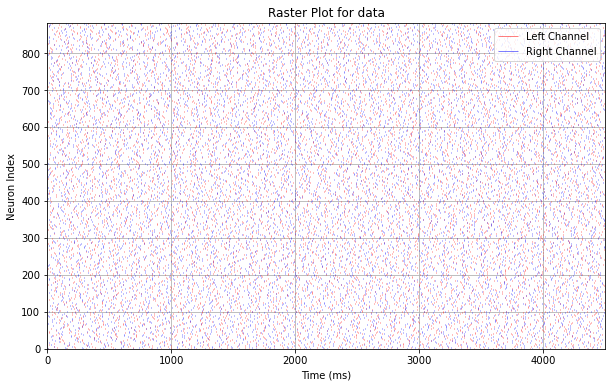

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.sparse import lil_matrix, csr_matrix, save_npz, load_npz

# Function to chunk data into chunks of specified duration
def chunk_data_info(data, rate, duration_sec):
    chunk_size = int(rate * duration_sec)
    num_chunks = len(data) // chunk_size
    return num_chunks, chunk_size

def create_sparse_normalised_3D_matrix(data_name, times_left, senders_left, times_right, senders_right, rows, cols, downsample_factor=10):
    rows_downsampled = rows // downsample_factor
    cols_downsampled = (cols // downsample_factor) + 1  # Add 1 to handle rounding issues

    normalised_3Dmat_left = lil_matrix((rows_downsampled, cols_downsampled), dtype=np.uint8)
    normalised_3Dmat_right = lil_matrix((rows_downsampled, cols_downsampled), dtype=np.uint8)

    print("Starting normalization ...\nProcessing left...")
    for i in range(len(times_left)):
        row_idx = int(senders_left[i]) // downsample_factor
        col_idx = int(np.round(times_left[i], 0)) // downsample_factor
        if row_idx < rows_downsampled and col_idx < cols_downsampled:
            normalised_3Dmat_left[row_idx, col_idx] = 1

    print("Left completed ...\nProcessing right...")
    for i in range(len(times_right)):
        row_idx = int(senders_right[i]) // downsample_factor
        col_idx = int(np.round(times_right[i], 0)) // downsample_factor
        if row_idx < rows_downsampled and col_idx < cols_downsampled:
            normalised_3Dmat_right[row_idx, col_idx] = 1

    # Convert to CSR format for efficient storage and processing
    normalised_3Dmat_left = normalised_3Dmat_left.tocsr()
    normalised_3Dmat_right = normalised_3Dmat_right.tocsr()

    # Save the sparse matrices
    save_npz(f"results/normalised_3Dmat_{data_name}_left.npz", normalised_3Dmat_left)
    save_npz(f"results/normalised_3Dmat_{data_name}_right.npz", normalised_3Dmat_right)

    print("Normalization completed!")
    return normalised_3Dmat_left, normalised_3Dmat_right

def raster_plot_optimized(normalised_3Dmat_left, normalised_3Dmat_right, data_name, plot_resolution=100):
    """
    Optimized plot raster plot for spike events split between left and right channels.

    Parameters:
        normalised_3Dmat_left (scipy.sparse.csr_matrix): Sparse matrix for the left channel.
        normalised_3Dmat_right (scipy.sparse.csr_matrix): Sparse matrix for the right channel.
        data_name (str): Identifier for the data set.
        plot_resolution (int): Resolution for the plot to reduce the number of data points.
    
    Returns:
        None
    """
    print("Preparing raster plots...")

    fig, ax = plt.subplots(figsize=(10, 6))

    def plot_channel_spikes(normalised_3Dmat, color, label):
        spikes = np.vstack(normalised_3Dmat.nonzero()).T
        if spikes.size == 0:
            print(f"No spikes found for {label}.")
            return
        spikes = spikes[::plot_resolution]  # Reduce data points for plotting
        segments = [((t, n), (t, n + 1)) for n, t in spikes]
        line_collection = LineCollection(segments, colors=color, label=label, linewidths=0.5)
        ax.add_collection(line_collection)

    # Plot left and right channel spikes
    plot_channel_spikes(normalised_3Dmat_left, 'red', 'Left Channel')
    plot_channel_spikes(normalised_3Dmat_right, 'blue', 'Right Channel')

    ax.set_xlim(0, normalised_3Dmat_left.shape[1])
    ax.set_ylim(0, normalised_3Dmat_left.shape[0])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Neuron Index')
    ax.set_title(f'Raster Plot for {data_name}')
    ax.legend()
    ax.grid(True)

    plt.savefig(f"results/{data_name}_raster_plot.png")
    plt.show()

# Load the data from npy files
data = np.load('results/data.npy')
rate = np.load('results/rate.npy')
senders_left = np.load(f'results/data_left_senders.npy')
ts_left = np.load(f'results/data_left_ts.npy')
senders_right = np.load(f'results/data_right_senders.npy')
ts_right = np.load(f'results/data_right_ts.npy')

# Prepare the data for processing
data_shape = data.shape
reconstructed_data = np.zeros(data_shape)
num_neurons_per_sample = 6
samp_period = 1 / 30
time_step = 50

num_chunks, chunk_size = chunk_data_info(data, rate, samp_period)
num_total_neurons = chunk_size * num_neurons_per_sample

# Normalize senders for the right channel
senders_right -= num_total_neurons

# Print information about the data
print(np.min(senders_left), np.max(senders_left))
print(np.min(senders_right), np.max(senders_right))
print(np.min(ts_left), np.max(ts_left))
print(np.min(ts_right), np.max(ts_right))

# Process and plot data
print(f"++++++++++++++++++ Processing data... +++++++++++++++++++++++")
num_cols = int(np.max([np.max(ts_left), np.max(ts_right)])) + 1
normalised_3Dmat_left, normalised_3Dmat_right = create_sparse_normalised_3D_matrix("data", ts_left, senders_left, ts_right, senders_right, num_total_neurons, num_cols, downsample_factor=10)

# Use the optimized raster plot function
raster_plot_optimized(normalised_3Dmat_left, normalised_3Dmat_right, "data", plot_resolution=100)


Successfully loaded data from results/data.npy.
Successfully loaded data from results/rate.npy.
Successfully loaded sparse matrix from results/normalised_3Dmat_data_left.npz.
Successfully loaded sparse matrix from results/normalised_3Dmat_data_right.npz.


Processing simulation time-steps:   0%|                  | 0/87 [00:00<?, ?it/s]

Spike counts left: [30 35 24 32 30 25]
Spike counts right: [35 30 28 36 28 31]
Spike counts left: [26 30 33 39 24 38]
Spike counts right: [33 27 32 37 39 38]
Spike counts left: [30 24 32 33 21 25]
Spike counts right: [33 28 35 32 27 32]
Spike counts left: [26 26 24 22 28 27]
Spike counts right: [32 31 26 30 29 32]
Spike counts left: [24 27 26 37 29 32]
Spike counts right: [27 27 26 32 23 33]
Spike counts left: [31 25 26 26 24 29]
Spike counts right: [33 22 31 32 25 33]
Spike counts left: [32 32 40 32 26 31]
Spike counts right: [32 33 34 31 30 33]
Spike counts left: [33 20 28 34 28 25]
Spike counts right: [30 23 25 28 25 32]
Spike counts left: [29 31 31 31 27 25]
Spike counts right: [27 26 22 28 29 30]
Spike counts left: [36 23 32 26 24 28]
Spike counts right: [23 24 31 31 27 36]
Spike counts left: [27 23 23 29 33 27]
Spike counts right: [31 33 28 28 24 33]
Spike counts left: [24 28 26 29 27 20]
Spike counts right: [33 21 29 35 31 24]
Spike counts left: [30 30 29 34 23 35]
Spike counts 

Processing simulation time-steps:   1%|          | 1/87 [00:00<00:40,  2.11it/s]

Spike counts left: [31 29 22 24 23 27]
Spike counts right: [32 22 31 30 31 37]
Spike counts left: [29 31 26 27 25 30]
Spike counts right: [31 29 35 35 32 30]
Spike counts left: [28 29 28 30 28 31]
Spike counts right: [31 25 34 37 28 27]
Spike counts left: [29 29 24 31 29 26]
Spike counts right: [30 33 32 35 31 34]
Spike counts left: [26 20 34 29 20 22]
Spike counts right: [32 30 28 32 31 24]
Spike counts left: [26 25 26 32 19 29]
Spike counts right: [36 29 32 30 22 23]
Spike counts left: [30 20 21 23 27 29]
Spike counts right: [28 27 32 33 23 24]
Spike counts left: [33 29 21 32 23 29]
Spike counts right: [30 27 25 33 26 34]
Spike counts left: [34 26 26 28 22 30]
Spike counts right: [32 32 33 25 31 25]
Spike counts left: [34 30 33 30 30 31]
Spike counts right: [36 25 31 32 27 29]
Spike counts left: [29 26 29 32 25 30]
Spike counts right: [33 20 34 27 24 23]
Spike counts left: [37 28 37 36 27 34]
Spike counts right: [27 27 22 29 29 35]
Spike counts left: [40 22 26 27 21 30]
Spike counts 

Spike counts left: [22 28 26 34 30 26]
Spike counts right: [38 26 33 35 30 27]
Spike counts left: [32 30 36 40 31 27]
Spike counts right: [31 30 28 37 25 33]
Spike counts left: [37 27 32 37 26 28]
Spike counts right: [31 34 29 30 28 34]
Spike counts left: [33 22 24 38 26 24]
Spike counts right: [34 30 34 44 30 26]
Spike counts left: [32 30 34 31 28 27]
Spike counts right: [32 31 38 39 28 27]
Spike counts left: [32 24 31 31 26 31]
Spike counts right: [28 30 30 32 27 38]
Spike counts left: [28 24 37 33 24 22]
Spike counts right: [37 34 33 38 35 38]
Spike counts left: [35 26 32 37 31 38]
Spike counts right: [33 35 31 41 35 38]
Spike counts left: [39 34 29 39 27 21]
Spike counts right: [33 32 30 42 33 36]
Spike counts left: [30 33 29 36 28 39]
Spike counts right: [42 34 29 34 27 35]
Spike counts left: [37 35 38 37 31 31]
Spike counts right: [37 34 34 37 29 39]
Spike counts left: [36 30 35 42 33 32]
Spike counts right: [39 36 31 29 34 30]
Spike counts left: [35 31 25 31 28 20]
Spike counts 

Processing simulation time-steps:   2%|▏         | 2/87 [00:00<00:37,  2.24it/s]

Spike counts left: [35 31 34 31 28 27]
Spike counts right: [37 35 39 32 30 31]
Spike counts left: [36 31 30 31 26 34]
Spike counts right: [32 33 32 40 22 36]
Spike counts left: [30 35 34 34 35 26]
Spike counts right: [31 31 26 37 26 36]
Spike counts left: [30 44 32 35 32 26]
Spike counts right: [37 25 29 31 28 34]
Spike counts left: [36 25 33 39 28 32]
Spike counts right: [38 23 38 41 27 33]
Spike counts left: [33 25 28 32 24 24]
Spike counts right: [41 31 39 34 29 36]
Spike counts left: [32 28 32 29 25 30]
Spike counts right: [36 31 31 31 29 42]
Spike counts left: [34 31 25 34 31 32]
Spike counts right: [33 34 32 34 29 37]
Spike counts left: [33 31 24 34 34 40]
Spike counts right: [34 31 34 33 30 34]
Spike counts left: [35 27 31 36 29 30]
Spike counts right: [35 32 33 35 33 38]
Spike counts left: [39 23 33 35 30 28]
Spike counts right: [38 30 39 36 38 29]
Spike counts left: [35 29 27 37 25 24]
Spike counts right: [37 32 36 39 31 35]
Spike counts left: [30 27 28 27 25 24]
Spike counts 

Spike counts left: [31 25 33 30 23 36]
Spike counts right: [34 28 38 41 29 34]
Spike counts left: [31 27 34 37 25 23]
Spike counts right: [31 27 27 29 30 29]
Spike counts left: [34 29 30 37 27 30]
Spike counts right: [29 23 35 36 22 32]
Spike counts left: [30 26 30 31 20 35]
Spike counts right: [31 26 29 30 21 26]
Spike counts left: [41 32 35 24 29 31]
Spike counts right: [39 34 37 35 33 38]
Spike counts left: [30 28 36 36 25 25]
Spike counts right: [37 35 36 33 26 29]
Spike counts left: [30 23 27 33 31 30]
Spike counts right: [34 25 39 37 33 33]
Spike counts left: [35 25 22 42 28 31]
Spike counts right: [34 29 36 34 35 33]
Spike counts left: [31 27 28 33 24 30]
Spike counts right: [30 25 28 26 28 33]
Spike counts left: [34 26 33 36 29 33]
Spike counts right: [30 24 27 34 25 31]
Spike counts left: [36 34 43 34 30 25]
Spike counts right: [33 29 34 35 26 39]
Spike counts left: [36 25 33 40 29 31]
Spike counts right: [40 30 31 39 33 35]
Spike counts left: [34 31 30 29 32 27]
Spike counts 

Processing simulation time-steps:   3%|▎         | 3/87 [00:01<00:37,  2.27it/s]

Spike counts left: [28 35 36 37 33 38]
Spike counts right: [37 36 33 34 26 34]
Spike counts left: [31 36 37 42 34 30]
Spike counts right: [36 36 32 39 28 38]
Spike counts left: [34 28 31 37 31 37]
Spike counts right: [40 24 39 36 29 35]
Spike counts left: [42 32 30 39 34 32]
Spike counts right: [36 33 29 35 32 42]
Spike counts left: [30 34 33 45 38 41]
Spike counts right: [43 36 34 37 32 40]
Spike counts left: [38 33 33 33 31 29]
Spike counts right: [34 27 31 31 30 34]
Spike counts left: [36 39 44 41 40 34]
Spike counts right: [34 32 33 37 26 34]
Spike counts left: [42 34 28 41 33 36]
Spike counts right: [31 35 39 34 37 35]
Spike counts left: [42 31 37 38 34 37]
Spike counts right: [39 34 34 36 30 41]
Spike counts left: [33 30 34 38 36 39]
Spike counts right: [34 30 29 36 29 36]
Spike counts left: [33 35 41 39 30 32]
Spike counts right: [36 29 37 37 27 29]
Spike counts left: [35 30 34 38 31 38]
Spike counts right: [30 34 35 41 29 37]
Spike counts left: [37 29 42 42 32 32]
Spike counts 

Spike counts left: [46 34 33 32 35 29]
Spike counts right: [41 39 36 39 34 35]
Spike counts left: [32 25 28 39 30 27]
Spike counts right: [38 36 40 35 35 44]
Spike counts left: [40 30 32 38 32 37]
Spike counts right: [36 31 34 36 30 37]
Spike counts left: [39 36 36 36 31 39]
Spike counts right: [33 30 37 41 31 33]
Spike counts left: [31 35 33 32 30 30]
Spike counts right: [31 23 36 38 34 39]
Spike counts left: [32 28 30 34 29 29]
Spike counts right: [37 34 32 39 31 27]
Spike counts left: [32 25 34 36 36 35]
Spike counts right: [41 29 32 33 29 36]
Spike counts left: [38 29 31 38 30 40]
Spike counts right: [31 34 34 37 35 35]
Spike counts left: [32 31 28 35 27 31]
Spike counts right: [35 28 39 26 31 32]
Spike counts left: [37 36 44 38 33 39]
Spike counts right: [35 29 31 33 36 41]
Spike counts left: [36 39 35 39 30 35]
Spike counts right: [34 25 38 37 27 34]
Spike counts left: [37 30 35 41 36 41]
Spike counts right: [32 31 41 42 30 35]
Spike counts left: [41 32 42 38 29 29]
Spike counts 

Processing simulation time-steps:   5%|▍         | 4/87 [00:01<00:37,  2.23it/s]

Spike counts left: [38 25 34 32 31 35]
Spike counts right: [31 31 40 41 33 33]
Spike counts left: [40 36 32 39 30 36]
Spike counts right: [35 37 30 37 36 32]
Spike counts left: [40 26 39 34 36 40]
Spike counts right: [44 37 38 42 32 35]
Spike counts left: [41 34 41 36 32 36]
Spike counts right: [31 27 31 39 34 39]
Spike counts left: [41 33 39 36 39 22]
Spike counts right: [38 27 30 41 29 37]
Spike counts left: [39 29 37 39 35 33]
Spike counts right: [39 28 36 34 35 36]
Spike counts left: [39 31 39 38 32 32]
Spike counts right: [32 29 32 29 31 37]
Spike counts left: [42 29 36 36 32 40]
Spike counts right: [32 23 34 32 30 41]
Spike counts left: [33 33 34 33 36 32]
Spike counts right: [38 36 37 41 26 40]
Spike counts left: [33 34 32 38 35 40]
Spike counts right: [30 33 33 36 32 28]
Spike counts left: [37 32 36 34 28 36]
Spike counts right: [29 37 34 33 28 32]
Spike counts left: [37 27 31 37 30 33]
Spike counts right: [39 29 37 33 26 25]
Spike counts left: [35 32 38 38 26 33]
Spike counts 

Spike counts left: [37 35 32 31 32 30]
Spike counts right: [36 32 30 35 22 28]
Spike counts left: [35 30 33 36 27 36]
Spike counts right: [33 24 29 35 29 31]
Spike counts left: [38 31 38 41 32 35]
Spike counts right: [38 30 34 44 30 33]
Spike counts left: [35 36 32 38 33 34]
Spike counts right: [37 31 32 42 36 38]
Spike counts left: [41 32 30 34 31 40]
Spike counts right: [42 32 30 30 29 39]
Spike counts left: [34 29 34 37 28 38]
Spike counts right: [32 28 32 36 27 28]
Spike counts left: [34 36 30 34 31 32]
Spike counts right: [32 26 31 35 33 36]
Spike counts left: [31 29 32 39 30 37]
Spike counts right: [35 34 30 31 31 37]
Spike counts left: [38 33 37 33 35 34]
Spike counts right: [35 34 43 43 30 36]
Spike counts left: [32 27 36 33 31 32]
Spike counts right: [38 29 29 36 36 36]
Spike counts left: [31 28 34 41 35 30]
Spike counts right: [37 27 28 34 32 38]
Spike counts left: [29 33 31 36 38 35]
Spike counts right: [34 34 41 36 25 29]
Spike counts left: [41 31 33 29 27 36]
Spike counts 

Processing simulation time-steps:   6%|▌         | 5/87 [00:02<00:37,  2.20it/s]

Spike counts left: [34 33 30 36 32 37]
Spike counts right: [32 29 32 32 27 34]
Spike counts left: [39 28 40 33 40 35]
Spike counts right: [35 32 31 35 25 34]
Spike counts left: [30 39 33 34 30 38]
Spike counts right: [33 30 33 37 29 33]
Spike counts left: [40 35 42 35 39 43]
Spike counts right: [32 25 33 35 26 36]
Spike counts left: [37 29 29 31 28 35]
Spike counts right: [34 25 33 33 29 33]
Spike counts left: [34 34 37 34 29 31]
Spike counts right: [37 33 38 43 30 34]
Spike counts left: [38 29 31 45 35 33]
Spike counts right: [34 30 33 29 28 35]
Spike counts left: [34 21 34 36 29 30]
Spike counts right: [47 29 23 30 27 29]
Spike counts left: [34 26 32 33 26 36]
Spike counts right: [38 22 33 42 29 29]
Spike counts left: [33 27 34 37 35 38]
Spike counts right: [33 29 32 37 28 42]
Spike counts left: [31 34 34 34 39 37]
Spike counts right: [39 30 32 26 37 35]
Spike counts left: [31 32 38 32 25 37]
Spike counts right: [30 31 32 32 38 32]
Spike counts left: [38 26 35 30 26 35]
Spike counts 

Spike counts left: [43 31 36 41 33 33]
Spike counts right: [39 38 29 34 30 34]
Spike counts left: [34 28 30 41 29 34]
Spike counts right: [38 29 37 40 26 26]
Spike counts left: [35 30 34 35 26 32]
Spike counts right: [31 34 33 37 32 35]
Spike counts left: [39 29 27 36 30 34]
Spike counts right: [39 35 35 37 31 31]
Spike counts left: [39 33 33 38 35 32]
Spike counts right: [32 37 35 37 34 36]
Spike counts left: [40 33 34 33 30 32]
Spike counts right: [39 30 33 31 36 32]
Spike counts left: [36 34 33 33 32 32]
Spike counts right: [28 34 34 36 31 33]
Spike counts left: [31 28 26 33 36 39]
Spike counts right: [39 30 31 36 34 35]
Spike counts left: [41 27 31 36 29 40]
Spike counts right: [35 34 34 34 28 33]
Spike counts left: [35 36 37 35 36 36]
Spike counts right: [30 24 41 36 30 33]
Spike counts left: [36 28 32 38 27 38]
Spike counts right: [35 28 38 41 31 37]
Spike counts left: [31 30 38 34 29 37]
Spike counts right: [31 35 34 29 35 34]
Spike counts left: [39 26 35 32 30 40]
Spike counts 

Processing simulation time-steps:   7%|▋         | 6/87 [00:02<00:39,  2.07it/s]

Spike counts left: [35 27 30 39 24 34]
Spike counts right: [40 32 37 37 25 33]
Spike counts left: [36 27 26 33 31 40]
Spike counts right: [35 34 35 34 29 37]
Spike counts left: [34 31 39 34 43 30]
Spike counts right: [40 36 34 32 35 33]
Spike counts left: [37 33 33 39 38 39]
Spike counts right: [39 31 36 39 30 29]
Spike counts left: [48 40 35 39 38 38]
Spike counts right: [34 35 32 38 27 36]
Spike counts left: [39 29 36 29 30 31]
Spike counts right: [35 30 37 38 35 37]
Spike counts left: [32 35 38 37 28 32]
Spike counts right: [36 27 35 33 37 40]
Spike counts left: [34 28 27 33 30 36]
Spike counts right: [35 35 35 36 26 40]
Spike counts left: [38 36 29 34 37 36]
Spike counts right: [44 38 38 38 34 35]
Spike counts left: [38 34 41 38 31 35]
Spike counts right: [35 34 36 37 41 34]
Spike counts left: [37 31 32 32 28 32]
Spike counts right: [41 33 35 35 26 36]
Spike counts left: [35 33 32 34 32 24]
Spike counts right: [30 33 32 37 28 33]
Spike counts left: [38 31 28 31 35 32]
Spike counts 

Spike counts left: [37 25 36 34 28 36]
Spike counts right: [31 30 38 33 32 32]
Spike counts left: [33 36 33 35 24 32]
Spike counts right: [35 36 40 37 29 38]
Spike counts left: [39 36 37 38 37 42]
Spike counts right: [26 35 31 40 38 39]
Spike counts left: [34 28 30 40 38 33]
Spike counts right: [37 31 33 33 31 40]
Spike counts left: [36 32 35 38 31 30]
Spike counts right: [35 34 34 38 24 34]
Spike counts left: [32 32 36 34 32 34]
Spike counts right: [34 30 29 37 26 36]
Spike counts left: [35 25 39 36 30 36]
Spike counts right: [33 34 31 34 25 35]
Spike counts left: [29 35 37 39 39 38]
Spike counts right: [39 33 31 34 33 29]
Spike counts left: [32 30 41 37 30 34]
Spike counts right: [31 30 39 33 32 32]
Spike counts left: [28 29 34 39 25 32]
Spike counts right: [28 37 38 45 38 37]
Spike counts left: [37 36 37 37 31 33]
Spike counts right: [37 30 32 40 31 34]
Spike counts left: [32 30 41 46 37 38]
Spike counts right: [36 36 34 32 35 36]
Spike counts left: [39 37 33 36 29 33]
Spike counts 

Processing simulation time-steps:   8%|▊         | 7/87 [00:03<00:41,  1.94it/s]

Spike counts left: [38 31 29 35 29 34]
Spike counts right: [35 30 29 32 27 37]
Spike counts left: [29 20 34 29 26 35]
Spike counts right: [34 32 27 30 29 30]
Spike counts left: [33 33 36 37 32 30]
Spike counts right: [39 35 35 33 30 35]
Spike counts left: [38 33 35 41 30 32]
Spike counts right: [29 29 31 35 28 27]
Spike counts left: [39 29 31 36 34 42]
Spike counts right: [33 34 35 30 30 32]
Spike counts left: [38 35 38 42 35 35]
Spike counts right: [34 29 35 33 38 35]
Spike counts left: [27 32 40 35 29 29]
Spike counts right: [33 34 34 32 34 38]
Spike counts left: [35 24 28 32 33 32]
Spike counts right: [41 32 37 40 35 31]
Spike counts left: [31 31 34 39 32 35]
Spike counts right: [34 28 37 35 27 35]
Spike counts left: [39 31 33 35 38 36]
Spike counts right: [37 32 30 37 30 34]
Spike counts left: [29 25 30 30 29 31]
Spike counts right: [34 35 30 38 38 39]
Spike counts left: [37 29 33 30 31 27]
Spike counts right: [40 30 23 31 23 35]
Spike counts left: [39 28 36 33 33 34]
Spike counts 

Spike counts left: [40 38 29 32 28 30]
Spike counts right: [37 36 38 42 26 31]
Spike counts left: [34 28 34 37 29 31]
Spike counts right: [36 32 36 38 23 32]
Spike counts left: [36 32 29 32 34 34]
Spike counts right: [39 29 38 31 26 31]
Spike counts left: [33 27 40 39 30 35]
Spike counts right: [29 30 29 32 31 40]
Spike counts left: [38 34 32 32 30 34]
Spike counts right: [39 33 31 34 37 31]
Spike counts left: [41 36 29 36 31 35]
Spike counts right: [37 29 35 40 30 32]
Spike counts left: [35 29 28 38 28 30]
Spike counts right: [36 29 38 37 29 33]
Spike counts left: [32 23 32 38 28 34]
Spike counts right: [31 30 35 34 29 29]
Spike counts left: [33 33 31 42 31 36]
Spike counts right: [31 27 31 33 27 28]
Spike counts left: [34 35 40 28 31 37]
Spike counts right: [37 26 25 26 25 27]
Spike counts left: [35 32 41 36 31 27]
Spike counts right: [30 33 32 35 25 35]
Spike counts left: [38 32 36 27 28 22]
Spike counts right: [33 29 32 37 17 30]
Spike counts left: [27 29 29 33 26 39]
Spike counts 

Processing simulation time-steps:   9%|▉         | 8/87 [00:03<00:41,  1.88it/s]

Spike counts left: [36 35 29 38 26 29]
Spike counts right: [30 24 32 31 26 33]
Spike counts left: [41 30 39 35 35 32]
Spike counts right: [39 30 42 30 30 30]
Spike counts left: [31 39 30 32 31 34]
Spike counts right: [33 26 30 40 27 29]
Spike counts left: [39 28 38 34 31 33]
Spike counts right: [38 27 40 27 26 37]
Spike counts left: [34 30 37 31 34 35]
Spike counts right: [34 31 36 36 35 36]
Spike counts left: [39 33 36 35 29 38]
Spike counts right: [35 31 34 34 34 36]
Spike counts left: [39 38 39 38 36 35]
Spike counts right: [40 31 30 38 32 34]
Spike counts left: [35 25 38 32 33 32]
Spike counts right: [34 30 33 38 29 31]
Spike counts left: [38 38 31 30 31 33]
Spike counts right: [37 26 38 36 38 37]
Spike counts left: [31 31 37 41 36 34]
Spike counts right: [37 25 36 36 31 42]
Spike counts left: [31 41 41 36 33 29]
Spike counts right: [39 33 40 40 39 35]
Spike counts left: [32 24 31 33 34 40]
Spike counts right: [33 35 36 36 32 39]
Spike counts left: [33 34 37 35 28 34]
Spike counts 

Spike counts left: [39 32 35 32 23 30]
Spike counts right: [34 29 26 41 30 37]
Spike counts left: [33 26 36 33 31 31]
Spike counts right: [36 28 38 37 30 36]
Spike counts left: [33 28 28 33 24 30]
Spike counts right: [42 33 33 40 33 31]
Spike counts left: [32 24 28 30 30 27]
Spike counts right: [37 24 27 37 21 29]
Spike counts left: [35 28 28 31 19 32]
Spike counts right: [38 31 33 40 33 37]
Spike counts left: [35 32 39 33 32 27]
Spike counts right: [33 34 36 40 37 30]
Spike counts left: [32 24 31 32 24 31]
Spike counts right: [32 33 36 34 32 35]
Spike counts left: [26 29 31 30 25 28]
Spike counts right: [32 33 37 34 31 37]
Spike counts left: [32 23 35 29 20 27]
Spike counts right: [40 35 38 40 30 32]
Spike counts left: [32 26 31 27 28 36]
Spike counts right: [35 36 27 35 30 37]
Spike counts left: [29 28 31 28 21 28]
Spike counts right: [36 29 30 35 30 32]
Spike counts left: [29 31 35 36 27 30]
Spike counts right: [36 34 31 34 26 31]
Spike counts left: [38 28 26 35 27 24]
Spike counts 

Processing simulation time-steps:  10%|█         | 9/87 [00:04<00:40,  1.91it/s]

Spike counts left: [34 31 34 43 35 36]
Spike counts right: [36 25 30 35 29 32]
Spike counts left: [36 30 25 38 32 30]
Spike counts right: [33 31 39 35 29 25]
Spike counts left: [31 27 29 29 32 35]
Spike counts right: [30 27 37 45 25 42]
Spike counts left: [31 25 28 37 29 30]
Spike counts right: [44 39 31 36 30 33]
Spike counts left: [34 32 34 37 30 39]
Spike counts right: [38 30 32 40 33 35]
Spike counts left: [36 32 33 39 28 41]
Spike counts right: [40 30 18 34 35 32]
Spike counts left: [31 25 28 27 31 32]
Spike counts right: [28 24 31 37 31 35]
Spike counts left: [31 29 34 31 25 30]
Spike counts right: [34 23 27 38 32 32]
Spike counts left: [29 29 30 29 25 32]
Spike counts right: [43 34 38 40 38 37]
Spike counts left: [30 26 35 39 30 39]
Spike counts right: [37 24 34 34 31 31]
Spike counts left: [39 30 33 28 33 34]
Spike counts right: [37 32 30 32 38 41]
Spike counts left: [34 29 30 30 34 32]
Spike counts right: [42 31 35 25 39 39]
Spike counts left: [34 27 38 39 31 37]
Spike counts 

Spike counts left: [37 29 39 35 36 37]
Spike counts right: [27 35 29 40 28 31]
Spike counts left: [34 33 37 29 25 35]
Spike counts right: [39 29 33 34 33 34]
Spike counts left: [35 32 35 39 38 38]
Spike counts right: [33 26 31 30 33 32]
Spike counts left: [40 36 38 35 31 36]
Spike counts right: [32 30 30 37 29 32]
Spike counts left: [27 31 33 34 33 33]
Spike counts right: [32 24 30 39 29 30]
Spike counts left: [37 29 39 36 31 34]
Spike counts right: [34 27 37 38 32 37]
Spike counts left: [35 33 30 39 29 35]
Spike counts right: [31 35 34 36 39 35]
Spike counts left: [36 32 40 36 24 32]
Spike counts right: [41 34 39 37 36 31]
Spike counts left: [34 34 29 30 30 20]
Spike counts right: [39 30 39 41 38 37]
Spike counts left: [37 28 31 36 28 35]
Spike counts right: [34 35 34 32 30 34]
Spike counts left: [32 36 34 34 30 28]
Spike counts right: [33 33 28 29 23 34]
Spike counts left: [30 28 34 36 29 38]
Spike counts right: [36 29 33 39 32 34]
Spike counts left: [35 33 36 32 25 32]
Spike counts 

Processing simulation time-steps:  11%|█        | 10/87 [00:04<00:38,  1.98it/s]

Spike counts left: [30 35 31 31 27 35]
Spike counts right: [36 35 33 34 30 31]
Spike counts left: [31 22 28 33 28 37]
Spike counts right: [31 32 35 36 28 34]
Spike counts left: [31 29 34 34 33 36]
Spike counts right: [37 35 28 30 30 43]
Spike counts left: [30 26 28 38 31 29]
Spike counts right: [37 32 41 42 44 37]
Spike counts left: [33 35 28 38 34 33]
Spike counts right: [40 32 30 41 29 32]
Spike counts left: [32 29 31 31 28 34]
Spike counts right: [40 40 37 39 30 28]
Spike counts left: [33 24 25 36 29 28]
Spike counts right: [30 25 35 30 26 29]
Spike counts left: [32 23 27 29 28 37]
Spike counts right: [38 31 38 35 29 29]
Spike counts left: [32 32 40 38 27 38]
Spike counts right: [32 30 37 35 26 26]
Spike counts left: [39 39 39 38 28 37]
Spike counts right: [40 35 45 39 33 46]
Spike counts left: [38 31 30 35 32 35]
Spike counts right: [39 37 37 33 36 33]
Spike counts left: [44 39 34 39 31 32]
Spike counts right: [43 34 34 32 33 40]
Spike counts left: [38 27 32 30 26 31]
Spike counts 

Spike counts left: [33 26 30 35 33 35]
Spike counts right: [29 33 39 32 34 35]
Spike counts left: [33 32 37 34 34 40]
Spike counts right: [34 35 34 32 32 37]
Spike counts left: [38 33 32 38 26 35]
Spike counts right: [49 35 38 36 24 36]
Spike counts left: [35 35 28 37 31 34]
Spike counts right: [34 33 42 36 36 32]
Spike counts left: [33 31 31 41 30 29]
Spike counts right: [31 28 33 35 33 40]
Spike counts left: [34 23 32 33 27 34]
Spike counts right: [43 29 34 37 33 34]
Spike counts left: [37 37 29 28 27 31]
Spike counts right: [34 29 36 35 29 31]
Spike counts left: [31 35 30 38 29 29]
Spike counts right: [33 31 34 40 31 33]
Spike counts left: [36 27 40 39 31 37]
Spike counts right: [36 35 30 37 33 38]
Spike counts left: [35 25 27 31 35 40]
Spike counts right: [27 31 34 34 31 33]
Spike counts left: [33 33 35 36 29 30]
Spike counts right: [38 35 39 40 29 36]
Spike counts left: [28 35 32 34 35 30]
Spike counts right: [34 28 32 37 41 35]
Spike counts left: [38 31 38 36 32 36]
Spike counts 

Processing simulation time-steps:  13%|█▏       | 11/87 [00:05<00:38,  1.98it/s]

Spike counts left: [37 38 39 37 35 35]
Spike counts right: [40 36 33 40 35 36]
Spike counts left: [34 34 31 37 31 35]
Spike counts right: [37 37 39 34 31 37]
Spike counts left: [39 32 35 36 39 35]
Spike counts right: [32 32 34 40 32 38]
Spike counts left: [44 28 36 40 37 36]
Spike counts right: [32 30 39 34 35 31]
Spike counts left: [37 34 31 37 34 34]
Spike counts right: [34 26 34 39 32 30]
Spike counts left: [36 33 35 33 32 39]
Spike counts right: [35 33 34 37 35 37]
Spike counts left: [39 26 36 38 30 37]
Spike counts right: [36 30 38 35 29 37]
Spike counts left: [37 31 35 41 35 33]
Spike counts right: [32 26 28 36 34 34]
Spike counts left: [39 25 39 38 36 34]
Spike counts right: [35 33 38 35 30 36]
Spike counts left: [35 27 28 33 25 37]
Spike counts right: [36 29 32 34 28 39]
Spike counts left: [37 27 30 41 32 35]
Spike counts right: [38 32 36 41 26 30]
Spike counts left: [37 38 40 39 27 25]
Spike counts right: [38 36 40 35 28 35]
Spike counts left: [39 32 34 31 32 34]
Spike counts 

Spike counts left: [36 28 35 37 30 40]
Spike counts right: [37 34 31 32 29 34]
Spike counts left: [36 26 32 32 32 35]
Spike counts right: [35 31 37 36 26 29]
Spike counts left: [32 31 35 29 26 36]
Spike counts right: [35 35 30 35 28 33]
Spike counts left: [41 37 32 41 33 38]
Spike counts right: [32 32 36 32 30 39]
Spike counts left: [38 26 29 34 32 32]
Spike counts right: [34 28 33 31 30 35]
Spike counts left: [43 32 36 32 38 32]
Spike counts right: [39 36 38 31 31 29]
Spike counts left: [34 36 40 35 27 27]
Spike counts right: [36 32 34 37 30 30]
Spike counts left: [39 35 32 31 26 31]
Spike counts right: [39 38 29 38 35 38]
Spike counts left: [39 34 31 35 26 38]
Spike counts right: [32 42 33 38 30 38]
Spike counts left: [41 34 35 30 32 34]
Spike counts right: [35 28 33 34 34 33]
Spike counts left: [36 29 30 39 31 32]
Spike counts right: [41 29 36 27 30 39]
Spike counts left: [41 33 35 35 30 41]
Spike counts right: [36 32 35 38 41 29]
Spike counts left: [40 31 37 36 32 27]
Spike counts 

Processing simulation time-steps:  14%|█▏       | 12/87 [00:05<00:38,  1.96it/s]

Spike counts left: [37 31 36 39 30 40]
Spike counts right: [37 28 37 36 29 36]
Spike counts left: [37 33 32 39 28 36]
Spike counts right: [35 32 35 34 34 31]
Spike counts left: [34 28 35 41 29 30]
Spike counts right: [39 32 38 36 41 38]
Spike counts left: [37 28 37 32 29 31]
Spike counts right: [36 27 35 33 35 39]
Spike counts left: [37 26 29 36 33 31]
Spike counts right: [43 33 34 39 34 38]
Spike counts left: [37 26 35 42 32 25]
Spike counts right: [39 36 31 34 33 37]
Spike counts left: [29 27 29 31 26 35]
Spike counts right: [32 29 32 35 28 37]
Spike counts left: [30 27 33 40 25 36]
Spike counts right: [36 36 29 42 35 32]
Spike counts left: [37 26 33 38 32 36]
Spike counts right: [38 36 31 36 33 32]
Spike counts left: [41 28 35 32 34 33]
Spike counts right: [35 30 33 39 27 34]
Spike counts left: [33 30 23 32 30 34]
Spike counts right: [38 32 36 34 29 34]
Spike counts left: [36 26 31 32 28 32]
Spike counts right: [39 30 37 37 35 44]
Spike counts left: [25 33 32 27 27 39]
Spike counts 

Spike counts left: [38 34 29 34 27 29]
Spike counts right: [35 28 32 31 29 39]
Spike counts left: [35 22 33 37 27 32]
Spike counts right: [35 30 29 35 23 32]
Spike counts left: [36 30 35 29 32 39]
Spike counts right: [39 29 36 39 33 41]
Spike counts left: [37 29 30 30 33 35]
Spike counts right: [35 27 25 36 28 32]
Spike counts left: [31 24 28 35 28 33]
Spike counts right: [45 35 37 35 29 44]
Spike counts left: [38 29 19 35 26 29]
Spike counts right: [37 37 35 32 36 36]
Spike counts left: [33 29 27 29 26 27]
Spike counts right: [35 35 33 28 28 36]
Spike counts left: [31 26 30 32 28 24]
Spike counts right: [40 25 33 35 24 28]
Spike counts left: [32 29 29 31 25 27]
Spike counts right: [28 20 33 32 27 28]
Spike counts left: [37 22 35 30 28 41]
Spike counts right: [33 33 39 35 32 34]
Spike counts left: [40 32 35 34 32 31]
Spike counts right: [41 35 39 40 38 33]
Spike counts left: [30 32 34 41 30 31]
Spike counts right: [33 29 28 27 30 29]
Spike counts left: [28 26 35 31 27 28]
Spike counts 

Processing simulation time-steps:  15%|█▎       | 13/87 [00:06<00:36,  2.02it/s]

Spike counts left: [33 18 38 34 32 38]
Spike counts right: [29 26 38 38 36 33]
Spike counts left: [36 31 36 35 26 26]
Spike counts right: [33 31 37 30 35 40]
Spike counts left: [24 31 33 34 34 40]
Spike counts right: [44 34 34 33 28 29]
Spike counts left: [25 30 28 34 30 32]
Spike counts right: [36 32 33 35 29 33]
Spike counts left: [35 30 30 36 32 40]
Spike counts right: [28 24 31 35 27 32]
Spike counts left: [37 31 37 28 29 37]
Spike counts right: [41 27 36 40 33 32]
Spike counts left: [41 26 32 39 33 38]
Spike counts right: [35 31 30 32 31 37]
Spike counts left: [30 32 28 30 34 31]
Spike counts right: [37 34 39 37 31 35]
Spike counts left: [34 26 32 32 27 36]
Spike counts right: [37 26 34 34 26 36]
Spike counts left: [27 29 33 28 27 40]
Spike counts right: [33 26 29 32 30 26]
Spike counts left: [38 31 31 39 28 35]
Spike counts right: [29 24 31 35 31 32]
Spike counts left: [26 25 27 37 30 27]
Spike counts right: [40 32 36 39 25 28]
Spike counts left: [35 24 28 29 27 33]
Spike counts 

Spike counts left: [31 30 30 34 32 30]
Spike counts right: [31 38 31 32 28 27]
Spike counts left: [32 34 32 35 26 29]
Spike counts right: [35 30 40 35 36 37]
Spike counts left: [34 27 32 29 29 29]
Spike counts right: [35 28 31 34 28 30]
Spike counts left: [28 31 29 31 37 34]
Spike counts right: [31 30 33 33 31 30]
Spike counts left: [37 31 35 40 26 25]
Spike counts right: [35 29 34 37 31 29]
Spike counts left: [37 34 29 44 32 37]
Spike counts right: [37 30 38 35 36 31]
Spike counts left: [37 30 34 33 31 35]
Spike counts right: [31 35 40 34 34 38]
Spike counts left: [40 27 28 34 29 37]
Spike counts right: [33 37 35 41 33 35]
Spike counts left: [36 33 35 34 27 32]
Spike counts right: [41 36 30 34 29 28]
Spike counts left: [28 31 31 27 27 35]
Spike counts right: [31 23 26 29 28 25]
Spike counts left: [28 21 32 34 27 32]
Spike counts right: [41 30 31 37 32 36]
Spike counts left: [26 21 26 37 32 33]
Spike counts right: [41 32 27 37 26 30]
Spike counts left: [32 36 33 35 31 33]
Spike counts 

Processing simulation time-steps:  16%|█▍       | 14/87 [00:06<00:35,  2.06it/s]

Spike counts left: [31 29 26 33 29 30]
Spike counts right: [36 30 38 36 36 39]
Spike counts left: [34 27 31 33 29 26]
Spike counts right: [37 34 34 37 33 28]
Spike counts left: [35 24 30 25 27 24]
Spike counts right: [34 28 29 30 27 27]
Spike counts left: [31 28 28 31 30 31]
Spike counts right: [36 22 39 34 28 33]
Spike counts left: [32 28 31 37 25 28]
Spike counts right: [37 30 31 35 32 36]
Spike counts left: [35 26 33 27 27 33]
Spike counts right: [42 28 31 26 33 33]
Spike counts left: [40 23 24 33 33 31]
Spike counts right: [38 23 30 31 27 29]
Spike counts left: [32 33 29 33 30 27]
Spike counts right: [33 29 34 38 29 32]
Spike counts left: [32 30 31 25 22 28]
Spike counts right: [40 29 34 36 34 36]
Spike counts left: [34 26 30 27 31 33]
Spike counts right: [25 32 30 38 29 33]
Spike counts left: [35 31 30 32 33 34]
Spike counts right: [30 31 29 36 27 26]
Spike counts left: [38 25 34 39 35 29]
Spike counts right: [41 31 28 34 29 28]
Spike counts left: [42 31 40 28 31 28]
Spike counts 

Spike counts left: [32 30 30 28 26 27]
Spike counts right: [39 34 34 36 25 29]
Spike counts left: [34 33 35 32 23 36]
Spike counts right: [35 28 30 35 34 35]
Spike counts left: [32 30 33 35 28 33]
Spike counts right: [30 32 34 32 28 31]
Spike counts left: [33 29 32 36 25 28]
Spike counts right: [35 38 30 33 36 39]
Spike counts left: [35 33 26 26 24 34]
Spike counts right: [33 31 35 42 26 29]
Spike counts left: [32 28 20 29 28 26]
Spike counts right: [26 28 32 30 29 37]
Spike counts left: [35 27 28 30 28 28]
Spike counts right: [39 28 34 39 36 38]
Spike counts left: [35 26 33 33 27 31]
Spike counts right: [33 30 27 33 27 31]
Spike counts left: [40 33 31 36 30 27]
Spike counts right: [29 27 32 35 37 32]
Spike counts left: [37 20 31 37 27 37]
Spike counts right: [27 35 38 33 38 31]
Spike counts left: [40 27 32 28 31 26]
Spike counts right: [33 25 26 39 25 29]
Spike counts left: [32 29 32 31 32 32]
Spike counts right: [27 26 26 28 28 37]
Spike counts left: [27 27 32 32 27 26]
Spike counts 

Processing simulation time-steps:  17%|█▌       | 15/87 [00:07<00:34,  2.07it/s]

Spike counts left: [38 25 32 26 30 27]
Spike counts right: [39 31 29 38 32 36]
Spike counts left: [30 21 28 31 26 30]
Spike counts right: [40 32 28 38 28 37]
Spike counts left: [28 27 29 34 35 35]
Spike counts right: [38 31 29 36 28 38]
Spike counts left: [39 35 34 37 30 35]
Spike counts right: [37 26 31 38 34 38]
Spike counts left: [35 31 29 34 30 34]
Spike counts right: [36 39 42 36 34 34]
Spike counts left: [36 30 30 37 36 30]
Spike counts right: [31 32 24 30 28 30]
Spike counts left: [32 29 31 38 27 33]
Spike counts right: [40 23 27 33 28 32]
Spike counts left: [32 36 32 34 34 35]
Spike counts right: [29 24 30 39 29 37]
Spike counts left: [39 34 34 29 31 37]
Spike counts right: [30 33 27 31 32 34]
Spike counts left: [38 24 26 39 26 33]
Spike counts right: [37 30 36 42 30 31]
Spike counts left: [29 34 32 37 33 32]
Spike counts right: [36 27 36 39 28 31]
Spike counts left: [37 25 31 32 28 31]
Spike counts right: [35 25 35 37 29 28]
Spike counts left: [35 25 27 30 24 35]
Spike counts 

Spike counts left: [31 23 30 37 31 38]
Spike counts right: [38 31 39 39 24 39]
Spike counts left: [31 37 43 42 32 34]
Spike counts right: [38 30 28 34 25 30]
Spike counts left: [44 35 31 34 32 32]
Spike counts right: [36 30 34 35 32 36]
Spike counts left: [32 31 33 34 28 34]
Spike counts right: [37 31 32 35 34 33]
Spike counts left: [37 29 35 36 29 34]
Spike counts right: [35 30 35 35 34 37]
Spike counts left: [32 33 37 38 28 31]
Spike counts right: [39 36 40 33 32 36]
Spike counts left: [34 26 32 39 28 32]
Spike counts right: [38 27 31 26 27 25]
Spike counts left: [37 35 32 34 29 38]
Spike counts right: [29 27 25 34 29 32]
Spike counts left: [32 26 32 30 32 29]
Spike counts right: [39 33 37 36 35 30]
Spike counts left: [33 27 28 31 32 35]
Spike counts right: [34 30 32 31 32 32]
Spike counts left: [33 34 35 40 32 33]
Spike counts right: [36 25 23 33 29 34]
Spike counts left: [37 24 25 33 29 25]
Spike counts right: [39 32 40 40 28 33]
Spike counts left: [36 28 32 26 37 36]
Spike counts 

Processing simulation time-steps:  18%|█▋       | 16/87 [00:07<00:34,  2.08it/s]

Spike counts left: [35 22 32 33 28 34]
Spike counts right: [38 33 35 32 34 32]
Spike counts left: [34 35 39 36 30 34]
Spike counts right: [35 34 36 41 28 34]
Spike counts left: [32 30 34 39 36 38]
Spike counts right: [34 30 31 33 25 28]
Spike counts left: [33 26 30 34 29 32]
Spike counts right: [32 25 37 33 35 36]
Spike counts left: [36 28 31 38 32 31]
Spike counts right: [38 32 44 40 38 30]
Spike counts left: [34 34 25 31 26 32]
Spike counts right: [39 23 33 31 26 30]
Spike counts left: [35 29 34 33 28 35]
Spike counts right: [32 32 33 34 26 32]
Spike counts left: [35 35 29 39 32 32]
Spike counts right: [42 30 33 33 33 36]
Spike counts left: [26 24 25 33 23 32]
Spike counts right: [35 28 30 37 31 30]
Spike counts left: [32 28 31 33 32 33]
Spike counts right: [37 31 28 36 41 28]
Spike counts left: [33 25 29 31 27 36]
Spike counts right: [32 30 37 29 32 30]
Spike counts left: [40 32 38 39 27 33]
Spike counts right: [33 30 36 35 32 38]
Spike counts left: [43 28 32 30 24 35]
Spike counts 

Spike counts left: [38 32 37 36 27 37]
Spike counts right: [38 29 28 36 29 34]
Spike counts left: [40 31 31 39 34 23]
Spike counts right: [38 35 34 38 28 41]
Spike counts left: [28 29 30 35 33 34]
Spike counts right: [37 32 33 30 28 33]
Spike counts left: [33 33 35 36 25 31]
Spike counts right: [34 29 32 35 25 32]
Spike counts left: [37 32 28 31 31 35]
Spike counts right: [35 29 34 37 30 35]
Spike counts left: [39 30 29 37 28 32]
Spike counts right: [33 25 39 41 35 36]
Spike counts left: [32 27 37 28 25 35]
Spike counts right: [44 33 38 43 35 25]
Spike counts left: [31 29 35 30 36 30]
Spike counts right: [34 32 30 32 30 35]
Spike counts left: [38 35 29 39 26 35]
Spike counts right: [36 35 33 37 33 34]
Spike counts left: [37 39 35 42 42 38]
Spike counts right: [36 35 34 41 33 32]
Spike counts left: [37 36 34 37 35 35]
Spike counts right: [39 30 35 38 30 38]
Spike counts left: [32 29 32 35 27 37]
Spike counts right: [39 38 40 32 35 37]
Spike counts left: [37 24 33 30 23 31]
Spike counts 

Processing simulation time-steps:  20%|█▊       | 17/87 [00:08<00:32,  2.12it/s]

Spike counts left: [34 32 31 37 29 37]
Spike counts right: [32 34 34 42 34 36]
Spike counts left: [33 31 35 37 25 28]
Spike counts right: [30 32 28 40 30 33]
Spike counts left: [36 27 36 36 25 39]
Spike counts right: [32 23 29 38 28 37]
Spike counts left: [40 29 31 38 32 33]
Spike counts right: [39 31 34 36 31 35]
Spike counts left: [39 33 30 38 31 39]
Spike counts right: [37 23 30 34 37 34]
Spike counts left: [41 25 34 30 27 46]
Spike counts right: [37 36 37 35 32 36]
Spike counts left: [36 31 26 35 27 32]
Spike counts right: [37 36 30 35 24 38]
Spike counts left: [37 31 29 37 29 33]
Spike counts right: [39 32 38 45 34 38]
Spike counts left: [37 32 35 34 34 35]
Spike counts right: [35 33 31 38 39 36]
Spike counts left: [38 30 41 47 33 32]
Spike counts right: [42 38 34 39 26 33]
Spike counts left: [42 27 28 27 31 32]
Spike counts right: [36 34 40 39 31 35]
Spike counts left: [35 28 37 37 30 34]
Spike counts right: [39 33 36 38 31 35]
Spike counts left: [33 29 28 34 26 28]
Spike counts 

Spike counts left: [36 27 34 35 27 27]
Spike counts right: [31 25 34 29 30 28]
Spike counts left: [35 24 36 33 25 35]
Spike counts right: [29 29 32 33 32 34]
Spike counts left: [31 32 34 31 31 27]
Spike counts right: [37 30 31 36 34 33]
Spike counts left: [38 30 34 40 28 35]
Spike counts right: [32 26 33 30 22 37]
Spike counts left: [37 26 33 32 28 33]
Spike counts right: [26 34 38 26 29 31]
Spike counts left: [34 24 40 40 38 39]
Spike counts right: [43 29 31 39 31 35]
Spike counts left: [41 26 32 41 33 33]
Spike counts right: [33 31 26 34 31 28]
Spike counts left: [35 31 34 40 29 32]
Spike counts right: [35 27 22 31 31 38]
Spike counts left: [31 36 35 32 36 38]
Spike counts right: [39 29 27 38 30 31]
Spike counts left: [37 41 36 40 35 31]
Spike counts right: [31 27 28 37 30 38]
Spike counts left: [28 29 26 35 25 28]
Spike counts right: [39 22 35 35 32 31]
Spike counts left: [29 28 30 30 29 33]
Spike counts right: [35 27 22 31 26 32]
Spike counts left: [36 24 28 34 34 34]
Spike counts 

Processing simulation time-steps:  21%|█▊       | 18/87 [00:08<00:32,  2.15it/s]

Spike counts left: [37 31 32 30 28 33]
Spike counts right: [36 31 36 34 31 29]
Spike counts left: [37 31 36 38 34 26]
Spike counts right: [33 25 36 38 32 32]
Spike counts left: [39 27 30 37 28 33]
Spike counts right: [30 27 34 32 29 39]
Spike counts left: [37 36 34 34 28 40]
Spike counts right: [37 28 34 37 23 28]
Spike counts left: [38 33 39 34 33 33]
Spike counts right: [42 28 33 30 23 32]
Spike counts left: [35 31 34 31 33 31]
Spike counts right: [33 32 38 40 27 36]
Spike counts left: [39 27 31 28 35 36]
Spike counts right: [37 29 34 32 34 31]
Spike counts left: [27 26 32 32 27 25]
Spike counts right: [35 29 32 35 34 34]
Spike counts left: [35 30 34 33 32 35]
Spike counts right: [36 34 31 30 32 31]
Spike counts left: [39 23 40 37 39 34]
Spike counts right: [27 27 34 34 36 37]
Spike counts left: [33 25 35 39 32 30]
Spike counts right: [37 31 26 34 30 36]
Spike counts left: [39 33 35 39 28 38]
Spike counts right: [29 30 31 31 26 33]
Spike counts left: [34 27 33 33 32 30]
Spike counts 

Spike counts left: [42 35 34 36 37 40]
Spike counts right: [32 24 23 34 30 39]
Spike counts left: [43 31 35 36 41 34]
Spike counts right: [33 30 26 36 32 31]
Spike counts left: [39 36 36 30 36 33]
Spike counts right: [34 32 33 35 32 35]
Spike counts left: [42 28 34 43 36 36]
Spike counts right: [38 32 35 39 28 31]
Spike counts left: [33 36 34 42 38 35]
Spike counts right: [33 36 37 39 29 39]
Spike counts left: [38 42 34 39 32 35]
Spike counts right: [37 35 39 35 33 27]
Spike counts left: [36 35 36 37 32 41]
Spike counts right: [42 27 33 30 34 32]
Spike counts left: [40 32 33 28 35 38]
Spike counts right: [33 27 35 36 31 37]
Spike counts left: [38 42 35 36 35 43]
Spike counts right: [41 33 33 41 24 33]
Spike counts left: [34 35 34 34 35 31]
Spike counts right: [37 26 32 31 30 37]
Spike counts left: [41 35 36 33 27 31]
Spike counts right: [35 32 37 35 23 32]
Spike counts left: [38 31 34 35 30 32]
Spike counts right: [33 27 38 38 37 34]
Spike counts left: [38 40 39 40 35 31]
Spike counts 

Processing simulation time-steps:  22%|█▉       | 19/87 [00:09<00:31,  2.14it/s]

Spike counts left: [34 32 34 33 33 27]
Spike counts right: [34 33 28 31 30 37]
Spike counts left: [40 29 32 40 34 34]
Spike counts right: [32 31 36 38 37 39]
Spike counts left: [35 32 30 32 27 38]
Spike counts right: [39 36 34 41 32 31]
Spike counts left: [37 33 40 37 34 36]
Spike counts right: [38 29 39 38 34 31]
Spike counts left: [39 29 35 32 32 35]
Spike counts right: [36 32 40 44 30 26]
Spike counts left: [36 31 34 36 28 32]
Spike counts right: [38 28 31 32 34 25]
Spike counts left: [40 29 28 35 26 34]
Spike counts right: [37 29 24 33 33 33]
Spike counts left: [36 37 37 37 34 39]
Spike counts right: [45 45 33 35 31 33]
Spike counts left: [36 25 37 34 32 36]
Spike counts right: [32 30 34 35 31 34]
Spike counts left: [44 28 38 40 38 39]
Spike counts right: [35 34 27 37 26 37]
Spike counts left: [33 38 41 32 28 36]
Spike counts right: [34 31 36 35 34 31]
Spike counts left: [31 27 40 28 25 25]
Spike counts right: [41 33 39 35 32 34]
Spike counts left: [34 28 33 36 34 35]
Spike counts 

Spike counts left: [31 33 33 35 34 36]
Spike counts right: [37 41 33 36 29 34]
Spike counts left: [38 28 28 32 28 35]
Spike counts right: [38 29 36 38 34 29]
Spike counts left: [35 29 33 33 31 41]
Spike counts right: [32 30 37 30 29 40]
Spike counts left: [32 34 34 37 42 31]
Spike counts right: [39 33 27 34 32 37]
Spike counts left: [35 35 37 36 36 31]
Spike counts right: [37 36 38 36 37 35]
Spike counts left: [35 34 24 31 30 31]
Spike counts right: [37 36 37 37 31 37]
Spike counts left: [30 27 27 40 27 36]
Spike counts right: [31 30 38 36 39 35]
Spike counts left: [34 25 35 38 33 37]
Spike counts right: [44 33 37 34 28 32]
Spike counts left: [35 31 32 36 36 35]
Spike counts right: [32 34 33 41 26 34]
Spike counts left: [37 38 39 34 32 32]
Spike counts right: [31 29 30 33 26 37]
Spike counts left: [33 25 29 31 29 38]
Spike counts right: [36 34 43 40 34 40]
Spike counts left: [33 29 38 33 36 30]
Spike counts right: [39 34 37 35 42 34]
Spike counts left: [33 22 37 34 28 29]
Spike counts 

Processing simulation time-steps:  23%|██       | 20/87 [00:09<00:30,  2.17it/s]

Spike counts left: [41 31 32 27 38 36]
Spike counts right: [37 32 30 38 32 33]
Spike counts left: [31 37 43 43 33 37]
Spike counts right: [30 31 37 38 26 27]
Spike counts left: [37 38 36 31 24 30]
Spike counts right: [39 35 32 38 29 30]
Spike counts left: [37 29 34 39 32 34]
Spike counts right: [35 28 35 41 29 34]
Spike counts left: [33 25 30 36 31 32]
Spike counts right: [31 33 35 37 29 37]
Spike counts left: [33 31 32 30 31 34]
Spike counts right: [37 36 33 37 25 34]
Spike counts left: [37 29 30 28 24 25]
Spike counts right: [39 29 30 37 25 29]
Spike counts left: [33 32 36 39 36 37]
Spike counts right: [31 34 36 41 34 35]
Spike counts left: [37 36 40 40 31 27]
Spike counts right: [37 30 26 34 38 35]
Spike counts left: [39 34 32 34 27 35]
Spike counts right: [35 29 33 29 30 34]
Spike counts left: [34 32 33 36 27 28]
Spike counts right: [36 38 32 35 39 31]
Spike counts left: [38 27 28 33 29 33]
Spike counts right: [32 28 25 37 31 29]
Spike counts left: [31 32 33 37 26 31]
Spike counts 

Spike counts left: [32 28 34 37 33 36]
Spike counts right: [35 27 30 38 31 32]
Spike counts left: [33 29 35 38 27 30]
Spike counts right: [37 26 29 32 24 26]
Spike counts left: [38 31 32 37 31 34]
Spike counts right: [33 27 34 34 29 31]
Spike counts left: [35 30 40 42 36 39]
Spike counts right: [33 27 35 35 31 36]
Spike counts left: [33 33 37 38 25 37]
Spike counts right: [36 30 33 36 31 28]
Spike counts left: [37 36 36 39 37 40]
Spike counts right: [29 28 29 38 35 36]
Spike counts left: [31 36 37 34 27 35]
Spike counts right: [41 30 32 33 29 39]
Spike counts left: [37 25 29 33 29 37]
Spike counts right: [33 38 37 35 40 37]
Spike counts left: [39 25 37 32 28 34]
Spike counts right: [40 34 31 36 24 28]
Spike counts left: [32 30 30 31 26 31]
Spike counts right: [34 34 31 35 25 29]
Spike counts left: [35 27 31 34 32 36]
Spike counts right: [39 30 38 43 36 36]
Spike counts left: [31 34 28 30 28 39]
Spike counts right: [40 35 32 34 34 28]
Spike counts left: [40 29 35 35 26 29]
Spike counts 

Processing simulation time-steps:  24%|██▏      | 21/87 [00:10<00:30,  2.19it/s]

Spike counts left: [35 30 34 37 36 32]
Spike counts right: [38 32 41 35 27 35]
Spike counts left: [34 29 31 34 33 36]
Spike counts right: [37 39 38 38 32 30]
Spike counts left: [33 26 29 36 26 35]
Spike counts right: [35 27 40 35 33 41]
Spike counts left: [34 29 31 29 30 32]
Spike counts right: [36 26 31 40 25 40]
Spike counts left: [41 32 32 37 31 35]
Spike counts right: [35 32 35 37 26 35]
Spike counts left: [32 31 28 34 29 31]
Spike counts right: [36 32 28 32 32 32]
Spike counts left: [40 26 27 36 27 34]
Spike counts right: [36 27 33 39 38 34]
Spike counts left: [37 27 37 36 24 34]
Spike counts right: [40 34 32 43 34 35]
Spike counts left: [32 33 26 33 33 34]
Spike counts right: [38 32 39 32 33 34]
Spike counts left: [39 31 28 26 25 35]
Spike counts right: [34 27 36 34 32 33]
Spike counts left: [35 29 35 33 25 38]
Spike counts right: [36 28 37 36 29 34]
Spike counts left: [43 37 38 29 33 36]
Spike counts right: [33 22 27 34 32 38]
Spike counts left: [39 41 37 34 37 29]
Spike counts 

Spike counts left: [25 23 28 27 33 31]
Spike counts right: [37 38 42 39 35 30]
Spike counts left: [39 38 30 36 27 34]
Spike counts right: [41 26 36 39 36 38]
Spike counts left: [35 43 30 37 36 33]
Spike counts right: [37 39 32 34 29 36]
Spike counts left: [37 36 42 39 31 28]
Spike counts right: [28 32 39 37 30 35]
Spike counts left: [34 36 37 37 32 36]
Spike counts right: [39 32 34 34 33 34]
Spike counts left: [33 37 45 27 34 34]
Spike counts right: [32 26 37 34 28 40]
Spike counts left: [41 31 37 36 33 30]
Spike counts right: [34 24 34 37 23 36]
Spike counts left: [34 24 27 33 25 34]
Spike counts right: [35 30 32 35 28 29]
Spike counts left: [39 32 35 29 23 35]
Spike counts right: [34 29 36 38 25 31]
Spike counts left: [35 30 31 40 28 33]
Spike counts right: [36 31 29 39 30 33]
Spike counts left: [37 37 38 30 24 35]
Spike counts right: [38 31 37 26 28 36]
Spike counts left: [35 32 34 37 21 33]
Spike counts right: [34 31 33 35 34 29]
Spike counts left: [28 27 29 38 31 26]
Spike counts 

Processing simulation time-steps:  25%|██▎      | 22/87 [00:10<00:29,  2.19it/s]

Spike counts left: [35 33 32 39 30 36]
Spike counts right: [30 32 36 36 37 38]
Spike counts left: [31 28 35 42 31 37]
Spike counts right: [39 38 41 35 34 34]
Spike counts left: [34 38 35 32 21 42]
Spike counts right: [38 28 41 31 36 34]
Spike counts left: [37 23 31 31 31 32]
Spike counts right: [34 34 35 36 33 34]
Spike counts left: [37 26 29 34 30 32]
Spike counts right: [41 37 32 35 34 37]
Spike counts left: [38 28 37 36 26 29]
Spike counts right: [32 32 35 38 30 29]
Spike counts left: [38 31 36 36 32 39]
Spike counts right: [37 34 34 35 34 29]
Spike counts left: [41 25 42 36 43 39]
Spike counts right: [38 31 33 36 30 26]
Spike counts left: [34 29 35 30 35 41]
Spike counts right: [35 29 40 36 28 31]
Spike counts left: [30 31 34 35 39 36]
Spike counts right: [34 25 38 37 30 33]
Spike counts left: [33 33 33 45 30 37]
Spike counts right: [32 35 36 35 29 33]
Spike counts left: [40 35 32 32 32 30]
Spike counts right: [29 29 29 25 27 27]
Spike counts left: [32 30 36 33 34 36]
Spike counts 

Spike counts left: [33 28 32 36 27 34]
Spike counts right: [43 27 38 40 35 35]
Spike counts left: [35 35 31 41 30 34]
Spike counts right: [36 28 41 41 29 34]
Spike counts left: [34 33 35 38 31 39]
Spike counts right: [31 31 26 35 32 32]
Spike counts left: [35 26 38 34 32 30]
Spike counts right: [34 29 34 36 21 29]
Spike counts left: [27 33 34 43 29 32]
Spike counts right: [37 40 32 31 33 29]
Spike counts left: [35 24 34 42 35 36]
Spike counts right: [36 32 33 35 37 32]
Spike counts left: [30 32 31 38 31 38]
Spike counts right: [35 31 33 34 28 30]
Spike counts left: [37 36 30 37 35 34]
Spike counts right: [43 32 32 30 31 27]
Spike counts left: [33 30 39 42 29 26]
Spike counts right: [35 32 36 30 29 30]
Spike counts left: [30 28 35 30 23 32]
Spike counts right: [36 30 38 40 23 29]
Spike counts left: [37 23 32 33 27 41]
Spike counts right: [37 26 30 27 28 32]
Spike counts left: [30 26 33 33 28 34]
Spike counts right: [27 31 36 35 28 35]
Spike counts left: [28 22 31 30 25 28]
Spike counts 

Processing simulation time-steps:  26%|██▍      | 23/87 [00:11<00:29,  2.18it/s]

Spike counts left: [38 31 28 29 36 37]
Spike counts right: [33 38 31 33 25 34]
Spike counts left: [38 31 33 34 30 34]
Spike counts right: [30 29 32 37 35 30]
Spike counts left: [33 29 33 31 29 29]
Spike counts right: [32 25 31 30 26 28]
Spike counts left: [35 30 38 33 26 35]
Spike counts right: [36 26 35 34 27 30]
Spike counts left: [33 31 32 39 33 42]
Spike counts right: [41 28 32 40 29 37]
Spike counts left: [33 29 36 42 31 32]
Spike counts right: [37 31 41 37 30 31]
Spike counts left: [32 34 43 37 25 36]
Spike counts right: [35 27 34 31 30 33]
Spike counts left: [37 32 30 34 29 30]
Spike counts right: [38 25 41 29 28 34]
Spike counts left: [30 26 26 25 24 33]
Spike counts right: [36 33 24 33 29 33]
Spike counts left: [26 34 34 30 29 34]
Spike counts right: [36 36 31 35 32 38]
Spike counts left: [39 21 33 37 28 34]
Spike counts right: [40 24 30 39 34 32]
Spike counts left: [36 36 39 35 31 31]
Spike counts right: [36 31 37 37 32 38]
Spike counts left: [32 33 37 43 31 40]
Spike counts 

Spike counts left: [38 31 31 32 39 28]
Spike counts right: [34 27 35 34 24 33]
Spike counts left: [30 26 37 34 21 30]
Spike counts right: [34 33 33 38 30 33]
Spike counts left: [43 31 37 40 35 40]
Spike counts right: [36 30 32 37 37 35]
Spike counts left: [33 37 37 33 27 33]
Spike counts right: [38 30 40 36 36 41]
Spike counts left: [38 25 34 33 22 39]
Spike counts right: [39 28 34 35 39 31]
Spike counts left: [37 27 31 38 34 33]
Spike counts right: [35 34 40 39 31 37]
Spike counts left: [35 37 29 38 35 30]
Spike counts right: [38 27 33 39 33 34]
Spike counts left: [31 23 24 39 33 33]
Spike counts right: [40 32 29 34 27 35]
Spike counts left: [38 23 27 31 24 29]
Spike counts right: [37 34 29 38 37 39]
Spike counts left: [30 31 32 34 24 27]
Spike counts right: [33 38 43 38 34 36]
Spike counts left: [33 35 35 32 30 29]
Spike counts right: [39 30 31 36 25 32]
Spike counts left: [30 29 33 32 34 33]
Spike counts right: [32 30 36 30 41 38]
Spike counts left: [36 29 37 36 39 27]
Spike counts 

Processing simulation time-steps:  28%|██▍      | 24/87 [00:11<00:28,  2.20it/s]

Spike counts left: [36 27 31 37 38 39]
Spike counts right: [41 32 38 43 32 33]
Spike counts left: [40 30 30 43 33 33]
Spike counts right: [38 37 29 32 28 33]
Spike counts left: [43 31 36 38 37 34]
Spike counts right: [33 30 33 36 31 32]
Spike counts left: [35 29 31 34 33 29]
Spike counts right: [42 31 36 36 32 34]
Spike counts left: [44 29 31 28 28 32]
Spike counts right: [36 38 40 42 35 32]
Spike counts left: [35 35 31 27 29 36]
Spike counts right: [39 37 36 33 26 31]
Spike counts left: [34 29 36 43 37 29]
Spike counts right: [38 30 31 39 36 39]
Spike counts left: [30 34 41 28 36 34]
Spike counts right: [34 32 31 39 32 35]
Spike counts left: [37 37 27 33 31 32]
Spike counts right: [37 37 33 34 30 30]
Spike counts left: [34 34 31 32 35 29]
Spike counts right: [34 30 28 36 27 34]
Spike counts left: [32 32 34 38 38 35]
Spike counts right: [34 29 40 41 32 33]
Spike counts left: [38 35 35 33 21 32]
Spike counts right: [34 28 40 33 33 36]
Spike counts left: [33 28 35 34 30 32]
Spike counts 

Spike counts left: [32 29 33 34 32 27]
Spike counts right: [37 31 32 37 38 40]
Spike counts left: [35 30 31 31 34 35]
Spike counts right: [34 32 34 35 40 36]
Spike counts left: [37 32 36 34 27 33]
Spike counts right: [37 32 38 37 33 33]
Spike counts left: [28 32 35 35 27 37]
Spike counts right: [37 29 30 36 29 31]
Spike counts left: [41 32 36 37 25 33]
Spike counts right: [37 25 37 30 34 35]
Spike counts left: [35 24 38 36 36 35]
Spike counts right: [35 27 29 27 35 33]
Spike counts left: [39 35 32 36 37 38]
Spike counts right: [28 33 39 38 30 35]
Spike counts left: [39 31 38 36 30 39]
Spike counts right: [34 33 29 34 27 34]
Spike counts left: [46 33 42 34 34 34]
Spike counts right: [35 32 33 33 31 33]
Spike counts left: [36 28 30 30 36 38]
Spike counts right: [33 29 30 39 25 33]
Spike counts left: [38 37 37 38 29 33]
Spike counts right: [40 34 30 33 31 29]
Spike counts left: [35 38 38 36 36 28]
Spike counts right: [30 25 35 37 38 28]
Spike counts left: [42 28 33 35 30 29]
Spike counts 

Processing simulation time-steps:  29%|██▌      | 25/87 [00:11<00:27,  2.22it/s]

Spike counts left: [34 38 50 41 36 35]
Spike counts right: [34 28 33 41 33 34]
Spike counts left: [41 41 31 38 32 34]
Spike counts right: [34 34 41 39 25 32]
Spike counts left: [32 21 34 38 23 23]
Spike counts right: [36 33 36 38 30 38]
Spike counts left: [34 29 31 35 33 35]
Spike counts right: [37 29 38 42 35 43]
Spike counts left: [38 29 37 43 32 33]
Spike counts right: [42 33 33 34 34 30]
Spike counts left: [35 24 31 37 41 43]
Spike counts right: [39 29 36 35 31 33]
Spike counts left: [38 36 28 37 36 41]
Spike counts right: [43 32 42 35 30 26]
Spike counts left: [37 35 36 36 31 35]
Spike counts right: [36 28 24 35 29 26]
Spike counts left: [42 28 39 37 29 34]
Spike counts right: [41 30 34 37 37 34]
Spike counts left: [40 27 40 36 35 33]
Spike counts right: [34 32 32 34 25 32]
Spike counts left: [32 28 31 38 36 32]
Spike counts right: [35 29 31 38 33 32]
Spike counts left: [35 33 37 34 30 39]
Spike counts right: [34 36 42 38 37 34]
Spike counts left: [38 37 35 37 33 35]
Spike counts 

Spike counts left: [43 36 40 35 29 38]
Spike counts right: [33 31 27 40 32 38]
Spike counts left: [40 32 30 33 26 30]
Spike counts right: [35 31 38 39 33 39]
Spike counts left: [40 37 41 38 24 36]
Spike counts right: [38 33 39 37 34 39]
Spike counts left: [39 34 31 35 26 33]
Spike counts right: [30 35 30 37 30 29]
Spike counts left: [39 28 39 39 33 29]
Spike counts right: [38 32 35 32 30 35]
Spike counts left: [28 35 29 35 34 29]
Spike counts right: [38 27 32 33 23 32]
Spike counts left: [34 32 32 39 34 40]
Spike counts right: [29 31 37 30 34 35]
Spike counts left: [36 33 32 36 35 37]
Spike counts right: [38 37 38 33 26 32]
Spike counts left: [33 34 36 34 32 36]
Spike counts right: [36 32 34 35 35 38]
Spike counts left: [37 31 44 33 28 34]
Spike counts right: [33 30 36 38 34 40]
Spike counts left: [41 36 33 38 27 31]
Spike counts right: [25 23 28 32 35 38]
Spike counts left: [40 31 24 32 31 32]
Spike counts right: [37 30 29 37 32 34]
Spike counts left: [31 27 29 36 27 32]
Spike counts 

Processing simulation time-steps:  30%|██▋      | 26/87 [00:12<00:27,  2.24it/s]

Spike counts left: [40 32 36 34 31 30]
Spike counts right: [42 31 30 35 34 39]
Spike counts left: [36 33 36 41 33 34]
Spike counts right: [33 26 33 35 29 37]
Spike counts left: [36 34 40 37 38 34]
Spike counts right: [32 30 34 33 36 36]
Spike counts left: [33 29 30 38 35 31]
Spike counts right: [35 27 35 37 32 38]
Spike counts left: [37 37 41 36 34 29]
Spike counts right: [39 35 31 37 28 35]
Spike counts left: [35 39 37 30 33 34]
Spike counts right: [39 32 35 41 35 32]
Spike counts left: [33 34 36 40 34 40]
Spike counts right: [38 34 28 37 33 40]
Spike counts left: [37 29 31 36 35 32]
Spike counts right: [38 34 32 38 33 38]
Spike counts left: [35 28 37 37 33 30]
Spike counts right: [31 33 31 32 27 30]
Spike counts left: [28 30 34 33 28 29]
Spike counts right: [28 28 33 37 33 34]
Spike counts left: [40 32 34 31 35 29]
Spike counts right: [39 35 26 40 28 38]
Spike counts left: [43 33 41 37 36 33]
Spike counts right: [35 35 35 38 36 44]
Spike counts left: [41 23 41 30 34 35]
Spike counts 

Spike counts left: [34 28 36 31 33 32]
Spike counts right: [34 28 32 37 28 32]
Spike counts left: [38 22 30 36 31 37]
Spike counts right: [31 26 29 33 32 33]
Spike counts left: [38 29 36 32 26 34]
Spike counts right: [30 36 32 38 35 33]
Spike counts left: [37 29 39 31 25 35]
Spike counts right: [33 33 30 35 29 33]
Spike counts left: [30 25 28 35 26 34]
Spike counts right: [41 28 39 39 39 40]
Spike counts left: [33 29 36 36 38 37]
Spike counts right: [42 37 33 38 33 38]
Spike counts left: [43 27 34 38 29 39]
Spike counts right: [40 27 29 34 28 31]
Spike counts left: [40 34 43 42 37 41]
Spike counts right: [35 32 36 33 28 36]
Spike counts left: [36 33 36 39 34 32]
Spike counts right: [38 38 33 32 28 34]
Spike counts left: [35 26 33 35 30 31]
Spike counts right: [42 20 32 33 25 31]
Spike counts left: [36 26 40 34 32 34]
Spike counts right: [28 31 40 36 24 25]
Spike counts left: [34 31 33 41 31 38]
Spike counts right: [38 33 28 37 32 35]
Spike counts left: [41 34 31 33 31 36]
Spike counts 

Processing simulation time-steps:  31%|██▊      | 27/87 [00:12<00:26,  2.23it/s]

Spike counts left: [33 25 35 36 30 36]
Spike counts right: [36 38 35 34 39 43]
Spike counts left: [38 35 30 39 25 33]
Spike counts right: [37 30 30 31 26 34]
Spike counts left: [35 35 38 40 28 28]
Spike counts right: [36 37 28 37 31 32]
Spike counts left: [37 30 26 36 24 34]
Spike counts right: [27 27 36 38 26 37]
Spike counts left: [30 36 28 41 31 36]
Spike counts right: [37 31 29 30 31 38]
Spike counts left: [41 34 32 40 33 33]
Spike counts right: [38 30 37 39 29 39]
Spike counts left: [38 30 41 26 27 34]
Spike counts right: [37 31 34 42 33 29]
Spike counts left: [34 28 33 31 24 31]
Spike counts right: [35 34 37 29 33 37]
Spike counts left: [35 28 39 37 29 29]
Spike counts right: [34 32 34 39 36 38]
Spike counts left: [35 29 30 33 34 38]
Spike counts right: [37 34 36 34 28 32]
Spike counts left: [45 33 38 41 25 27]
Spike counts right: [35 24 34 32 25 36]
Spike counts left: [38 40 34 41 30 33]
Spike counts right: [30 31 42 42 30 29]
Spike counts left: [38 35 35 41 27 32]
Spike counts 

Spike counts left: [43 27 32 36 25 25]
Spike counts right: [33 28 35 40 25 35]
Spike counts left: [29 21 30 36 31 31]
Spike counts right: [35 32 33 26 25 27]
Spike counts left: [40 30 32 42 26 36]
Spike counts right: [36 23 36 31 31 29]
Spike counts left: [37 39 40 35 31 44]
Spike counts right: [44 32 34 36 26 31]
Spike counts left: [32 30 36 37 34 35]
Spike counts right: [26 27 34 28 31 29]
Spike counts left: [39 31 35 39 26 28]
Spike counts right: [37 28 28 32 35 31]
Spike counts left: [38 32 36 36 34 42]
Spike counts right: [33 30 28 32 21 26]
Spike counts left: [31 29 38 26 30 26]
Spike counts right: [29 27 32 32 31 29]
Spike counts left: [35 35 37 30 27 35]
Spike counts right: [33 24 35 36 31 31]
Spike counts left: [31 25 33 37 29 31]
Spike counts right: [32 29 36 33 29 38]
Spike counts left: [36 28 24 40 27 35]
Spike counts right: [33 31 34 38 25 33]
Spike counts left: [34 32 35 40 27 29]
Spike counts right: [38 27 34 31 24 24]
Spike counts left: [31 25 25 32 29 26]
Spike counts 

Processing simulation time-steps:  32%|██▉      | 28/87 [00:13<00:26,  2.25it/s]

Spike counts left: [30 25 31 37 30 29]
Spike counts right: [36 34 36 34 38 33]
Spike counts left: [39 30 31 36 35 41]
Spike counts right: [34 28 31 32 29 30]
Spike counts left: [38 34 35 38 35 33]
Spike counts right: [36 28 33 40 24 31]
Spike counts left: [33 27 48 36 29 35]
Spike counts right: [31 35 34 33 31 40]
Spike counts left: [39 29 27 36 24 40]
Spike counts right: [40 33 29 39 26 35]
Spike counts left: [35 36 31 30 29 28]
Spike counts right: [32 27 29 36 22 30]
Spike counts left: [30 30 41 35 31 42]
Spike counts right: [32 19 35 39 27 27]
Spike counts left: [37 32 39 29 36 40]
Spike counts right: [36 29 30 30 32 37]
Spike counts left: [32 26 30 30 30 34]
Spike counts right: [39 29 36 35 34 34]
Spike counts left: [33 23 27 41 23 37]
Spike counts right: [33 29 34 35 32 23]
Spike counts left: [33 30 32 37 31 35]
Spike counts right: [28 29 30 36 34 32]
Spike counts left: [33 29 35 42 34 23]
Spike counts right: [30 23 31 36 29 25]
Spike counts left: [38 39 39 30 32 37]
Spike counts 

Spike counts left: [39 33 28 33 34 35]
Spike counts right: [36 34 27 33 32 27]
Spike counts left: [38 37 34 37 24 30]
Spike counts right: [33 33 34 35 31 33]
Spike counts left: [34 33 28 41 35 33]
Spike counts right: [28 30 34 34 26 35]
Spike counts left: [33 30 34 32 31 32]
Spike counts right: [40 28 27 34 29 35]
Spike counts left: [33 33 34 36 29 29]
Spike counts right: [34 35 36 36 27 31]
Spike counts left: [32 30 33 31 31 32]
Spike counts right: [33 33 32 34 22 34]
Spike counts left: [34 35 30 36 24 34]
Spike counts right: [31 32 33 34 32 25]
Spike counts left: [30 33 33 35 27 24]
Spike counts right: [42 38 29 34 28 29]
Spike counts left: [27 25 32 37 33 29]
Spike counts right: [29 31 33 30 30 33]
Spike counts left: [33 31 31 36 25 29]
Spike counts right: [31 35 25 39 34 31]
Spike counts left: [32 30 34 39 35 34]
Spike counts right: [37 37 37 37 36 32]
Spike counts left: [36 33 36 40 31 34]
Spike counts right: [41 37 38 39 40 35]
Spike counts left: [30 33 39 30 25 27]
Spike counts 

Processing simulation time-steps:  33%|███      | 29/87 [00:13<00:25,  2.26it/s]

Spike counts left: [42 30 34 36 35 33]
Spike counts right: [37 33 34 35 30 39]
Spike counts left: [41 24 30 35 31 39]
Spike counts right: [37 30 31 37 30 32]
Spike counts left: [34 36 29 38 37 32]
Spike counts right: [29 33 31 37 39 36]
Spike counts left: [37 31 33 35 34 41]
Spike counts right: [30 31 34 41 37 34]
Spike counts left: [36 33 35 33 34 34]
Spike counts right: [38 31 30 39 39 30]
Spike counts left: [40 27 29 27 34 33]
Spike counts right: [38 30 35 35 33 32]
Spike counts left: [36 39 41 38 35 31]
Spike counts right: [34 36 29 32 27 38]
Spike counts left: [35 36 31 35 30 34]
Spike counts right: [33 29 28 30 18 33]
Spike counts left: [38 27 38 34 36 39]
Spike counts right: [31 25 33 37 33 35]
Spike counts left: [36 38 33 39 32 34]
Spike counts right: [32 29 31 37 35 32]
Spike counts left: [34 31 33 33 34 31]
Spike counts right: [36 28 30 32 29 35]
Spike counts left: [32 31 36 35 33 32]
Spike counts right: [33 26 34 34 39 41]
Spike counts left: [34 25 31 35 28 29]
Spike counts 

Spike counts left: [32 29 36 33 36 34]
Spike counts right: [38 31 29 35 25 33]
Spike counts left: [32 27 32 30 27 38]
Spike counts right: [38 29 31 34 29 29]
Spike counts left: [32 35 36 32 33 33]
Spike counts right: [38 26 35 36 26 32]
Spike counts left: [36 34 33 37 26 33]
Spike counts right: [45 34 29 33 35 33]
Spike counts left: [33 21 30 34 28 32]
Spike counts right: [32 32 37 35 34 30]
Spike counts left: [33 26 32 33 28 33]
Spike counts right: [31 34 38 37 35 36]
Spike counts left: [37 34 36 41 30 30]
Spike counts right: [40 31 31 36 36 40]
Spike counts left: [37 31 34 43 29 30]
Spike counts right: [43 33 42 36 36 26]
Spike counts left: [30 28 31 34 25 32]
Spike counts right: [30 29 33 42 29 37]
Spike counts left: [32 23 33 30 27 33]
Spike counts right: [36 31 30 31 31 31]
Spike counts left: [29 28 29 35 24 29]
Spike counts right: [33 29 30 38 31 31]
Spike counts left: [35 29 32 35 31 30]
Spike counts right: [29 19 30 37 29 33]
Spike counts left: [38 25 33 30 31 32]
Spike counts 

Processing simulation time-steps:  34%|███      | 30/87 [00:14<00:25,  2.27it/s]

Spike counts left: [31 33 36 29 29 29]
Spike counts right: [31 28 31 34 34 37]
Spike counts left: [35 25 32 35 29 28]
Spike counts right: [38 27 32 34 28 33]
Spike counts left: [31 29 26 33 37 28]
Spike counts right: [37 31 32 35 33 32]
Spike counts left: [39 35 35 31 29 35]
Spike counts right: [39 29 33 36 33 32]
Spike counts left: [45 34 36 39 34 30]
Spike counts right: [33 28 33 38 38 30]
Spike counts left: [38 31 33 38 32 32]
Spike counts right: [37 33 36 37 33 33]
Spike counts left: [31 23 34 32 29 31]
Spike counts right: [34 36 33 35 38 32]
Spike counts left: [34 33 31 37 32 36]
Spike counts right: [37 36 37 38 27 39]
Spike counts left: [35 25 24 32 24 31]
Spike counts right: [30 37 31 32 28 36]
Spike counts left: [31 25 33 31 25 35]
Spike counts right: [35 30 26 35 35 35]
Spike counts left: [37 30 31 26 25 32]
Spike counts right: [36 39 31 25 34 32]
Spike counts left: [31 30 36 31 29 41]
Spike counts right: [38 31 31 32 30 23]
Spike counts left: [31 32 30 30 29 22]
Spike counts 

Spike counts left: [27 30 33 33 33 34]
Spike counts right: [34 31 30 36 25 36]
Spike counts left: [38 40 38 31 30 36]
Spike counts right: [37 31 38 35 36 33]
Spike counts left: [33 29 32 36 33 31]
Spike counts right: [36 35 39 39 36 30]
Spike counts left: [40 25 25 30 32 32]
Spike counts right: [39 30 31 27 28 29]
Spike counts left: [30 30 29 34 29 28]
Spike counts right: [41 29 37 33 33 35]
Spike counts left: [35 31 29 31 28 32]
Spike counts right: [39 33 29 38 34 36]
Spike counts left: [40 31 32 32 29 37]
Spike counts right: [32 31 37 39 32 29]
Spike counts left: [33 32 32 31 23 33]
Spike counts right: [32 31 37 35 33 36]
Spike counts left: [37 41 32 38 33 32]
Spike counts right: [33 30 34 33 33 39]
Spike counts left: [34 31 36 31 26 33]
Spike counts right: [37 26 36 33 26 37]
Spike counts left: [31 26 33 36 26 29]
Spike counts right: [35 33 39 37 31 33]
Spike counts left: [30 31 33 39 25 32]
Spike counts right: [37 34 37 32 26 33]
Spike counts left: [30 36 38 45 36 34]
Spike counts 

Processing simulation time-steps:  36%|███▏     | 31/87 [00:14<00:24,  2.28it/s]

Spike counts right: [36 31 33 34 28 32]
Spike counts left: [36 33 34 38 24 27]
Spike counts right: [41 28 39 31 26 33]
Spike counts left: [31 35 31 39 35 36]
Spike counts right: [34 32 31 39 21 30]
Spike counts left: [36 31 34 41 33 35]
Spike counts right: [37 30 33 36 30 31]
Spike counts left: [30 38 23 34 27 29]
Spike counts right: [32 28 29 28 23 33]
Spike counts left: [25 27 36 36 29 34]
Spike counts right: [34 29 36 36 32 31]
Spike counts left: [32 32 31 29 32 30]
Spike counts right: [37 39 45 38 36 32]
Spike counts left: [33 25 33 39 23 29]
Spike counts right: [44 32 35 39 36 38]
Spike counts left: [30 29 28 27 27 32]
Spike counts right: [36 32 31 38 33 41]
Spike counts left: [33 29 34 32 31 28]
Spike counts right: [35 32 33 42 30 34]
Spike counts left: [31 29 32 34 25 33]
Spike counts right: [37 34 36 39 30 33]
Spike counts left: [37 26 36 40 31 36]
Spike counts right: [28 26 37 31 29 32]
Spike counts left: [37 33 38 37 33 40]
Spike counts right: [38 25 30 36 28 34]
Spike counts

Spike counts left: [37 32 31 36 28 34]
Spike counts right: [32 33 37 37 26 29]
Spike counts left: [37 26 22 29 34 31]
Spike counts right: [38 32 33 32 31 32]
Spike counts left: [27 31 35 41 32 38]
Spike counts right: [35 31 37 36 35 29]
Spike counts left: [44 29 39 42 34 34]
Spike counts right: [37 26 35 32 32 28]
Spike counts left: [25 28 28 28 30 34]
Spike counts right: [38 37 34 33 37 35]
Spike counts left: [36 28 24 28 27 33]
Spike counts right: [34 36 30 41 36 33]
Spike counts left: [36 28 32 40 32 36]
Spike counts right: [32 31 37 31 32 34]
Spike counts left: [40 30 30 32 32 33]
Spike counts right: [35 34 29 33 30 29]
Spike counts left: [34 23 35 24 25 32]
Spike counts right: [34 30 34 32 33 37]
Spike counts left: [36 31 37 37 31 30]
Spike counts right: [34 31 29 30 32 34]
Spike counts left: [31 32 29 29 26 33]
Spike counts right: [40 29 35 30 34 40]
Spike counts left: [36 24 30 32 28 31]
Spike counts right: [39 27 28 40 33 33]
Spike counts left: [32 30 34 39 32 29]
Spike counts 

Processing simulation time-steps:  37%|███▎     | 32/87 [00:14<00:24,  2.28it/s]

Spike counts left: [30 37 33 35 33 31]
Spike counts right: [36 31 34 35 28 34]
Spike counts left: [33 31 37 33 30 30]
Spike counts right: [28 31 38 41 24 31]
Spike counts left: [30 40 30 32 32 31]
Spike counts right: [36 27 28 31 32 35]
Spike counts left: [32 32 38 36 29 28]
Spike counts right: [34 33 40 35 29 37]
Spike counts left: [27 31 27 34 30 35]
Spike counts right: [30 34 41 38 30 38]
Spike counts left: [37 31 34 36 32 36]
Spike counts right: [34 32 31 35 27 33]
Spike counts left: [31 32 31 31 29 38]
Spike counts right: [33 33 37 33 25 30]
Spike counts left: [34 27 26 26 25 30]
Spike counts right: [33 30 25 36 25 31]
Spike counts left: [30 23 28 33 25 29]
Spike counts right: [32 28 36 29 27 30]
Spike counts left: [37 29 38 36 30 33]
Spike counts right: [36 32 26 35 28 32]
Spike counts left: [31 24 25 33 24 26]
Spike counts right: [41 34 33 27 33 34]
Spike counts left: [38 32 33 35 30 30]
Spike counts right: [35 28 32 37 34 34]
Spike counts left: [32 30 38 32 23 36]
Spike counts 

Spike counts left: [27 31 35 33 31 38]
Spike counts right: [39 31 38 35 28 33]
Spike counts left: [35 30 32 38 31 31]
Spike counts right: [38 37 35 30 25 40]
Spike counts left: [35 26 29 38 31 29]
Spike counts right: [32 32 31 28 31 32]
Spike counts left: [33 24 35 35 34 39]
Spike counts right: [32 19 23 33 28 32]
Spike counts left: [31 29 36 36 36 27]
Spike counts right: [34 30 28 31 32 29]
Spike counts left: [36 36 33 28 23 25]
Spike counts right: [31 34 33 27 31 34]
Spike counts left: [31 35 34 37 29 34]
Spike counts right: [29 25 28 38 26 31]
Spike counts left: [41 29 33 34 26 33]
Spike counts right: [38 30 31 39 33 35]
Spike counts left: [31 32 30 40 33 32]
Spike counts right: [37 34 34 36 30 40]
Spike counts left: [32 30 32 35 35 27]
Spike counts right: [38 36 33 40 33 35]
Spike counts left: [32 30 33 35 28 31]
Spike counts right: [30 34 37 36 29 33]
Spike counts left: [27 32 34 38 31 35]
Spike counts right: [40 27 32 34 26 35]
Spike counts left: [26 23 29 30 32 27]
Spike counts 

Processing simulation time-steps:  38%|███▍     | 33/87 [00:15<00:23,  2.28it/s]

Spike counts left: [28 32 39 28 32 30]
Spike counts right: [35 33 34 40 28 33]
Spike counts left: [34 28 33 35 37 35]
Spike counts right: [40 28 29 36 27 32]
Spike counts left: [27 29 35 35 27 32]
Spike counts right: [30 31 31 31 26 27]
Spike counts left: [37 34 27 38 28 35]
Spike counts right: [33 31 32 35 27 30]
Spike counts left: [32 16 24 33 31 31]
Spike counts right: [28 31 26 33 38 36]
Spike counts left: [35 27 35 40 30 37]
Spike counts right: [39 29 26 39 28 32]
Spike counts left: [41 31 33 40 28 33]
Spike counts right: [36 30 33 38 30 30]
Spike counts left: [38 31 38 35 27 25]
Spike counts right: [35 37 32 31 29 29]
Spike counts left: [29 24 23 36 25 23]
Spike counts right: [38 34 30 37 32 36]
Spike counts left: [32 24 33 33 32 37]
Spike counts right: [38 31 31 39 34 33]
Spike counts left: [33 31 27 33 30 33]
Spike counts right: [31 26 28 37 29 33]
Spike counts left: [34 33 34 37 36 31]
Spike counts right: [33 23 35 36 32 32]
Spike counts left: [31 35 37 37 28 33]
Spike counts 

Spike counts left: [28 30 35 26 27 34]
Spike counts right: [28 25 31 39 30 39]
Spike counts left: [30 23 36 41 29 39]
Spike counts right: [36 24 33 39 35 32]
Spike counts left: [35 39 31 39 32 29]
Spike counts right: [36 25 29 36 27 30]
Spike counts left: [39 33 36 36 28 30]
Spike counts right: [37 27 33 38 26 33]
Spike counts left: [38 34 35 38 35 39]
Spike counts right: [33 28 31 38 35 40]
Spike counts left: [35 33 40 43 35 37]
Spike counts right: [37 29 33 31 29 36]
Spike counts left: [39 34 32 37 30 41]
Spike counts right: [35 31 26 28 30 30]
Spike counts left: [40 28 37 42 36 35]
Spike counts right: [42 33 30 30 32 31]
Spike counts left: [34 32 34 38 33 34]
Spike counts right: [40 33 29 37 25 29]
Spike counts left: [33 29 27 28 29 37]
Spike counts right: [41 29 27 33 24 37]
Spike counts left: [32 25 33 40 39 33]
Spike counts right: [35 34 37 42 30 39]
Spike counts left: [34 31 33 37 29 31]
Spike counts right: [38 38 37 30 36 36]
Spike counts left: [36 28 40 32 30 40]
Spike counts 

Processing simulation time-steps:  39%|███▌     | 34/87 [00:15<00:23,  2.27it/s]

Spike counts left: [35 41 38 39 35 37]
Spike counts right: [35 28 34 35 30 35]
Spike counts left: [39 34 26 32 35 38]
Spike counts right: [32 31 35 38 37 35]
Spike counts left: [38 42 39 41 34 32]
Spike counts right: [33 33 42 39 34 32]
Spike counts left: [28 31 29 35 30 34]
Spike counts right: [34 26 33 36 28 34]
Spike counts left: [35 32 30 36 27 32]
Spike counts right: [37 33 34 32 28 35]
Spike counts left: [37 34 31 37 32 32]
Spike counts right: [36 30 37 40 35 29]
Spike counts left: [38 31 31 41 26 28]
Spike counts right: [37 26 31 38 35 27]
Spike counts left: [35 32 31 29 32 39]
Spike counts right: [34 37 33 35 30 31]
Spike counts left: [31 30 30 35 34 31]
Spike counts right: [41 37 38 36 28 38]
Spike counts left: [37 31 31 31 27 32]
Spike counts right: [36 36 33 43 40 35]
Spike counts left: [32 29 31 37 36 33]
Spike counts right: [43 30 40 32 31 36]
Spike counts left: [39 37 31 34 34 30]
Spike counts right: [33 29 43 40 32 37]
Spike counts left: [32 32 36 35 31 34]
Spike counts 

Spike counts right: [31 40 39 38 34 38]
Spike counts left: [44 25 39 36 30 30]
Spike counts right: [31 28 31 33 30 30]
Spike counts left: [39 27 29 35 32 35]
Spike counts right: [29 32 37 40 35 37]
Spike counts left: [36 27 38 37 29 36]
Spike counts right: [34 29 30 33 32 30]
Spike counts left: [36 31 36 32 33 30]
Spike counts right: [36 35 35 39 27 36]
Spike counts left: [36 36 31 35 31 36]
Spike counts right: [36 36 38 38 37 34]
Spike counts left: [33 31 35 37 30 35]
Spike counts right: [33 30 31 28 25 32]
Spike counts left: [36 34 30 32 35 38]
Spike counts right: [36 30 29 36 24 35]
Spike counts left: [34 36 35 39 39 38]
Spike counts right: [34 35 34 31 31 33]
Spike counts left: [40 40 39 38 37 41]
Spike counts right: [37 31 35 32 32 41]
Spike counts left: [43 36 37 33 30 34]
Spike counts right: [41 29 36 41 29 32]
Spike counts left: [31 27 29 29 33 37]
Spike counts right: [33 30 38 34 39 37]
Spike counts left: [35 30 29 39 40 29]
Spike counts right: [44 25 34 34 30 36]
Spike counts

Processing simulation time-steps:  40%|███▌     | 35/87 [00:16<00:22,  2.28it/s]

Spike counts left: [32 32 34 32 36 26]
Spike counts right: [35 28 32 36 30 34]
Spike counts left: [35 28 37 31 26 31]
Spike counts right: [37 25 30 38 32 34]
Spike counts left: [31 29 33 32 31 33]
Spike counts right: [35 29 31 37 37 35]
Spike counts left: [35 27 35 32 36 35]
Spike counts right: [35 28 35 35 28 38]
Spike counts left: [39 25 27 31 32 32]
Spike counts right: [30 29 26 30 28 26]
Spike counts left: [31 32 32 35 38 38]
Spike counts right: [43 30 34 34 33 37]
Spike counts left: [39 26 32 34 33 33]
Spike counts right: [42 35 34 32 30 34]
Spike counts left: [34 28 33 33 35 28]
Spike counts right: [42 34 38 30 29 31]
Spike counts left: [37 26 28 34 27 30]
Spike counts right: [36 29 29 31 27 36]
Spike counts left: [34 25 34 38 34 29]
Spike counts right: [36 35 29 30 28 32]
Spike counts left: [37 35 39 33 26 31]
Spike counts right: [34 33 33 35 27 27]
Spike counts left: [36 34 39 44 35 39]
Spike counts right: [37 33 33 31 33 35]
Spike counts left: [32 31 32 27 28 36]
Spike counts 

Spike counts left: [40 27 29 37 30 37]
Spike counts right: [36 31 27 31 32 39]
Spike counts left: [33 31 37 32 30 38]
Spike counts right: [35 30 41 38 29 33]
Spike counts left: [35 34 36 35 32 35]
Spike counts right: [37 36 30 36 36 35]
Spike counts left: [32 30 37 36 36 36]
Spike counts right: [38 28 43 35 33 27]
Spike counts left: [37 32 37 31 30 34]
Spike counts right: [34 25 30 26 29 30]
Spike counts left: [40 27 33 29 29 28]
Spike counts right: [38 30 33 35 28 33]
Spike counts left: [39 31 31 31 39 36]
Spike counts right: [36 22 26 30 35 32]
Spike counts left: [32 31 30 33 29 36]
Spike counts right: [31 34 35 39 29 35]
Spike counts left: [32 28 30 32 31 39]
Spike counts right: [28 33 31 37 32 39]
Spike counts left: [35 30 39 34 21 37]
Spike counts right: [39 30 33 40 29 32]
Spike counts left: [39 26 37 41 30 30]
Spike counts right: [35 33 36 34 27 30]
Spike counts left: [40 28 33 34 31 43]
Spike counts right: [39 34 28 40 34 35]
Spike counts left: [37 32 37 41 27 34]
Spike counts 

Processing simulation time-steps:  41%|███▋     | 36/87 [00:16<00:22,  2.28it/s]

Spike counts left: [41 36 28 36 35 35]
Spike counts right: [32 32 32 38 36 40]
Spike counts left: [36 35 32 41 31 36]
Spike counts right: [39 37 42 39 31 35]
Spike counts left: [30 26 28 33 27 35]
Spike counts right: [37 33 31 36 31 34]
Spike counts left: [39 34 34 37 34 35]
Spike counts right: [32 34 36 31 34 31]
Spike counts left: [35 36 40 30 34 36]
Spike counts right: [37 37 33 33 34 36]
Spike counts left: [36 24 30 36 32 29]
Spike counts right: [36 28 32 33 33 33]
Spike counts left: [36 37 36 36 23 25]
Spike counts right: [37 34 29 31 28 35]
Spike counts left: [31 28 33 34 31 31]
Spike counts right: [31 33 26 37 30 26]
Spike counts left: [35 29 29 30 30 38]
Spike counts right: [39 27 39 42 28 33]
Spike counts left: [26 30 35 35 33 39]
Spike counts right: [38 32 38 40 31 39]
Spike counts left: [36 28 24 30 24 32]
Spike counts right: [37 27 30 33 31 27]
Spike counts left: [29 34 36 33 27 37]
Spike counts right: [37 27 29 29 29 34]
Spike counts left: [38 33 31 38 21 33]
Spike counts 

Spike counts left: [40 32 36 40 30 32]
Spike counts right: [35 34 36 34 26 33]
Spike counts left: [37 41 35 39 28 36]
Spike counts right: [36 36 39 36 33 35]
Spike counts left: [28 37 30 35 29 32]
Spike counts right: [39 33 27 36 32 28]
Spike counts left: [37 28 42 40 37 38]
Spike counts right: [38 36 40 42 24 32]
Spike counts left: [33 24 33 38 33 32]
Spike counts right: [33 31 31 33 32 29]
Spike counts left: [38 29 32 39 37 40]
Spike counts right: [29 29 32 36 28 35]
Spike counts left: [33 33 34 34 30 36]
Spike counts right: [29 36 34 31 33 34]
Spike counts left: [27 28 32 42 37 37]
Spike counts right: [33 23 29 38 37 38]
Spike counts left: [35 31 28 34 32 31]
Spike counts right: [41 37 31 39 32 40]
Spike counts left: [35 35 32 39 31 34]
Spike counts right: [37 33 37 39 35 36]
Spike counts left: [32 37 34 34 28 34]
Spike counts right: [37 31 33 34 24 35]
Spike counts left: [35 26 31 34 29 31]
Spike counts right: [34 42 39 41 38 33]
Spike counts left: [32 30 42 32 39 34]
Spike counts 

Processing simulation time-steps:  43%|███▊     | 37/87 [00:17<00:22,  2.27it/s]

Spike counts left: [36 33 32 37 27 29]
Spike counts right: [36 30 35 39 27 31]
Spike counts left: [41 22 30 36 33 26]
Spike counts right: [33 32 25 30 31 27]
Spike counts left: [41 34 28 39 25 32]
Spike counts right: [37 30 34 32 32 32]
Spike counts left: [30 29 24 36 33 29]
Spike counts right: [37 32 35 31 27 36]
Spike counts left: [38 33 30 27 30 39]
Spike counts right: [38 32 27 36 27 36]
Spike counts left: [34 26 25 39 25 29]
Spike counts right: [36 28 36 32 25 33]
Spike counts left: [35 27 36 38 21 34]
Spike counts right: [34 27 29 32 30 32]
Spike counts left: [31 29 30 35 30 33]
Spike counts right: [33 31 30 35 35 30]
Spike counts left: [33 30 24 37 27 32]
Spike counts right: [34 31 29 42 33 28]
Spike counts left: [38 31 36 39 31 32]
Spike counts right: [37 31 33 37 37 35]
Spike counts left: [32 32 37 38 31 27]
Spike counts right: [34 36 34 37 31 34]
Spike counts left: [34 29 36 36 32 30]
Spike counts right: [35 33 36 35 36 35]
Spike counts left: [40 25 32 33 30 26]
Spike counts 

Spike counts left: [37 29 28 31 28 39]
Spike counts right: [32 34 39 40 32 37]
Spike counts left: [28 28 35 33 29 30]
Spike counts right: [34 37 31 37 32 30]
Spike counts left: [34 31 33 29 29 35]
Spike counts right: [28 30 26 27 32 32]
Spike counts left: [36 32 41 42 34 31]
Spike counts right: [36 26 35 38 31 37]
Spike counts left: [37 28 32 35 30 37]
Spike counts right: [37 34 34 39 32 38]
Spike counts left: [34 35 32 39 31 38]
Spike counts right: [37 33 39 40 41 30]
Spike counts left: [31 33 33 34 34 26]
Spike counts right: [38 28 40 38 25 38]
Spike counts left: [33 28 30 31 27 28]
Spike counts right: [36 35 39 37 33 37]
Spike counts left: [39 25 32 36 33 35]
Spike counts right: [37 32 32 35 37 38]
Spike counts left: [42 31 29 33 21 27]
Spike counts right: [37 36 39 36 33 31]
Spike counts left: [36 33 27 30 23 27]
Spike counts right: [39 38 33 41 31 33]
Spike counts left: [32 29 29 39 33 33]
Spike counts right: [34 33 31 37 29 33]
Spike counts left: [33 32 35 32 29 33]
Spike counts 

Processing simulation time-steps:  44%|███▉     | 38/87 [00:17<00:21,  2.27it/s]

Spike counts left: [30 31 31 32 29 30]
Spike counts right: [37 36 34 36 38 32]
Spike counts left: [38 28 30 32 22 36]
Spike counts right: [40 33 29 39 32 33]
Spike counts left: [33 29 26 32 21 34]
Spike counts right: [35 32 29 36 29 35]
Spike counts left: [31 26 28 36 30 33]
Spike counts right: [36 34 36 37 30 40]
Spike counts left: [33 27 29 34 34 31]
Spike counts right: [32 30 34 37 31 38]
Spike counts left: [35 30 31 40 22 34]
Spike counts right: [35 34 35 32 28 39]
Spike counts left: [42 24 33 35 30 37]
Spike counts right: [36 29 32 38 34 32]
Spike counts left: [43 33 35 32 32 23]
Spike counts right: [30 31 30 36 30 30]
Spike counts left: [33 31 36 39 29 27]
Spike counts right: [40 28 32 35 35 29]
Spike counts left: [39 33 38 38 26 32]
Spike counts right: [36 27 31 43 23 34]
Spike counts left: [37 30 25 30 35 28]
Spike counts right: [36 21 33 40 32 32]
Spike counts left: [35 29 38 37 31 36]
Spike counts right: [38 33 36 30 32 32]
Spike counts left: [39 35 30 31 30 29]
Spike counts 

Spike counts left: [31 30 32 34 35 34]
Spike counts right: [35 28 31 34 24 32]
Spike counts left: [38 27 30 30 31 30]
Spike counts right: [37 28 27 39 29 35]
Spike counts left: [37 33 32 30 27 30]
Spike counts right: [37 22 31 35 31 34]
Spike counts left: [35 29 36 35 34 28]
Spike counts right: [40 31 35 41 32 35]
Spike counts left: [30 26 30 32 34 34]
Spike counts right: [37 25 32 36 33 28]
Spike counts left: [31 29 30 31 27 29]
Spike counts right: [37 30 33 37 28 34]
Spike counts left: [33 32 33 27 29 39]
Spike counts right: [26 28 33 39 33 35]
Spike counts left: [38 32 37 36 31 37]
Spike counts right: [31 34 32 47 37 38]
Spike counts left: [36 30 39 39 30 33]
Spike counts right: [42 32 32 39 26 36]
Spike counts left: [29 30 40 38 39 39]
Spike counts right: [36 28 33 33 33 39]
Spike counts left: [38 38 37 33 35 29]
Spike counts right: [46 33 38 34 34 36]
Spike counts left: [36 33 39 31 34 36]
Spike counts right: [41 28 26 34 31 35]
Spike counts left: [32 23 36 39 32 28]
Spike counts 

Processing simulation time-steps:  45%|████     | 39/87 [00:18<00:21,  2.26it/s]

Spike counts left: [41 33 35 36 28 38]
Spike counts right: [44 34 42 33 29 41]
Spike counts left: [37 30 31 40 31 27]
Spike counts right: [39 32 33 34 41 34]
Spike counts left: [37 34 33 37 30 37]
Spike counts right: [38 26 27 37 33 35]
Spike counts left: [39 30 38 38 38 43]
Spike counts right: [40 29 29 35 34 31]
Spike counts left: [36 28 32 42 38 33]
Spike counts right: [36 30 37 39 33 30]
Spike counts left: [39 33 40 35 27 31]
Spike counts right: [36 34 37 37 34 31]
Spike counts left: [38 34 29 34 32 37]
Spike counts right: [41 32 28 40 25 30]
Spike counts left: [37 40 40 32 31 32]
Spike counts right: [36 37 32 39 36 33]
Spike counts left: [33 38 29 30 32 34]
Spike counts right: [38 32 36 35 36 43]
Spike counts left: [34 28 33 41 32 36]
Spike counts right: [40 32 35 42 37 38]
Spike counts left: [32 29 36 37 31 40]
Spike counts right: [38 32 35 34 28 39]
Spike counts left: [36 31 33 33 30 35]
Spike counts right: [41 31 37 32 28 33]
Spike counts left: [43 35 30 38 27 36]
Spike counts 

Spike counts left: [34 34 30 30 27 37]
Spike counts right: [32 27 36 31 32 36]
Spike counts left: [34 34 30 34 27 38]
Spike counts right: [36 35 38 36 31 37]
Spike counts left: [38 36 29 40 30 38]
Spike counts right: [41 29 31 36 30 33]
Spike counts left: [28 30 28 34 28 34]
Spike counts right: [32 32 32 33 31 33]
Spike counts left: [42 32 29 38 29 32]
Spike counts right: [34 25 30 36 37 38]
Spike counts left: [29 34 31 36 28 30]
Spike counts right: [30 22 35 32 27 32]
Spike counts left: [33 31 35 42 25 30]
Spike counts right: [42 33 38 29 35 37]
Spike counts left: [38 29 43 42 36 36]
Spike counts right: [38 35 34 34 35 35]
Spike counts left: [41 33 30 38 24 33]
Spike counts right: [32 31 35 34 37 35]
Spike counts left: [35 23 32 37 27 42]
Spike counts right: [30 35 38 43 31 34]
Spike counts left: [32 32 34 36 32 29]
Spike counts right: [31 30 31 33 30 36]
Spike counts left: [31 32 32 36 23 30]
Spike counts right: [34 29 30 30 28 35]
Spike counts left: [34 28 31 35 31 29]
Spike counts 

Processing simulation time-steps:  46%|████▏    | 40/87 [00:18<00:20,  2.26it/s]

Spike counts left: [37 35 26 34 26 31]
Spike counts right: [36 34 33 39 36 34]
Spike counts left: [34 33 27 32 32 36]
Spike counts right: [33 32 31 38 34 40]
Spike counts left: [35 35 36 41 38 32]
Spike counts right: [41 29 37 33 26 38]
Spike counts left: [40 29 34 33 31 34]
Spike counts right: [34 36 35 42 32 37]
Spike counts left: [35 25 32 34 35 32]
Spike counts right: [32 25 32 36 24 38]
Spike counts left: [38 24 36 31 31 33]
Spike counts right: [29 32 33 36 35 35]
Spike counts left: [32 35 41 34 29 33]
Spike counts right: [30 33 29 30 28 35]
Spike counts left: [39 35 37 34 29 41]
Spike counts right: [40 38 35 40 27 38]
Spike counts left: [34 31 46 40 38 31]
Spike counts right: [42 31 38 39 31 31]
Spike counts left: [35 32 31 36 33 30]
Spike counts right: [40 28 32 36 27 26]
Spike counts left: [42 27 43 39 34 39]
Spike counts right: [34 29 32 34 33 33]
Spike counts left: [40 34 38 36 35 39]
Spike counts right: [37 36 25 30 31 35]
Spike counts left: [36 28 29 32 30 33]
Spike counts 

Spike counts left: [38 36 39 32 33 33]
Spike counts right: [29 34 33 33 30 35]
Spike counts left: [35 34 36 39 29 41]
Spike counts right: [35 41 31 36 30 32]
Spike counts left: [36 31 44 40 36 34]
Spike counts right: [36 29 33 41 34 28]
Spike counts left: [39 35 40 41 32 35]
Spike counts right: [35 33 34 30 31 37]
Spike counts left: [31 33 32 33 32 31]
Spike counts right: [41 33 29 31 31 29]
Spike counts left: [35 35 28 36 36 33]
Spike counts right: [38 37 26 33 26 26]
Spike counts left: [39 34 35 42 27 33]
Spike counts right: [30 35 33 33 31 30]
Spike counts left: [34 32 30 36 32 29]
Spike counts right: [29 36 33 29 28 32]
Spike counts left: [34 29 34 33 28 38]
Spike counts right: [40 28 39 31 25 29]
Spike counts left: [35 34 30 29 33 31]
Spike counts right: [37 28 30 32 29 27]
Spike counts left: [37 34 38 41 35 35]
Spike counts right: [33 28 25 36 30 30]
Spike counts left: [32 35 33 35 32 38]
Spike counts right: [35 31 34 36 29 27]
Spike counts left: [38 36 36 34 33 30]
Spike counts 

Processing simulation time-steps:  47%|████▏    | 41/87 [00:18<00:20,  2.25it/s]

Spike counts left: [35 33 37 37 34 34]
Spike counts right: [35 31 32 41 33 34]
Spike counts left: [41 26 35 36 32 31]
Spike counts right: [31 34 35 34 29 38]
Spike counts left: [41 31 33 38 29 37]
Spike counts right: [33 35 36 36 33 32]
Spike counts left: [40 32 33 35 28 33]
Spike counts right: [39 33 35 32 28 38]
Spike counts left: [29 28 36 33 29 34]
Spike counts right: [41 30 28 33 27 34]
Spike counts left: [34 34 31 37 34 37]
Spike counts right: [35 30 29 36 30 33]
Spike counts left: [38 31 28 34 36 38]
Spike counts right: [35 31 31 36 26 31]
Spike counts left: [31 33 25 36 38 25]
Spike counts right: [38 28 33 31 31 38]
Spike counts left: [34 29 31 36 28 32]
Spike counts right: [36 26 34 31 25 30]
Spike counts left: [35 32 30 29 32 31]
Spike counts right: [35 27 38 38 32 28]
Spike counts left: [38 29 32 39 30 30]
Spike counts right: [31 24 28 32 24 31]
Spike counts left: [40 30 41 39 26 29]
Spike counts right: [36 26 37 35 30 35]
Spike counts left: [34 34 39 27 26 41]
Spike counts 

Spike counts left: [36 31 39 36 26 36]
Spike counts right: [39 31 36 36 37 39]
Spike counts left: [32 34 30 38 32 35]
Spike counts right: [36 33 33 41 31 35]
Spike counts left: [28 30 35 31 27 30]
Spike counts right: [43 33 38 40 32 36]
Spike counts left: [36 33 33 33 27 34]
Spike counts right: [37 26 36 39 27 29]
Spike counts left: [35 36 40 40 31 32]
Spike counts right: [41 36 36 36 36 32]
Spike counts left: [34 32 30 38 27 30]
Spike counts right: [37 35 34 40 34 35]
Spike counts left: [35 33 31 36 33 36]
Spike counts right: [42 27 39 40 27 32]
Spike counts left: [35 29 40 32 36 38]
Spike counts right: [42 37 27 39 26 30]
Spike counts left: [36 33 31 35 27 36]
Spike counts right: [35 26 33 40 34 32]
Spike counts left: [40 33 40 37 31 32]
Spike counts right: [29 25 35 31 27 35]
Spike counts left: [31 36 32 39 36 39]
Spike counts right: [42 35 30 32 31 39]
Spike counts left: [36 39 32 37 35 35]
Spike counts right: [37 29 31 35 34 35]
Spike counts left: [36 36 29 30 31 35]
Spike counts 

Spike counts left: [38 29 39 29 33 32]
Spike counts right: [43 40 40 42 39 32]
Spike counts left: [34 26 38 34 32 35]
Spike counts right: [41 37 33 40 35 34]
Spike counts left: [37 29 33 32 27 40]
Spike counts right: [34 38 35 39 28 32]
Spike counts left: [30 32 36 36 25 31]
Spike counts right: [37 31 40 33 34 35]
Spike counts left: [35 31 36 34 29 30]
Spike counts right: [40 29 35 32 27 42]
Spike counts left: [39 29 37 43 40 35]
Spike counts right: [36 32 29 37 24 31]
Spike counts left: [33 31 32 30 33 32]
Spike counts right: [36 35 35 36 33 40]
Spike counts left: [33 27 33 30 30 32]
Spike counts right: [41 34 31 34 25 36]
Spike counts left: [35 28 33 31 29 40]
Spike counts right: [36 30 35 40 34 35]
Spike counts left: [40 28 34 40 29 35]
Spike counts right: [35 25 37 34 32 40]
Spike counts left: [37 38 39 36 35 37]
Spike counts right: [41 41 33 35 34 36]
Spike counts left: [35 35 35 36 27 32]
Spike counts right: [35 31 38 36 33 34]
Spike counts left: [29 25 25 33 36 31]
Spike counts 

Processing simulation time-steps:  48%|████▎    | 42/87 [00:19<00:20,  2.24it/s]

Spike counts left: [35 35 33 28 35 34]
Spike counts right: [37 38 37 34 37 26]
Spike counts left: [35 32 39 34 27 28]
Spike counts right: [44 37 37 39 39 34]
Spike counts left: [31 28 35 33 26 33]
Spike counts right: [32 28 27 35 30 28]
Spike counts left: [38 27 31 34 31 28]
Spike counts right: [31 27 34 32 31 26]
Spike counts left: [34 29 33 33 27 36]
Spike counts right: [32 32 39 41 38 34]
Spike counts left: [31 24 30 31 29 34]
Spike counts right: [33 28 34 37 26 27]
Spike counts left: [37 29 31 36 28 30]
Spike counts right: [37 28 39 33 30 39]
Spike counts left: [33 34 29 39 29 37]
Spike counts right: [40 34 32 40 31 32]
Spike counts left: [36 30 29 36 24 34]
Spike counts right: [30 35 30 32 27 23]
Spike counts left: [28 28 32 31 39 30]
Spike counts right: [33 36 36 38 28 32]
Spike counts left: [37 37 30 37 24 33]
Spike counts right: [33 33 38 36 25 33]
Spike counts left: [36 29 35 41 30 35]
Spike counts right: [36 23 29 41 30 36]
Spike counts left: [33 32 41 36 36 34]
Spike counts 

Spike counts left: [33 35 38 33 29 34]
Spike counts right: [31 28 31 38 34 29]
Spike counts left: [31 27 29 34 26 30]
Spike counts right: [36 24 33 36 30 24]
Spike counts left: [40 36 39 32 39 32]
Spike counts right: [31 25 28 31 32 31]
Spike counts left: [37 34 36 44 33 29]
Spike counts right: [31 25 29 29 27 27]
Spike counts left: [34 23 33 36 29 34]
Spike counts right: [30 31 33 39 29 32]
Spike counts left: [36 31 34 33 28 28]
Spike counts right: [39 26 29 34 25 36]
Spike counts left: [27 27 31 32 21 31]
Spike counts right: [30 23 31 31 23 32]
Spike counts left: [35 24 40 29 27 28]
Spike counts right: [33 31 32 37 30 31]
Spike counts left: [33 26 26 25 25 35]
Spike counts right: [36 35 37 42 30 34]
Spike counts left: [35 28 33 34 26 33]
Spike counts right: [34 31 31 32 30 38]
Spike counts left: [38 30 41 37 26 27]
Spike counts right: [35 34 36 36 32 32]
Spike counts left: [34 25 26 29 33 31]
Spike counts right: [29 31 32 25 32 27]
Spike counts left: [31 28 31 39 32 29]
Spike counts 

Processing simulation time-steps:  49%|████▍    | 43/87 [00:19<00:19,  2.26it/s]

Spike counts left: [34 28 35 32 32 33]
Spike counts right: [39 26 36 30 37 32]
Spike counts left: [35 26 27 34 31 32]
Spike counts right: [34 30 33 38 26 32]
Spike counts left: [38 30 28 35 26 28]
Spike counts right: [42 37 36 30 31 37]
Spike counts left: [36 26 33 35 29 27]
Spike counts right: [36 38 33 41 25 30]
Spike counts left: [34 32 35 36 33 31]
Spike counts right: [35 36 36 45 31 33]
Spike counts left: [31 30 30 37 34 43]
Spike counts right: [32 31 35 31 28 35]
Spike counts left: [39 30 31 32 29 29]
Spike counts right: [37 31 41 33 33 31]
Spike counts left: [30 34 32 39 33 31]
Spike counts right: [36 27 27 34 31 24]
Spike counts left: [38 38 32 35 30 31]
Spike counts right: [29 29 34 38 33 33]
Spike counts left: [32 35 29 35 28 31]
Spike counts right: [31 22 34 40 37 33]
Spike counts left: [36 29 18 32 26 26]
Spike counts right: [32 29 35 38 35 29]
Spike counts left: [35 28 33 33 22 25]
Spike counts right: [35 31 31 34 33 31]
Spike counts left: [32 34 34 38 27 34]
Spike counts 

Spike counts left: [38 23 33 29 29 38]
Spike counts right: [33 27 23 36 29 30]
Spike counts left: [34 37 34 34 30 36]
Spike counts right: [45 32 37 36 34 34]
Spike counts left: [35 27 36 32 28 25]
Spike counts right: [41 30 34 36 38 33]
Spike counts left: [36 34 37 36 29 35]
Spike counts right: [37 28 32 32 37 31]
Spike counts left: [33 30 30 34 30 32]
Spike counts right: [35 38 33 31 20 31]
Spike counts left: [31 25 33 34 35 29]
Spike counts right: [32 27 33 34 28 32]
Spike counts left: [35 29 35 28 27 30]
Spike counts right: [29 31 30 36 25 30]
Spike counts left: [33 29 35 34 24 26]
Spike counts right: [33 26 31 34 21 39]
Spike counts left: [34 30 34 40 28 40]
Spike counts right: [37 33 30 33 21 32]
Spike counts left: [35 26 36 36 31 35]
Spike counts right: [27 30 35 31 33 28]
Spike counts left: [40 30 40 44 39 37]
Spike counts right: [33 26 28 37 25 27]
Spike counts left: [41 27 36 32 26 29]
Spike counts right: [30 33 36 37 37 36]
Spike counts left: [36 24 27 36 27 32]
Spike counts 

Processing simulation time-steps:  51%|████▌    | 44/87 [00:20<00:18,  2.27it/s]

Spike counts left: [38 28 21 27 34 26]
Spike counts right: [27 31 30 38 31 29]
Spike counts left: [34 27 28 30 31 24]
Spike counts right: [37 32 32 40 27 38]
Spike counts left: [28 18 33 31 27 25]
Spike counts right: [36 31 35 33 32 32]
Spike counts left: [35 23 35 37 24 31]
Spike counts right: [37 31 26 39 35 33]
Spike counts left: [34 28 32 30 28 29]
Spike counts right: [38 30 37 37 31 30]
Spike counts left: [35 16 34 36 29 32]
Spike counts right: [45 27 36 34 31 44]
Spike counts left: [35 33 35 33 34 38]
Spike counts right: [35 28 34 40 36 30]
Spike counts left: [35 30 30 34 28 31]
Spike counts right: [38 25 33 32 36 36]
Spike counts left: [28 24 24 36 28 27]
Spike counts right: [37 29 35 27 25 34]
Spike counts left: [35 30 36 37 30 35]
Spike counts right: [28 23 18 22 25 28]
Spike counts left: [39 38 36 27 27 29]
Spike counts right: [28 30 33 29 22 27]
Spike counts left: [39 26 29 34 25 30]
Spike counts right: [37 25 29 36 31 26]
Spike counts left: [29 27 32 35 32 27]
Spike counts 

Spike counts left: [28 33 29 37 27 30]
Spike counts right: [34 34 33 35 34 34]
Spike counts left: [30 34 34 38 31 33]
Spike counts right: [26 24 34 34 31 30]
Spike counts left: [37 28 26 39 32 33]
Spike counts right: [35 22 28 29 27 29]
Spike counts left: [32 30 34 36 26 32]
Spike counts right: [39 28 28 32 29 38]
Spike counts left: [44 26 28 39 32 28]
Spike counts right: [35 23 28 34 28 29]
Spike counts left: [33 32 27 36 29 26]
Spike counts right: [41 38 28 36 27 31]
Spike counts left: [34 30 29 36 27 28]
Spike counts right: [39 29 35 31 27 29]
Spike counts left: [38 22 31 45 22 36]
Spike counts right: [29 28 39 32 27 41]
Spike counts left: [35 39 32 36 26 32]
Spike counts right: [28 29 31 36 38 36]
Spike counts left: [35 26 33 26 25 39]
Spike counts right: [37 33 33 44 29 38]
Spike counts left: [31 25 28 32 37 34]
Spike counts right: [38 33 38 38 24 28]
Spike counts left: [35 30 34 32 32 31]
Spike counts right: [36 30 30 38 26 33]
Spike counts left: [31 40 35 38 33 33]
Spike counts 

Processing simulation time-steps:  52%|████▋    | 45/87 [00:20<00:18,  2.29it/s]

Spike counts left: [38 30 28 33 28 30]
Spike counts right: [41 28 44 42 22 31]
Spike counts left: [32 25 30 38 39 32]
Spike counts right: [30 26 35 32 34 34]
Spike counts left: [37 30 35 33 28 27]
Spike counts right: [31 31 33 37 28 35]
Spike counts left: [35 25 33 31 36 42]
Spike counts right: [38 40 36 40 37 36]
Spike counts left: [36 35 35 38 34 38]
Spike counts right: [38 31 33 30 32 31]
Spike counts left: [38 27 26 37 31 36]
Spike counts right: [34 29 35 34 35 29]
Spike counts left: [40 24 28 31 36 30]
Spike counts right: [29 41 39 37 31 38]
Spike counts left: [40 28 35 33 29 36]
Spike counts right: [33 36 34 33 31 32]
Spike counts left: [35 35 38 38 22 34]
Spike counts right: [34 27 39 38 29 34]
Spike counts left: [31 31 36 41 28 28]
Spike counts right: [38 32 29 36 28 38]
Spike counts left: [36 35 35 37 38 28]
Spike counts right: [26 30 24 36 33 35]
Spike counts left: [27 26 26 31 32 36]
Spike counts right: [33 29 27 40 28 26]
Spike counts left: [37 30 34 39 30 33]
Spike counts 

Spike counts left: [35 36 32 38 32 31]
Spike counts right: [32 29 34 37 31 35]
Spike counts left: [36 28 30 34 29 30]
Spike counts right: [33 33 36 30 27 29]
Spike counts left: [36 27 32 40 29 32]
Spike counts right: [36 30 37 37 29 39]
Spike counts left: [35 34 42 35 31 30]
Spike counts right: [41 34 34 36 31 33]
Spike counts left: [33 29 27 40 25 30]
Spike counts right: [34 37 34 34 31 37]
Spike counts left: [37 26 28 43 29 43]
Spike counts right: [38 31 31 36 32 34]
Spike counts left: [33 27 31 38 31 40]
Spike counts right: [25 30 38 39 30 37]
Spike counts left: [38 32 31 37 31 33]
Spike counts right: [33 31 35 36 41 34]
Spike counts left: [34 28 32 38 41 31]
Spike counts right: [41 33 33 39 36 36]
Spike counts left: [35 36 40 38 32 41]
Spike counts right: [38 29 38 30 26 31]
Spike counts left: [41 36 34 33 32 36]
Spike counts right: [36 28 31 34 35 26]
Spike counts left: [31 30 42 42 29 42]
Spike counts right: [35 22 35 36 30 24]
Spike counts left: [37 35 30 35 30 32]
Spike counts 

Processing simulation time-steps:  53%|████▊    | 46/87 [00:21<00:18,  2.27it/s]

Spike counts left: [26 36 38 32 30 36]
Spike counts right: [37 36 43 38 38 38]
Spike counts left: [38 34 30 37 30 33]
Spike counts right: [39 30 31 33 35 37]
Spike counts left: [34 35 36 39 35 36]
Spike counts right: [40 33 28 34 34 36]
Spike counts left: [36 33 27 41 32 42]
Spike counts right: [42 33 34 38 31 34]
Spike counts left: [40 34 38 37 30 31]
Spike counts right: [39 31 34 38 34 35]
Spike counts left: [33 21 35 32 33 33]
Spike counts right: [37 36 38 34 29 38]
Spike counts left: [37 30 26 34 32 30]
Spike counts right: [37 27 34 35 31 28]
Spike counts left: [35 23 33 33 30 31]
Spike counts right: [40 26 36 31 38 44]
Spike counts left: [40 29 32 32 31 39]
Spike counts right: [43 32 39 41 26 35]
Spike counts left: [40 29 38 37 28 32]
Spike counts right: [30 35 29 35 29 31]
Spike counts left: [30 30 28 41 21 35]
Spike counts right: [32 25 33 33 34 36]
Spike counts left: [36 28 31 36 34 27]
Spike counts right: [33 35 37 32 24 38]
Spike counts left: [36 35 38 37 37 32]
Spike counts 

Spike counts left: [37 33 27 33 37 33]
Spike counts right: [35 32 32 38 27 35]
Spike counts left: [27 23 36 37 34 34]
Spike counts right: [34 27 35 37 32 35]
Spike counts left: [31 32 34 39 30 32]
Spike counts right: [41 34 34 40 30 29]
Spike counts left: [32 27 39 31 27 26]
Spike counts right: [39 31 39 35 37 37]
Spike counts left: [34 27 41 38 46 39]
Spike counts right: [42 36 40 37 34 38]
Spike counts left: [35 32 34 37 29 27]
Spike counts right: [40 31 35 39 31 32]
Spike counts left: [29 25 29 40 31 29]
Spike counts right: [37 29 32 39 32 34]
Spike counts left: [34 32 31 38 34 38]
Spike counts right: [39 33 35 34 32 31]
Spike counts left: [33 34 42 34 31 35]
Spike counts right: [37 25 36 33 34 29]
Spike counts left: [34 25 34 29 28 28]
Spike counts right: [41 39 34 38 34 30]
Spike counts left: [33 30 31 36 25 38]
Spike counts right: [30 30 33 30 26 31]
Spike counts left: [43 27 40 34 35 36]
Spike counts right: [27 34 32 33 33 41]
Spike counts left: [40 31 38 37 26 31]
Spike counts 

Processing simulation time-steps:  54%|████▊    | 47/87 [00:21<00:17,  2.26it/s]

Spike counts left: [40 27 29 37 28 34]
Spike counts right: [33 35 34 36 26 32]
Spike counts left: [34 26 35 33 25 33]
Spike counts right: [31 24 34 35 34 35]
Spike counts left: [36 21 34 36 26 30]
Spike counts right: [34 33 43 37 35 32]
Spike counts left: [30 26 31 38 34 34]
Spike counts right: [32 33 36 35 27 29]
Spike counts left: [36 29 32 40 33 35]
Spike counts right: [29 28 35 31 33 26]
Spike counts left: [36 32 36 33 34 44]
Spike counts right: [36 28 32 32 32 34]
Spike counts left: [41 39 40 42 37 39]
Spike counts right: [31 41 41 40 29 35]
Spike counts left: [35 38 38 40 27 37]
Spike counts right: [38 39 43 32 28 32]
Spike counts left: [29 25 28 38 40 38]
Spike counts right: [38 28 33 40 27 34]
Spike counts left: [38 29 29 37 39 35]
Spike counts right: [33 33 33 35 30 38]
Spike counts left: [35 31 31 29 33 32]
Spike counts right: [35 40 37 38 33 39]
Spike counts left: [32 31 32 33 28 29]
Spike counts right: [32 28 40 36 38 36]
Spike counts left: [40 32 30 35 30 30]
Spike counts 

Spike counts left: [34 31 33 37 33 36]
Spike counts right: [32 35 31 40 40 41]
Spike counts left: [37 36 27 34 30 33]
Spike counts right: [39 33 35 32 34 28]
Spike counts left: [34 30 31 40 30 36]
Spike counts right: [40 27 37 37 30 37]
Spike counts left: [37 28 29 38 28 35]
Spike counts right: [37 31 39 35 34 35]
Spike counts left: [35 35 33 38 40 31]
Spike counts right: [36 32 36 44 39 38]
Spike counts left: [39 25 33 39 28 37]
Spike counts right: [34 33 27 37 32 40]
Spike counts left: [35 26 36 37 29 36]
Spike counts right: [40 29 41 37 31 32]
Spike counts left: [38 33 33 35 34 31]
Spike counts right: [34 24 37 30 29 30]
Spike counts left: [31 31 28 34 32 37]
Spike counts right: [36 31 36 38 27 29]
Spike counts left: [34 37 43 31 25 26]
Spike counts right: [38 33 35 34 33 28]
Spike counts left: [34 33 26 28 35 26]
Spike counts right: [34 35 32 30 28 32]
Spike counts left: [36 35 33 37 35 29]
Spike counts right: [33 33 34 35 38 33]
Spike counts left: [28 33 38 39 34 38]
Spike counts 

Processing simulation time-steps:  55%|████▉    | 48/87 [00:22<00:17,  2.26it/s]

Spike counts left: [28 25 32 33 25 39]
Spike counts right: [36 28 34 37 31 35]
Spike counts left: [40 29 26 28 30 36]
Spike counts right: [35 34 27 36 33 39]
Spike counts left: [35 34 34 35 31 32]
Spike counts right: [34 33 32 37 29 28]
Spike counts left: [41 32 33 31 35 31]
Spike counts right: [31 29 41 40 24 31]
Spike counts left: [40 27 40 38 33 41]
Spike counts right: [34 29 31 38 33 38]
Spike counts left: [31 29 31 31 27 32]
Spike counts right: [33 36 33 36 24 43]
Spike counts left: [37 34 45 35 36 37]
Spike counts right: [36 40 39 36 32 35]
Spike counts left: [38 33 38 40 25 35]
Spike counts right: [30 36 35 39 36 39]
Spike counts left: [38 33 32 37 21 31]
Spike counts right: [33 31 38 35 29 33]
Spike counts left: [37 29 29 28 31 32]
Spike counts right: [33 27 32 32 25 33]
Spike counts left: [36 36 39 39 38 37]
Spike counts right: [35 33 32 37 30 37]
Spike counts left: [37 40 34 38 25 37]
Spike counts right: [39 19 31 36 33 33]
Spike counts left: [43 34 42 37 32 40]
Spike counts 

Spike counts left: [37 31 35 37 33 36]
Spike counts right: [32 29 33 35 30 37]
Spike counts left: [34 30 35 39 31 31]
Spike counts right: [34 31 30 42 32 32]
Spike counts left: [40 28 37 38 28 36]
Spike counts right: [36 31 30 34 28 35]
Spike counts left: [42 28 32 38 28 36]
Spike counts right: [34 36 37 38 24 37]
Spike counts left: [40 28 28 32 30 30]
Spike counts right: [38 28 36 37 36 33]
Spike counts left: [32 29 34 29 31 30]
Spike counts right: [35 34 33 40 33 44]
Spike counts left: [38 28 33 35 26 29]
Spike counts right: [40 33 32 41 27 36]
Spike counts left: [36 31 36 39 38 37]
Spike counts right: [30 35 30 43 32 34]
Spike counts left: [36 41 38 40 34 39]
Spike counts right: [35 33 33 38 35 34]
Spike counts left: [38 35 37 38 35 38]
Spike counts right: [40 33 35 31 28 27]
Spike counts left: [32 31 34 37 34 24]
Spike counts right: [33 34 35 39 30 35]
Spike counts left: [38 24 31 34 30 39]
Spike counts right: [34 30 35 34 24 35]
Spike counts left: [39 34 36 40 30 42]
Spike counts 

Processing simulation time-steps:  56%|█████    | 49/87 [00:22<00:16,  2.24it/s]

Spike counts left: [39 33 27 37 25 32]
Spike counts right: [41 34 30 41 36 26]
Spike counts left: [34 32 31 38 31 35]
Spike counts right: [32 23 28 33 29 34]
Spike counts left: [35 36 36 38 32 37]
Spike counts right: [41 32 31 32 26 37]
Spike counts left: [34 34 37 41 31 34]
Spike counts right: [34 32 32 34 25 36]
Spike counts left: [35 35 35 36 30 36]
Spike counts right: [35 41 30 30 37 28]
Spike counts left: [37 33 29 33 31 38]
Spike counts right: [38 38 40 37 35 33]
Spike counts left: [29 33 29 33 33 41]
Spike counts right: [35 33 36 35 27 23]
Spike counts left: [37 22 33 42 32 37]
Spike counts right: [35 24 31 35 28 30]
Spike counts left: [35 37 41 41 30 34]
Spike counts right: [32 27 30 38 29 32]
Spike counts left: [31 29 32 29 32 30]
Spike counts right: [34 25 35 37 34 34]
Spike counts left: [40 31 39 31 29 34]
Spike counts right: [41 35 40 36 34 40]
Spike counts left: [37 26 34 29 33 29]
Spike counts right: [35 33 36 36 30 27]
Spike counts left: [35 41 32 32 35 33]
Spike counts 

Spike counts left: [36 36 31 37 34 35]
Spike counts right: [31 25 38 37 31 38]
Spike counts left: [36 33 27 35 25 33]
Spike counts right: [41 38 38 42 35 30]
Spike counts left: [37 31 30 34 40 31]
Spike counts right: [36 30 32 36 27 33]
Spike counts left: [38 36 32 32 33 31]
Spike counts right: [29 34 31 38 34 35]
Spike counts left: [36 28 41 30 28 29]
Spike counts right: [39 34 36 43 32 32]
Spike counts left: [32 37 30 33 28 29]
Spike counts right: [37 41 38 40 33 38]
Spike counts left: [37 35 32 41 31 30]
Spike counts right: [34 34 37 33 23 31]
Spike counts left: [33 26 37 34 32 33]
Spike counts right: [35 33 39 35 31 29]
Spike counts left: [36 28 34 35 30 40]
Spike counts right: [39 37 40 44 33 45]
Spike counts left: [39 34 35 35 31 35]
Spike counts right: [33 31 31 31 32 34]
Spike counts left: [35 31 34 33 31 31]
Spike counts right: [31 25 35 32 29 41]
Spike counts left: [30 23 30 28 30 35]
Spike counts right: [33 33 34 37 24 33]
Spike counts left: [40 31 32 41 34 36]
Spike counts 

Processing simulation time-steps:  57%|█████▏   | 50/87 [00:22<00:16,  2.22it/s]

Spike counts left: [34 32 40 40 41 35]
Spike counts right: [41 31 37 34 30 34]
Spike counts left: [38 38 40 41 26 35]
Spike counts right: [38 33 34 36 42 37]
Spike counts left: [31 28 34 34 36 30]
Spike counts right: [35 36 35 40 33 34]
Spike counts left: [36 39 36 33 33 35]
Spike counts right: [26 28 26 36 28 33]
Spike counts left: [31 33 36 33 33 30]
Spike counts right: [39 33 36 37 31 38]
Spike counts left: [33 35 27 38 34 29]
Spike counts right: [36 36 40 36 28 35]
Spike counts left: [27 24 35 35 32 39]
Spike counts right: [23 29 37 39 36 32]
Spike counts left: [37 30 35 39 28 32]
Spike counts right: [31 29 32 34 28 41]
Spike counts left: [37 32 28 37 29 37]
Spike counts right: [35 26 40 33 28 38]
Spike counts left: [33 28 36 37 29 34]
Spike counts right: [35 29 36 34 35 39]
Spike counts left: [30 33 31 40 33 32]
Spike counts right: [39 33 32 33 26 29]
Spike counts left: [30 30 29 40 30 34]
Spike counts right: [37 20 33 34 26 36]
Spike counts left: [31 25 33 37 29 29]
Spike counts 

Spike counts left: [43 36 37 36 34 36]
Spike counts right: [42 34 41 35 29 38]
Spike counts left: [31 34 36 37 30 35]
Spike counts right: [38 40 30 32 29 36]
Spike counts left: [34 37 32 36 34 36]
Spike counts right: [31 27 32 29 26 34]
Spike counts left: [34 27 25 30 32 36]
Spike counts right: [35 28 32 37 28 29]
Spike counts left: [34 22 31 31 27 35]
Spike counts right: [37 25 34 33 32 28]
Spike counts left: [41 33 31 29 28 41]
Spike counts right: [33 31 37 38 31 34]
Spike counts left: [36 31 33 38 37 38]
Spike counts right: [31 29 24 33 30 30]
Spike counts left: [36 34 37 39 29 29]
Spike counts right: [40 21 34 29 28 33]
Spike counts left: [38 31 32 39 28 39]
Spike counts right: [34 39 34 32 30 33]
Spike counts left: [34 34 35 36 32 37]
Spike counts right: [31 31 28 35 30 32]
Spike counts left: [39 33 40 31 31 40]
Spike counts right: [37 31 31 40 32 34]
Spike counts left: [32 33 33 34 27 29]
Spike counts right: [33 29 31 31 32 34]
Spike counts left: [36 35 35 38 40 34]
Spike counts 

Processing simulation time-steps:  59%|█████▎   | 51/87 [00:23<00:16,  2.22it/s]

Spike counts left: [43 30 32 37 32 31]
Spike counts right: [38 22 37 38 30 32]
Spike counts left: [37 33 34 35 27 30]
Spike counts right: [31 31 32 36 30 35]
Spike counts left: [40 25 38 35 27 32]
Spike counts right: [36 34 32 36 25 34]
Spike counts left: [30 27 28 38 34 31]
Spike counts right: [30 31 32 34 31 37]
Spike counts left: [34 23 34 36 35 34]
Spike counts right: [32 31 34 33 27 34]
Spike counts left: [32 27 36 38 32 37]
Spike counts right: [36 26 31 39 29 33]
Spike counts left: [36 29 26 31 30 31]
Spike counts right: [37 33 29 35 29 33]
Spike counts left: [40 30 30 34 37 36]
Spike counts right: [35 25 33 36 35 26]
Spike counts left: [35 28 31 29 36 33]
Spike counts right: [38 30 26 36 26 32]
Spike counts left: [37 33 30 29 31 35]
Spike counts right: [36 34 33 42 41 28]
Spike counts left: [38 29 30 33 29 32]
Spike counts right: [36 36 37 28 30 42]
Spike counts left: [31 31 33 38 32 35]
Spike counts right: [39 29 37 35 32 34]
Spike counts left: [31 34 42 34 26 37]
Spike counts 

Spike counts left: [33 31 30 38 32 35]
Spike counts right: [44 36 41 34 27 34]
Spike counts left: [34 30 29 33 31 40]
Spike counts right: [38 32 38 33 33 40]
Spike counts left: [37 32 33 32 34 36]
Spike counts right: [36 30 36 41 32 28]
Spike counts left: [36 29 28 36 26 36]
Spike counts right: [33 32 37 41 35 26]
Spike counts left: [39 35 36 35 36 37]
Spike counts right: [38 31 34 39 33 24]
Spike counts left: [35 33 30 38 36 37]
Spike counts right: [27 34 36 34 38 33]
Spike counts left: [42 31 41 35 35 37]
Spike counts right: [33 26 26 37 27 37]
Spike counts left: [41 32 30 35 36 34]
Spike counts right: [36 34 30 31 24 35]
Spike counts left: [30 30 28 33 28 30]
Spike counts right: [38 27 40 35 29 34]
Spike counts left: [33 29 28 36 35 31]
Spike counts right: [36 32 30 41 30 35]
Spike counts left: [34 33 31 33 37 34]
Spike counts right: [39 30 31 33 25 38]
Spike counts left: [47 30 32 31 26 32]
Spike counts right: [34 32 35 37 35 35]
Spike counts left: [32 32 31 34 36 34]
Spike counts 

Processing simulation time-steps:  60%|█████▍   | 52/87 [00:23<00:15,  2.24it/s]

Spike counts left: [36 35 43 31 36 26]
Spike counts right: [32 25 30 34 30 36]
Spike counts left: [34 26 34 32 29 34]
Spike counts right: [30 31 30 35 30 34]
Spike counts left: [32 30 33 33 26 33]
Spike counts right: [38 29 33 28 30 39]
Spike counts left: [34 24 31 42 25 25]
Spike counts right: [38 30 32 35 29 30]
Spike counts left: [27 25 32 30 27 28]
Spike counts right: [33 30 27 36 33 38]
Spike counts left: [35 40 31 39 33 35]
Spike counts right: [28 34 35 31 36 36]
Spike counts left: [31 39 38 39 22 32]
Spike counts right: [36 34 32 35 32 31]
Spike counts left: [30 28 27 37 26 33]
Spike counts right: [40 33 37 36 30 31]
Spike counts left: [31 26 33 33 28 25]
Spike counts right: [34 25 29 35 40 35]
Spike counts left: [36 24 22 33 25 32]
Spike counts right: [39 30 33 35 34 36]
Spike counts left: [34 21 31 36 30 31]
Spike counts right: [37 35 33 37 27 32]
Spike counts left: [38 29 34 37 30 35]
Spike counts right: [35 22 32 37 32 33]
Spike counts left: [39 30 36 32 37 32]
Spike counts 

Spike counts left: [35 25 37 35 30 31]
Spike counts right: [34 28 27 39 33 29]
Spike counts left: [30 26 36 36 29 36]
Spike counts right: [30 30 37 34 33 36]
Spike counts left: [40 28 36 28 30 36]
Spike counts right: [41 31 37 33 32 34]
Spike counts left: [35 29 34 36 36 35]
Spike counts right: [37 30 35 30 23 30]
Spike counts left: [42 33 34 33 32 32]
Spike counts right: [35 29 32 29 28 26]
Spike counts left: [30 31 31 32 39 35]
Spike counts right: [33 34 31 33 33 42]
Spike counts left: [42 30 31 31 28 31]
Spike counts right: [41 31 41 36 37 40]
Spike counts left: [38 36 34 36 35 40]
Spike counts right: [36 30 32 32 22 37]
Spike counts left: [31 27 28 34 31 32]
Spike counts right: [31 30 36 39 30 38]
Spike counts left: [35 21 34 38 30 27]
Spike counts right: [34 30 32 35 31 27]
Spike counts left: [36 27 32 40 24 33]
Spike counts right: [39 37 34 33 33 41]
Spike counts left: [41 26 38 35 31 32]
Spike counts right: [29 34 29 32 27 24]
Spike counts left: [37 25 37 32 25 38]
Spike counts 

Processing simulation time-steps:  61%|█████▍   | 53/87 [00:24<00:15,  2.23it/s]

Spike counts left: [30 35 32 32 29 35]
Spike counts right: [28 29 30 29 26 31]
Spike counts left: [31 25 25 38 30 31]
Spike counts right: [32 35 39 34 26 33]
Spike counts left: [39 22 28 33 25 28]
Spike counts right: [35 28 26 40 31 30]
Spike counts left: [33 24 28 37 27 28]
Spike counts right: [26 33 37 36 39 31]
Spike counts left: [35 33 28 43 29 29]
Spike counts right: [35 33 31 33 23 29]
Spike counts left: [34 30 31 33 19 35]
Spike counts right: [30 27 27 32 26 30]
Spike counts left: [31 31 32 37 27 30]
Spike counts right: [31 25 26 26 32 26]
Spike counts left: [39 34 37 42 26 31]
Spike counts right: [36 27 26 33 26 30]
Spike counts left: [32 24 29 27 24 30]
Spike counts right: [35 35 34 30 30 33]
Spike counts left: [32 29 30 32 32 23]
Spike counts right: [34 32 30 39 31 31]
Spike counts left: [27 24 34 34 26 24]
Spike counts right: [41 34 34 33 31 25]
Spike counts left: [36 30 33 34 30 38]
Spike counts right: [34 35 37 30 34 41]
Spike counts left: [31 36 27 37 31 32]
Spike counts 

Spike counts left: [38 33 34 29 31 28]
Spike counts right: [36 30 31 36 34 39]
Spike counts left: [35 36 37 37 34 35]
Spike counts right: [40 32 30 37 24 38]
Spike counts left: [35 37 39 38 30 38]
Spike counts right: [39 27 27 30 27 29]
Spike counts left: [38 34 35 37 34 40]
Spike counts right: [35 29 36 38 32 32]
Spike counts left: [34 29 36 32 24 34]
Spike counts right: [36 32 37 38 30 40]
Spike counts left: [41 31 33 30 29 39]
Spike counts right: [35 36 37 35 27 32]
Spike counts left: [37 37 32 32 36 35]
Spike counts right: [34 37 34 38 36 33]
Spike counts left: [32 30 38 39 31 37]
Spike counts right: [33 32 33 38 37 33]
Spike counts left: [35 36 36 37 34 33]
Spike counts right: [35 34 32 37 39 30]
Spike counts left: [38 35 30 34 36 37]
Spike counts right: [38 31 34 36 35 36]
Spike counts left: [39 29 30 37 30 33]
Spike counts right: [37 35 34 37 34 38]
Spike counts left: [37 32 35 39 29 31]
Spike counts right: [40 30 35 39 25 36]
Spike counts left: [32 33 34 36 36 40]
Spike counts 

Processing simulation time-steps:  62%|█████▌   | 54/87 [00:24<00:14,  2.21it/s]

Spike counts left: [35 37 38 39 35 32]
Spike counts right: [31 25 30 39 28 31]
Spike counts left: [36 28 34 36 37 26]
Spike counts right: [36 31 38 33 35 32]
Spike counts left: [37 32 40 35 32 38]
Spike counts right: [34 30 34 36 31 37]
Spike counts left: [41 28 44 37 33 31]
Spike counts right: [35 25 27 34 35 36]
Spike counts left: [37 31 37 43 35 37]
Spike counts right: [38 38 28 45 37 33]
Spike counts left: [37 38 35 39 40 40]
Spike counts right: [37 31 35 36 34 30]
Spike counts left: [33 29 34 36 32 32]
Spike counts right: [35 28 40 35 31 29]
Spike counts left: [32 30 32 34 29 31]
Spike counts right: [37 35 30 39 36 35]
Spike counts left: [39 31 35 32 34 32]
Spike counts right: [35 28 21 35 28 38]
Spike counts left: [46 39 38 32 32 38]
Spike counts right: [34 33 31 35 32 37]
Spike counts left: [38 33 40 36 32 26]
Spike counts right: [31 34 27 38 33 36]
Spike counts left: [36 21 32 37 36 38]
Spike counts right: [39 31 33 39 31 36]
Spike counts left: [36 31 40 44 26 35]
Spike counts 

Spike counts left: [33 30 26 39 31 34]
Spike counts right: [35 36 30 42 27 32]
Spike counts left: [39 33 33 32 35 36]
Spike counts right: [32 34 34 31 27 31]
Spike counts left: [38 36 35 33 34 33]
Spike counts right: [37 36 30 37 26 30]
Spike counts left: [33 34 36 30 37 34]
Spike counts right: [33 25 35 39 29 34]
Spike counts left: [40 32 29 35 25 41]
Spike counts right: [35 36 33 38 32 31]
Spike counts left: [37 35 35 36 30 39]
Spike counts right: [37 27 27 36 29 28]
Spike counts left: [30 29 33 32 25 36]
Spike counts right: [28 30 31 33 26 34]
Spike counts left: [34 25 36 39 34 35]
Spike counts right: [38 29 36 41 34 30]
Spike counts left: [39 29 36 42 31 39]
Spike counts right: [32 31 32 36 31 36]
Spike counts left: [34 24 42 33 29 29]
Spike counts right: [34 30 29 40 34 42]
Spike counts left: [35 28 26 39 32 32]
Spike counts right: [32 31 39 31 28 41]
Spike counts left: [32 27 32 35 28 32]
Spike counts right: [33 36 28 38 30 33]
Spike counts left: [33 33 39 36 29 32]
Spike counts 

Processing simulation time-steps:  63%|█████▋   | 55/87 [00:25<00:14,  2.20it/s]

Spike counts left: [33 22 37 39 39 35]
Spike counts right: [38 34 33 39 32 37]
Spike counts left: [32 22 26 26 32 33]
Spike counts right: [37 35 37 41 14 27]
Spike counts left: [33 35 32 41 30 29]
Spike counts right: [34 24 35 27 27 34]
Spike counts left: [31 32 34 34 37 32]
Spike counts right: [36 27 36 33 26 37]
Spike counts left: [40 30 40 35 29 31]
Spike counts right: [36 37 33 39 30 36]
Spike counts left: [34 27 37 36 29 28]
Spike counts right: [44 34 41 36 35 38]
Spike counts left: [39 29 33 35 34 39]
Spike counts right: [35 36 32 30 32 37]
Spike counts left: [30 32 26 35 30 32]
Spike counts right: [34 26 35 35 29 34]
Spike counts left: [37 31 32 29 31 31]
Spike counts right: [29 32 37 35 33 32]
Spike counts left: [35 37 30 32 27 33]
Spike counts right: [37 27 30 25 34 36]
Spike counts left: [32 23 32 31 35 33]
Spike counts right: [33 29 31 35 27 37]
Spike counts left: [32 32 34 35 26 36]
Spike counts right: [38 30 30 36 30 32]
Spike counts left: [32 34 32 33 26 34]
Spike counts 

Spike counts left: [46 40 38 38 34 34]
Spike counts right: [33 35 37 34 37 40]
Spike counts left: [40 35 39 37 31 30]
Spike counts right: [41 29 37 41 28 37]
Spike counts left: [25 29 34 36 23 36]
Spike counts right: [35 33 29 40 27 37]
Spike counts left: [40 35 35 35 31 36]
Spike counts right: [35 34 38 40 35 31]
Spike counts left: [35 32 35 36 31 32]
Spike counts right: [35 34 35 36 33 35]
Spike counts left: [33 29 33 32 36 34]
Spike counts right: [40 31 33 31 40 35]
Spike counts left: [36 35 33 35 33 28]
Spike counts right: [36 35 35 31 23 34]
Spike counts left: [40 31 29 34 30 29]
Spike counts right: [37 29 31 38 32 37]
Spike counts left: [37 36 32 34 39 38]
Spike counts right: [36 31 41 43 29 34]
Spike counts left: [35 33 35 37 35 40]
Spike counts right: [39 42 38 37 31 35]
Spike counts left: [40 34 38 32 31 38]
Spike counts right: [35 33 35 30 30 35]
Spike counts left: [37 33 28 38 31 34]
Spike counts right: [36 33 38 36 35 39]
Spike counts left: [32 32 38 35 35 39]
Spike counts 

Processing simulation time-steps:  64%|█████▊   | 56/87 [00:25<00:14,  2.19it/s]

Spike counts left: [33 37 33 31 28 33]
Spike counts right: [38 31 40 42 36 41]
Spike counts left: [33 31 32 32 29 27]
Spike counts right: [39 34 36 37 32 31]
Spike counts left: [38 31 34 36 28 36]
Spike counts right: [36 33 31 38 28 34]
Spike counts left: [36 30 35 36 27 34]
Spike counts right: [37 31 37 34 35 31]
Spike counts left: [39 30 40 40 28 33]
Spike counts right: [39 37 37 34 27 32]
Spike counts left: [42 35 32 35 32 39]
Spike counts right: [40 28 38 34 33 36]
Spike counts left: [36 31 31 32 31 35]
Spike counts right: [40 28 38 42 33 40]
Spike counts left: [36 30 39 39 24 33]
Spike counts right: [35 36 35 35 29 33]
Spike counts left: [34 28 28 40 33 36]
Spike counts right: [33 26 35 35 29 28]
Spike counts left: [35 33 37 35 33 34]
Spike counts right: [33 26 42 31 36 32]
Spike counts left: [35 34 40 38 26 32]
Spike counts right: [38 27 31 39 34 32]
Spike counts left: [37 34 32 40 27 30]
Spike counts right: [37 31 32 38 31 40]
Spike counts left: [32 41 36 37 34 34]
Spike counts 

Spike counts left: [37 34 35 39 27 32]
Spike counts right: [36 31 28 39 26 35]
Spike counts left: [36 30 35 34 27 30]
Spike counts right: [35 31 36 36 33 34]
Spike counts left: [36 36 41 39 34 38]
Spike counts right: [40 31 35 33 26 39]
Spike counts left: [35 39 35 37 36 38]
Spike counts right: [27 31 34 32 33 37]
Spike counts left: [37 27 34 37 28 40]
Spike counts right: [38 30 42 38 34 33]
Spike counts left: [37 31 33 39 38 40]
Spike counts right: [35 28 31 37 31 30]
Spike counts left: [38 32 43 37 31 31]
Spike counts right: [38 29 31 32 31 36]
Spike counts left: [40 33 35 38 27 38]
Spike counts right: [38 29 38 37 34 36]
Spike counts left: [41 36 42 39 40 36]
Spike counts right: [28 27 25 38 30 33]
Spike counts left: [36 39 41 34 42 41]
Spike counts right: [38 31 38 33 27 38]
Spike counts left: [34 26 40 35 30 31]
Spike counts right: [38 29 36 32 33 41]
Spike counts left: [41 32 34 38 37 32]
Spike counts right: [38 33 33 39 29 33]
Spike counts left: [38 30 35 40 29 32]
Spike counts 

Processing simulation time-steps:  66%|█████▉   | 57/87 [00:26<00:14,  2.14it/s]

Spike counts left: [41 28 33 39 39 43]
Spike counts right: [36 31 34 35 31 31]
Spike counts left: [34 33 40 30 33 37]
Spike counts right: [26 30 32 36 30 34]
Spike counts left: [39 30 36 38 25 29]
Spike counts right: [33 35 34 43 37 41]
Spike counts left: [35 34 27 40 36 38]
Spike counts right: [38 37 34 30 33 38]
Spike counts left: [36 31 33 37 32 32]
Spike counts right: [35 30 26 34 26 32]
Spike counts left: [33 28 27 37 32 34]
Spike counts right: [36 28 34 40 31 36]
Spike counts left: [41 29 33 36 36 31]
Spike counts right: [35 36 39 41 38 30]
Spike counts left: [34 25 38 38 31 30]
Spike counts right: [37 39 45 35 32 32]
Spike counts left: [38 38 33 37 39 33]
Spike counts right: [31 34 36 38 36 32]
Spike counts left: [32 27 39 39 30 37]
Spike counts right: [38 31 40 32 31 37]
Spike counts left: [36 38 33 33 33 37]
Spike counts right: [33 28 33 33 30 33]
Spike counts left: [38 27 37 39 35 39]
Spike counts right: [33 36 41 31 28 32]
Spike counts left: [43 34 31 38 31 38]
Spike counts 

Spike counts left: [36 33 33 37 30 30]
Spike counts right: [27 23 28 31 33 32]
Spike counts left: [33 27 32 33 26 26]
Spike counts right: [33 36 28 39 29 32]
Spike counts left: [36 25 25 33 33 37]
Spike counts right: [34 27 32 30 34 36]
Spike counts left: [28 27 29 34 21 28]
Spike counts right: [31 32 34 38 33 36]
Spike counts left: [33 31 32 35 35 40]
Spike counts right: [34 31 37 37 34 44]
Spike counts left: [34 24 24 37 31 32]
Spike counts right: [40 39 32 37 30 36]
Spike counts left: [31 30 34 33 29 40]
Spike counts right: [35 37 35 36 35 40]
Spike counts left: [36 36 31 35 34 41]
Spike counts right: [36 34 35 27 30 32]
Spike counts left: [35 30 39 36 35 34]
Spike counts right: [37 33 31 32 29 36]
Spike counts left: [37 27 41 28 33 35]
Spike counts right: [37 30 31 31 31 38]
Spike counts left: [31 30 30 30 32 33]
Spike counts right: [36 29 34 28 28 33]
Spike counts left: [36 28 35 34 38 37]
Spike counts right: [29 24 33 31 29 41]
Spike counts left: [38 30 28 37 27 34]
Spike counts 

Processing simulation time-steps:  67%|██████   | 58/87 [00:26<00:13,  2.17it/s]

Spike counts left: [36 23 28 28 33 30]
Spike counts right: [37 31 34 33 33 37]
Spike counts left: [28 25 25 32 27 24]
Spike counts right: [32 30 39 36 31 39]
Spike counts left: [34 30 31 30 28 30]
Spike counts right: [32 35 39 36 28 41]
Spike counts left: [36 27 35 32 28 37]
Spike counts right: [42 37 36 40 32 37]
Spike counts left: [33 27 28 38 31 28]
Spike counts right: [37 38 35 29 32 38]
Spike counts left: [32 32 26 29 25 28]
Spike counts right: [33 31 37 36 34 33]
Spike counts left: [38 30 29 34 29 28]
Spike counts right: [37 27 34 36 34 31]
Spike counts left: [30 34 28 40 31 28]
Spike counts right: [37 29 31 31 25 34]
Spike counts left: [39 37 32 26 27 31]
Spike counts right: [37 29 31 33 32 33]
Spike counts left: [38 30 43 37 37 36]
Spike counts right: [34 27 38 40 23 33]
Spike counts left: [37 37 41 35 32 36]
Spike counts right: [37 32 30 36 28 34]
Spike counts left: [37 35 44 40 34 37]
Spike counts right: [38 29 37 37 19 35]
Spike counts left: [39 27 36 43 29 36]
Spike counts 

Spike counts left: [44 30 38 30 24 36]
Spike counts right: [41 29 36 39 28 39]
Spike counts left: [37 26 34 34 34 36]
Spike counts right: [35 30 37 35 25 29]
Spike counts left: [30 28 28 34 28 26]
Spike counts right: [32 27 37 36 38 27]
Spike counts left: [33 24 30 32 26 25]
Spike counts right: [33 28 28 26 33 23]
Spike counts left: [31 29 27 30 29 29]
Spike counts right: [36 29 34 35 34 29]
Spike counts left: [33 33 33 41 28 33]
Spike counts right: [35 28 33 38 26 30]
Spike counts left: [36 28 35 39 36 32]
Spike counts right: [29 22 29 25 31 38]
Spike counts left: [38 32 25 33 33 32]
Spike counts right: [35 32 33 31 36 36]
Spike counts left: [33 33 33 39 34 28]
Spike counts right: [35 28 35 37 28 29]
Spike counts left: [38 31 33 41 36 35]
Spike counts right: [34 33 37 31 31 32]
Spike counts left: [34 26 34 34 31 29]
Spike counts right: [36 30 35 37 25 35]
Spike counts left: [32 30 24 33 26 35]
Spike counts right: [30 33 32 44 34 36]
Spike counts left: [31 28 34 37 34 34]
Spike counts 

Processing simulation time-steps:  68%|██████   | 59/87 [00:27<00:12,  2.19it/s]

Spike counts left: [36 34 37 37 26 31]
Spike counts right: [37 31 38 36 28 33]
Spike counts left: [41 36 38 33 28 29]
Spike counts right: [40 33 37 24 27 31]
Spike counts left: [34 33 34 34 28 29]
Spike counts right: [37 31 30 36 27 29]
Spike counts left: [25 28 25 36 28 31]
Spike counts right: [35 33 32 31 34 34]
Spike counts left: [33 31 37 31 29 38]
Spike counts right: [38 32 31 37 28 35]
Spike counts left: [35 31 35 36 36 36]
Spike counts right: [29 28 30 38 34 28]
Spike counts left: [36 31 24 36 31 29]
Spike counts right: [35 31 30 31 31 28]
Spike counts left: [33 31 36 33 21 32]
Spike counts right: [35 27 30 34 31 32]
Spike counts left: [34 33 31 30 27 30]
Spike counts right: [37 24 27 25 33 34]
Spike counts left: [33 26 30 34 32 37]
Spike counts right: [34 34 33 35 38 38]
Spike counts left: [37 29 32 28 29 33]
Spike counts right: [39 29 37 38 24 34]
Spike counts left: [29 22 26 32 24 35]
Spike counts right: [33 28 35 35 32 37]
Spike counts left: [39 32 37 32 29 33]
Spike counts 

Spike counts left: [31 30 28 37 26 27]
Spike counts right: [34 32 26 35 27 36]
Spike counts left: [36 34 31 36 35 35]
Spike counts right: [32 23 33 30 30 34]
Spike counts left: [39 23 36 32 30 31]
Spike counts right: [35 31 23 33 31 31]
Spike counts left: [36 31 30 31 31 39]
Spike counts right: [33 32 30 37 34 40]
Spike counts left: [35 30 37 33 32 26]
Spike counts right: [29 35 34 36 26 25]
Spike counts left: [35 34 32 37 32 31]
Spike counts right: [39 31 36 35 30 32]
Spike counts left: [37 26 37 33 30 31]
Spike counts right: [29 20 31 25 31 32]
Spike counts left: [33 27 26 26 25 32]
Spike counts right: [28 28 29 34 26 35]
Spike counts left: [32 29 31 29 24 34]
Spike counts right: [30 25 33 30 32 31]
Spike counts left: [34 23 33 32 25 27]
Spike counts right: [28 26 24 32 26 24]
Spike counts left: [28 30 35 25 30 28]
Spike counts right: [34 25 27 29 27 29]
Spike counts left: [36 29 35 33 26 25]
Spike counts right: [33 29 28 33 23 27]
Spike counts left: [29 24 30 38 24 26]
Spike counts 

Processing simulation time-steps:  69%|██████▏  | 60/87 [00:27<00:12,  2.22it/s]

Spike counts left: [36 42 38 34 32 33]
Spike counts right: [42 27 41 41 35 37]
Spike counts left: [32 34 35 38 37 43]
Spike counts right: [34 31 35 40 28 39]
Spike counts left: [35 40 42 38 33 36]
Spike counts right: [36 32 35 36 28 36]
Spike counts left: [25 25 36 35 29 33]
Spike counts right: [30 27 25 30 32 33]
Spike counts left: [32 22 28 36 30 33]
Spike counts right: [33 25 28 33 27 35]
Spike counts left: [32 32 34 37 23 40]
Spike counts right: [33 27 37 37 37 33]
Spike counts left: [34 36 32 38 27 29]
Spike counts right: [37 31 38 38 27 31]
Spike counts left: [38 33 30 36 27 26]
Spike counts right: [33 34 40 36 32 42]
Spike counts left: [33 26 28 31 24 32]
Spike counts right: [34 33 25 39 31 36]
Spike counts left: [27 29 33 38 33 28]
Spike counts right: [38 36 27 33 32 29]
Spike counts left: [30 27 33 31 31 32]
Spike counts right: [34 31 34 33 27 28]
Spike counts left: [35 30 27 38 32 32]
Spike counts right: [42 42 35 38 30 39]
Spike counts left: [40 29 24 31 30 25]
Spike counts 

Spike counts left: [41 32 41 36 32 28]
Spike counts right: [33 25 33 34 34 36]
Spike counts left: [39 29 31 40 30 34]
Spike counts right: [42 40 32 33 27 22]
Spike counts left: [39 31 28 31 29 25]
Spike counts right: [31 31 31 39 30 26]
Spike counts left: [40 31 30 29 32 31]
Spike counts right: [38 23 35 32 33 32]
Spike counts left: [32 26 36 35 27 31]
Spike counts right: [35 27 30 36 28 25]
Spike counts left: [32 31 36 39 30 33]
Spike counts right: [36 28 36 33 31 32]
Spike counts left: [40 35 31 26 27 36]
Spike counts right: [33 24 32 34 25 36]
Spike counts left: [31 37 32 37 29 31]
Spike counts right: [35 33 32 31 35 36]
Spike counts left: [29 26 29 36 30 29]
Spike counts right: [32 32 30 34 34 39]
Spike counts left: [30 24 28 32 28 38]
Spike counts right: [45 28 22 36 30 29]
Spike counts left: [34 28 31 36 30 39]
Spike counts right: [36 33 33 38 30 35]
Spike counts left: [41 34 34 32 32 36]
Spike counts right: [34 27 32 36 31 32]
Spike counts left: [33 32 32 35 25 29]
Spike counts 

Processing simulation time-steps:  70%|██████▎  | 61/87 [00:27<00:11,  2.23it/s]

Spike counts left: [35 29 38 42 28 36]
Spike counts right: [35 38 29 33 35 36]
Spike counts left: [31 30 43 36 32 34]
Spike counts right: [42 37 39 42 40 42]
Spike counts left: [40 31 37 34 35 30]
Spike counts right: [40 37 41 37 28 34]
Spike counts left: [37 28 29 29 30 33]
Spike counts right: [39 35 35 33 29 30]
Spike counts left: [34 32 36 35 28 31]
Spike counts right: [28 31 31 33 34 42]
Spike counts left: [45 25 40 33 25 31]
Spike counts right: [38 27 32 39 31 32]
Spike counts left: [34 32 30 34 29 27]
Spike counts right: [36 28 31 39 30 34]
Spike counts left: [31 31 28 34 21 35]
Spike counts right: [35 31 36 40 38 31]
Spike counts left: [36 34 26 36 22 26]
Spike counts right: [39 30 31 36 30 27]
Spike counts left: [39 29 36 36 36 30]
Spike counts right: [35 26 25 33 33 26]
Spike counts left: [31 36 32 38 30 39]
Spike counts right: [30 29 28 33 34 33]
Spike counts left: [32 32 35 34 33 33]
Spike counts right: [34 36 29 38 24 32]
Spike counts left: [35 36 39 38 36 39]
Spike counts 

Spike counts left: [30 31 36 41 25 38]
Spike counts right: [38 32 35 45 35 35]
Spike counts left: [35 28 36 39 31 35]
Spike counts right: [31 27 30 29 31 34]
Spike counts left: [33 33 34 35 28 31]
Spike counts right: [40 36 36 43 33 32]
Spike counts left: [41 30 38 38 29 36]
Spike counts right: [35 36 33 36 30 35]
Spike counts left: [38 40 38 40 29 29]
Spike counts right: [30 25 26 36 31 33]
Spike counts left: [27 31 36 38 28 27]
Spike counts right: [33 40 33 39 33 36]
Spike counts left: [42 31 30 38 31 34]
Spike counts right: [34 31 30 32 24 33]
Spike counts left: [35 29 38 34 28 36]
Spike counts right: [41 26 35 40 26 30]
Spike counts left: [29 30 37 36 36 36]
Spike counts right: [32 36 33 30 23 27]
Spike counts left: [36 28 32 33 30 31]
Spike counts right: [33 32 30 39 33 35]
Spike counts left: [34 23 30 31 28 34]
Spike counts right: [34 38 36 38 35 40]
Spike counts left: [36 27 35 32 34 25]
Spike counts right: [42 33 40 35 35 34]
Spike counts left: [32 26 31 36 26 27]
Spike counts 

Processing simulation time-steps:  71%|██████▍  | 62/87 [00:28<00:11,  2.25it/s]

Spike counts left: [30 32 33 39 29 37]
Spike counts right: [40 31 36 37 32 31]
Spike counts left: [33 30 35 37 33 26]
Spike counts right: [37 37 33 42 30 37]
Spike counts left: [31 27 32 34 29 39]
Spike counts right: [36 29 32 30 34 37]
Spike counts left: [32 31 32 36 27 34]
Spike counts right: [29 28 32 33 24 30]
Spike counts left: [34 22 32 38 30 35]
Spike counts right: [31 23 36 30 31 31]
Spike counts left: [35 32 29 35 31 29]
Spike counts right: [33 25 24 32 30 32]
Spike counts left: [31 32 26 35 29 38]
Spike counts right: [43 31 34 37 28 32]
Spike counts left: [37 27 31 29 25 31]
Spike counts right: [31 29 31 35 30 28]
Spike counts left: [41 22 28 33 27 28]
Spike counts right: [36 28 35 35 25 39]
Spike counts left: [31 30 28 33 25 32]
Spike counts right: [37 31 31 35 28 32]
Spike counts left: [34 31 40 33 28 31]
Spike counts right: [36 28 31 35 25 29]
Spike counts left: [33 24 32 36 32 32]
Spike counts right: [29 29 32 34 34 38]
Spike counts left: [40 35 39 33 32 33]
Spike counts 

Spike counts left: [38 29 25 34 29 29]
Spike counts right: [38 32 33 39 31 40]
Spike counts left: [39 33 28 30 29 26]
Spike counts right: [28 25 31 35 29 28]
Spike counts left: [35 31 29 32 36 37]
Spike counts right: [26 31 40 45 29 36]
Spike counts left: [36 29 29 38 38 31]
Spike counts right: [31 32 31 35 32 30]
Spike counts left: [38 28 29 29 24 29]
Spike counts right: [36 35 40 34 34 34]
Spike counts left: [34 30 36 31 30 28]
Spike counts right: [36 33 33 37 28 41]
Spike counts left: [40 34 31 34 30 34]
Spike counts right: [31 31 28 29 20 31]
Spike counts left: [37 24 31 39 22 37]
Spike counts right: [24 28 23 35 30 29]
Spike counts left: [38 28 41 32 34 27]
Spike counts right: [40 33 34 31 27 36]
Spike counts left: [31 26 29 30 26 32]
Spike counts right: [32 31 26 33 30 35]
Spike counts left: [33 35 35 40 34 26]
Spike counts right: [38 34 31 36 27 36]
Spike counts left: [35 29 29 37 30 36]
Spike counts right: [30 27 39 41 33 31]
Spike counts left: [33 28 28 35 27 25]
Spike counts 

Processing simulation time-steps:  72%|██████▌  | 63/87 [00:28<00:10,  2.26it/s]

Spike counts left: [37 28 33 31 28 35]
Spike counts right: [37 30 34 38 25 36]
Spike counts left: [28 34 35 29 31 35]
Spike counts right: [32 33 30 31 36 32]
Spike counts left: [30 27 33 38 36 33]
Spike counts right: [36 30 33 35 26 40]
Spike counts left: [31 29 33 34 32 33]
Spike counts right: [32 38 37 40 35 36]
Spike counts left: [35 36 26 33 30 44]
Spike counts right: [39 28 37 34 34 32]
Spike counts left: [33 31 30 36 28 31]
Spike counts right: [31 32 35 31 40 34]
Spike counts left: [33 26 29 34 28 35]
Spike counts right: [39 32 33 32 35 33]
Spike counts left: [32 25 32 31 35 37]
Spike counts right: [31 36 41 38 34 32]
Spike counts left: [44 32 39 37 33 35]
Spike counts right: [40 31 38 31 33 30]
Spike counts left: [32 26 28 39 28 33]
Spike counts right: [40 22 35 33 27 34]
Spike counts left: [36 36 35 36 35 36]
Spike counts right: [34 26 30 32 33 30]
Spike counts left: [31 32 34 26 33 39]
Spike counts right: [38 24 32 24 26 35]
Spike counts left: [40 30 32 31 25 37]
Spike counts 

Spike counts left: [35 39 36 39 35 41]
Spike counts right: [40 33 33 34 32 36]
Spike counts left: [35 29 39 40 29 37]
Spike counts right: [36 34 32 27 25 28]
Spike counts left: [38 34 41 41 38 35]
Spike counts right: [35 36 38 32 26 36]
Spike counts left: [36 30 30 39 35 32]
Spike counts right: [32 29 35 31 35 29]
Spike counts left: [36 33 32 33 33 42]
Spike counts right: [37 36 39 38 28 29]
Spike counts left: [38 31 31 33 32 36]
Spike counts right: [40 31 32 33 31 35]
Spike counts left: [32 28 42 32 33 33]
Spike counts right: [36 38 36 30 32 35]
Spike counts left: [32 26 29 41 37 39]
Spike counts right: [43 32 32 29 31 35]
Spike counts left: [34 37 41 45 26 34]
Spike counts right: [31 35 43 34 34 33]
Spike counts left: [34 30 34 33 31 34]
Spike counts right: [37 33 30 42 34 32]
Spike counts left: [40 34 32 30 35 35]
Spike counts right: [38 34 32 40 30 31]
Spike counts left: [40 31 36 36 29 36]
Spike counts right: [39 36 33 40 35 33]
Spike counts left: [29 30 33 34 29 31]
Spike counts 

Processing simulation time-steps:  74%|██████▌  | 64/87 [00:29<00:10,  2.22it/s]

Spike counts left: [32 32 31 38 28 25]
Spike counts right: [38 37 42 42 36 36]
Spike counts left: [37 31 36 33 32 35]
Spike counts right: [33 26 41 40 35 31]
Spike counts left: [37 22 35 34 39 32]
Spike counts right: [34 43 36 37 37 30]
Spike counts left: [42 35 45 41 29 25]
Spike counts right: [39 29 36 34 24 34]
Spike counts left: [40 29 32 37 33 30]
Spike counts right: [37 36 37 39 37 40]
Spike counts left: [32 31 33 32 30 36]
Spike counts right: [37 34 35 41 35 39]
Spike counts left: [33 30 26 30 36 36]
Spike counts right: [38 27 33 39 34 34]
Spike counts left: [36 35 40 35 32 28]
Spike counts right: [35 38 36 30 27 33]
Spike counts left: [35 34 38 36 36 44]
Spike counts right: [33 33 38 42 32 39]
Spike counts left: [37 36 35 41 33 37]
Spike counts right: [33 28 31 36 32 38]
Spike counts left: [36 33 42 39 32 28]
Spike counts right: [39 35 40 32 33 35]
Spike counts left: [28 32 35 41 31 35]
Spike counts right: [38 35 44 37 31 28]
Spike counts left: [42 30 32 36 36 40]
Spike counts 

Spike counts left: [35 26 33 35 22 37]
Spike counts right: [40 34 43 36 34 35]
Spike counts left: [40 33 36 41 36 39]
Spike counts right: [23 29 30 39 29 37]
Spike counts left: [38 34 35 42 31 34]
Spike counts right: [36 33 31 33 26 40]
Spike counts left: [29 28 38 35 32 32]
Spike counts right: [37 37 28 36 27 34]
Spike counts left: [36 25 26 37 30 35]
Spike counts right: [36 36 36 33 23 35]
Spike counts left: [40 30 32 37 26 28]
Spike counts right: [36 33 35 35 29 27]
Spike counts left: [35 27 30 28 32 29]
Spike counts right: [32 25 28 29 25 26]
Spike counts left: [41 30 29 38 26 36]
Spike counts right: [31 34 28 28 29 27]
Spike counts left: [37 38 36 35 32 34]
Spike counts right: [29 24 38 38 29 29]
Spike counts left: [26 32 36 42 30 33]
Spike counts right: [35 32 30 35 33 30]
Spike counts left: [34 32 34 41 33 36]
Spike counts right: [39 29 33 39 34 39]
Spike counts left: [39 38 27 40 31 29]
Spike counts right: [31 32 34 30 32 37]
Spike counts left: [35 26 32 39 27 31]
Spike counts 

Processing simulation time-steps:  75%|██████▋  | 65/87 [00:29<00:09,  2.22it/s]

Spike counts left: [32 33 39 32 28 29]
Spike counts right: [40 40 32 36 41 36]
Spike counts left: [36 34 39 37 29 39]
Spike counts right: [37 35 28 40 34 26]
Spike counts left: [44 31 40 40 29 42]
Spike counts right: [41 33 34 36 25 33]
Spike counts left: [36 33 32 41 33 36]
Spike counts right: [34 30 37 33 34 43]
Spike counts left: [34 36 34 40 34 31]
Spike counts right: [39 29 42 34 35 33]
Spike counts left: [34 38 30 38 33 30]
Spike counts right: [36 38 30 39 27 36]
Spike counts left: [30 31 29 44 30 36]
Spike counts right: [34 31 32 28 38 42]
Spike counts left: [32 29 30 32 32 39]
Spike counts right: [28 28 37 30 28 29]
Spike counts left: [36 29 36 33 27 31]
Spike counts right: [39 33 40 37 34 39]
Spike counts left: [35 31 31 36 25 30]
Spike counts right: [40 36 39 28 45 43]
Spike counts left: [30 33 34 36 35 33]
Spike counts right: [34 30 35 40 31 35]
Spike counts left: [33 30 34 35 32 38]
Spike counts right: [39 33 35 35 37 27]
Spike counts left: [34 35 33 34 38 32]
Spike counts 

Spike counts left: [33 41 35 35 39 34]
Spike counts right: [40 32 35 39 34 31]
Spike counts left: [30 32 37 37 27 28]
Spike counts right: [28 34 37 31 33 33]
Spike counts left: [32 28 34 31 29 40]
Spike counts right: [36 34 34 34 37 37]
Spike counts left: [33 29 31 30 32 34]
Spike counts right: [33 37 32 36 37 35]
Spike counts left: [39 31 31 39 34 37]
Spike counts right: [37 30 35 29 24 28]
Spike counts left: [35 30 32 33 32 34]
Spike counts right: [41 28 28 31 32 33]
Spike counts left: [34 29 34 37 28 31]
Spike counts right: [37 29 32 30 35 33]
Spike counts left: [28 36 37 34 27 33]
Spike counts right: [43 30 28 36 28 31]
Spike counts left: [36 27 31 37 29 31]
Spike counts right: [31 34 31 34 32 37]
Spike counts left: [32 29 34 36 32 42]
Spike counts right: [38 28 37 35 34 35]
Spike counts left: [39 31 34 37 37 39]
Spike counts right: [40 30 38 33 31 30]
Spike counts left: [40 27 29 38 28 41]
Spike counts right: [33 30 36 37 39 32]
Spike counts left: [36 34 33 37 25 33]
Spike counts 

Spike counts left: [38 35 35 36 29 39]
Spike counts right: [41 25 34 33 34 35]
Spike counts left: [40 35 28 36 31 31]
Spike counts right: [32 40 38 42 37 37]
Spike counts left: [32 33 33 39 37 35]
Spike counts right: [37 31 37 38 31 38]
Spike counts left: [37 32 29 37 30 28]
Spike counts right: [41 29 37 38 33 32]
Spike counts left: [33 31 36 33 29 30]
Spike counts right: [32 31 37 42 31 32]
Spike counts left: [36 33 34 37 31 26]
Spike counts right: [37 38 37 40 26 28]
Spike counts left: [37 31 29 44 25 39]
Spike counts right: [36 30 38 39 27 37]
Spike counts left: [40 35 34 32 32 34]
Spike counts right: [36 31 39 34 37 31]
Spike counts left: [38 31 33 39 27 33]
Spike counts right: [33 31 44 37 31 39]
Spike counts left: [40 34 31 34 34 33]
Spike counts right: [34 33 37 37 34 32]
Spike counts left: [31 32 33 36 31 28]
Spike counts right: [35 35 33 40 30 34]
Spike counts left: [31 30 31 35 35 34]
Spike counts right: [33 30 31 34 34 39]
Spike counts left: [28 34 36 35 21 27]
Spike counts 

Processing simulation time-steps:  76%|██████▊  | 66/87 [00:30<00:09,  2.22it/s]

Spike counts left: [34 32 36 41 31 38]
Spike counts right: [41 36 37 34 41 37]
Spike counts left: [38 33 28 38 40 39]
Spike counts right: [37 26 33 35 24 37]
Spike counts left: [31 29 36 36 30 38]
Spike counts right: [33 31 33 40 34 33]
Spike counts left: [32 29 36 36 26 30]
Spike counts right: [34 24 39 37 37 36]
Spike counts left: [36 33 30 38 32 37]
Spike counts right: [41 29 34 29 28 35]
Spike counts left: [34 26 32 29 30 37]
Spike counts right: [33 30 30 38 31 35]
Spike counts left: [28 28 34 36 27 34]
Spike counts right: [38 32 33 34 33 29]
Spike counts left: [38 34 42 32 30 31]
Spike counts right: [36 32 35 36 34 34]
Spike counts left: [31 34 38 42 36 35]
Spike counts right: [29 30 43 34 29 29]
Spike counts left: [29 33 28 25 27 22]
Spike counts right: [30 29 37 27 25 33]
Spike counts left: [38 29 35 35 32 36]
Spike counts right: [43 34 32 32 33 33]
Spike counts left: [37 33 40 27 29 39]
Spike counts right: [40 26 34 30 28 33]
Spike counts left: [37 26 33 36 34 35]
Spike counts 

Spike counts left: [35 34 33 37 25 33]
Spike counts right: [36 27 33 31 27 28]
Spike counts left: [35 30 34 32 22 34]
Spike counts right: [41 28 30 34 34 41]
Spike counts left: [33 29 34 37 33 39]
Spike counts right: [35 35 40 34 30 39]
Spike counts left: [32 32 32 37 29 31]
Spike counts right: [40 36 35 32 31 35]
Spike counts left: [35 29 28 33 24 33]
Spike counts right: [36 33 42 33 34 31]
Spike counts left: [34 28 34 38 34 32]
Spike counts right: [37 38 34 40 30 36]
Spike counts left: [37 31 37 41 36 30]
Spike counts right: [39 28 37 38 29 35]
Spike counts left: [35 37 38 43 26 40]
Spike counts right: [35 31 37 33 33 36]
Spike counts left: [39 35 32 39 30 31]
Spike counts right: [36 34 31 35 38 37]
Spike counts left: [36 35 32 36 37 34]
Spike counts right: [37 39 40 38 23 39]
Spike counts left: [39 36 36 44 40 39]
Spike counts right: [36 31 38 43 39 35]
Spike counts left: [36 36 36 39 36 32]
Spike counts right: [45 41 37 36 35 39]
Spike counts left: [33 34 36 27 22 29]
Spike counts 

Processing simulation time-steps:  77%|██████▉  | 67/87 [00:30<00:09,  2.22it/s]

Spike counts left: [40 35 36 41 30 26]
Spike counts right: [35 39 35 41 33 38]
Spike counts left: [41 34 37 40 32 35]
Spike counts right: [40 31 36 32 33 31]
Spike counts left: [33 31 36 37 25 36]
Spike counts right: [30 31 35 30 28 28]
Spike counts left: [36 33 40 36 32 36]
Spike counts right: [36 31 31 36 31 33]
Spike counts left: [33 29 37 29 31 35]
Spike counts right: [36 35 38 34 27 27]
Spike counts left: [31 32 35 37 36 37]
Spike counts right: [38 31 33 36 30 38]
Spike counts left: [35 27 30 30 29 33]
Spike counts right: [33 37 36 39 36 28]
Spike counts left: [31 28 31 32 25 30]
Spike counts right: [32 30 34 34 34 36]
Spike counts left: [34 30 30 30 30 34]
Spike counts right: [44 33 35 34 32 37]
Spike counts left: [38 33 32 33 26 41]
Spike counts right: [36 34 33 34 28 34]
Spike counts left: [32 31 32 33 33 23]
Spike counts right: [33 39 41 38 28 37]
Spike counts left: [35 33 29 28 33 38]
Spike counts right: [32 40 39 38 39 35]
Spike counts left: [39 26 38 36 29 39]
Spike counts 

Spike counts left: [34 31 43 38 30 36]
Spike counts right: [34 31 23 30 33 32]
Spike counts left: [30 40 37 31 31 38]
Spike counts right: [37 35 32 36 34 34]
Spike counts left: [35 31 39 41 31 36]
Spike counts right: [41 33 38 31 32 30]
Spike counts left: [44 41 38 39 33 35]
Spike counts right: [37 29 33 36 27 32]
Spike counts left: [34 35 37 38 35 38]
Spike counts right: [33 31 34 40 32 31]
Spike counts left: [39 29 36 44 30 37]
Spike counts right: [32 29 33 44 30 28]
Spike counts left: [36 28 29 37 32 30]
Spike counts right: [38 32 35 34 28 28]
Spike counts left: [34 33 38 35 35 35]
Spike counts right: [33 28 29 33 33 36]
Spike counts left: [32 30 36 40 28 29]
Spike counts right: [36 35 37 43 27 40]
Spike counts left: [30 33 39 37 30 33]
Spike counts right: [37 33 32 35 29 30]
Spike counts left: [36 33 28 35 37 33]
Spike counts right: [35 33 28 37 31 31]
Spike counts left: [30 33 39 35 35 27]
Spike counts right: [31 31 35 38 39 37]
Spike counts left: [39 32 33 35 29 36]
Spike counts 

Processing simulation time-steps:  78%|███████  | 68/87 [00:31<00:08,  2.22it/s]

Spike counts left: [36 35 37 35 34 36]
Spike counts right: [34 37 42 34 28 42]
Spike counts left: [45 26 38 30 31 29]
Spike counts right: [30 24 30 29 32 31]
Spike counts left: [41 32 37 34 36 36]
Spike counts right: [29 30 37 36 29 36]
Spike counts left: [33 30 36 36 33 30]
Spike counts right: [30 30 35 37 34 40]
Spike counts left: [41 33 36 36 34 35]
Spike counts right: [39 31 34 40 34 37]
Spike counts left: [38 36 31 36 30 34]
Spike counts right: [38 29 33 39 32 34]
Spike counts left: [40 33 31 36 38 31]
Spike counts right: [33 35 36 34 36 40]
Spike counts left: [35 36 29 34 29 37]
Spike counts right: [39 41 30 34 27 35]
Spike counts left: [32 23 29 36 29 33]
Spike counts right: [38 30 34 37 32 34]
Spike counts left: [38 25 39 31 30 35]
Spike counts right: [39 36 28 27 30 31]
Spike counts left: [32 30 30 34 27 34]
Spike counts right: [41 28 34 35 35 33]
Spike counts left: [32 29 32 38 37 37]
Spike counts right: [34 33 36 41 34 31]
Spike counts left: [40 38 36 31 25 37]
Spike counts 

Spike counts left: [42 33 31 37 33 36]
Spike counts right: [31 24 36 32 31 39]
Spike counts left: [36 34 38 40 32 35]
Spike counts right: [32 33 31 38 31 26]
Spike counts left: [37 36 36 36 32 33]
Spike counts right: [41 31 27 41 31 39]
Spike counts left: [33 26 28 36 29 37]
Spike counts right: [34 38 38 33 38 39]
Spike counts left: [42 38 35 41 35 32]
Spike counts right: [39 33 34 32 30 34]
Spike counts left: [37 25 42 30 32 31]
Spike counts right: [30 37 37 40 33 40]
Spike counts left: [31 24 31 32 29 29]
Spike counts right: [40 32 38 42 39 33]
Spike counts left: [31 27 34 40 30 35]
Spike counts right: [37 33 41 39 34 37]
Spike counts left: [34 32 32 38 36 36]
Spike counts right: [34 30 42 36 33 35]
Spike counts left: [32 28 31 39 31 32]
Spike counts right: [37 31 33 34 30 35]
Spike counts left: [36 40 37 38 36 41]
Spike counts right: [32 31 31 35 32 33]
Spike counts left: [40 32 39 35 26 32]
Spike counts right: [26 29 31 39 34 40]
Spike counts left: [28 25 32 38 31 35]
Spike counts 

Processing simulation time-steps:  79%|███████▏ | 69/87 [00:31<00:08,  2.22it/s]

Spike counts left: [34 31 31 34 28 29]
Spike counts right: [34 26 32 34 34 36]
Spike counts left: [34 29 29 31 30 33]
Spike counts right: [31 27 38 40 29 32]
Spike counts left: [36 39 35 37 34 35]
Spike counts right: [35 28 38 30 30 38]
Spike counts left: [43 36 38 36 33 31]
Spike counts right: [36 31 29 32 27 39]
Spike counts left: [39 40 26 32 30 30]
Spike counts right: [42 37 29 37 26 35]
Spike counts left: [38 29 35 36 32 33]
Spike counts right: [44 27 31 35 26 39]
Spike counts left: [42 33 29 36 30 41]
Spike counts right: [31 33 34 36 31 34]
Spike counts left: [39 31 28 36 31 31]
Spike counts right: [38 31 28 27 28 38]
Spike counts left: [32 32 38 31 34 39]
Spike counts right: [31 31 30 39 41 43]
Spike counts left: [41 33 32 35 31 34]
Spike counts right: [37 33 37 37 36 41]
Spike counts left: [36 32 37 33 32 35]
Spike counts right: [36 40 38 38 36 42]
Spike counts left: [39 32 34 32 30 27]
Spike counts right: [33 38 39 40 36 28]
Spike counts left: [39 32 27 40 35 36]
Spike counts 

Spike counts left: [31 27 31 38 37 34]
Spike counts right: [27 28 38 34 34 36]
Spike counts left: [41 32 35 30 33 35]
Spike counts right: [36 30 32 41 31 32]
Spike counts left: [40 37 34 37 33 36]
Spike counts right: [37 41 41 37 32 34]
Spike counts left: [36 28 32 37 32 31]
Spike counts right: [32 26 26 36 23 34]
Spike counts left: [37 38 29 40 28 39]
Spike counts right: [37 32 32 34 36 34]
Spike counts left: [36 32 33 33 30 32]
Spike counts right: [30 39 37 36 33 34]
Spike counts left: [43 32 39 38 32 35]
Spike counts right: [38 32 34 39 33 38]
Spike counts left: [32 34 33 30 33 28]
Spike counts right: [39 29 42 43 31 28]
Spike counts left: [36 26 34 38 31 32]
Spike counts right: [33 24 34 32 33 37]
Spike counts left: [40 28 35 33 27 35]
Spike counts right: [40 27 23 36 39 37]
Spike counts left: [30 33 40 34 39 32]
Spike counts right: [42 29 38 37 33 38]
Spike counts left: [35 25 34 40 35 31]
Spike counts right: [30 28 32 39 30 23]
Spike counts left: [35 27 26 36 31 30]
Spike counts 

Processing simulation time-steps:  80%|███████▏ | 70/87 [00:31<00:07,  2.22it/s]

Spike counts left: [37 33 30 33 39 30]
Spike counts right: [28 37 41 36 25 33]
Spike counts left: [32 34 40 37 30 30]
Spike counts right: [38 32 33 37 34 32]
Spike counts left: [39 28 32 38 26 32]
Spike counts right: [35 33 35 39 35 34]
Spike counts left: [32 32 28 38 26 36]
Spike counts right: [40 38 33 32 37 39]
Spike counts left: [44 40 36 35 27 37]
Spike counts right: [34 27 32 33 27 30]
Spike counts left: [31 34 37 41 29 35]
Spike counts right: [39 32 35 38 40 32]
Spike counts left: [37 28 28 39 32 31]
Spike counts right: [34 35 41 38 30 31]
Spike counts left: [29 31 37 32 30 28]
Spike counts right: [44 33 36 36 38 39]
Spike counts left: [32 26 32 37 26 41]
Spike counts right: [36 29 40 31 28 36]
Spike counts left: [34 28 33 39 29 40]
Spike counts right: [36 26 32 35 32 34]
Spike counts left: [37 23 27 31 28 32]
Spike counts right: [41 25 35 40 33 38]
Spike counts left: [27 28 31 36 33 31]
Spike counts right: [31 26 23 40 36 33]
Spike counts left: [30 33 41 32 34 40]
Spike counts 

Spike counts left: [31 31 34 38 31 36]
Spike counts right: [28 25 39 39 28 31]
Spike counts left: [38 25 26 40 32 37]
Spike counts right: [35 35 38 41 38 36]
Spike counts left: [36 29 31 37 31 37]
Spike counts right: [41 30 31 39 26 33]
Spike counts left: [32 31 31 37 32 37]
Spike counts right: [38 36 32 36 35 37]
Spike counts left: [42 25 38 33 30 35]
Spike counts right: [37 37 37 35 27 33]
Spike counts left: [37 30 39 36 30 32]
Spike counts right: [35 34 32 39 37 34]
Spike counts left: [31 31 40 38 33 37]
Spike counts right: [34 33 38 36 33 32]
Spike counts left: [32 38 43 40 38 38]
Spike counts right: [33 34 37 36 29 33]
Spike counts left: [39 33 35 36 42 35]
Spike counts right: [29 28 34 38 34 41]
Spike counts left: [38 36 34 35 40 41]
Spike counts right: [36 35 33 34 32 37]
Spike counts left: [42 40 40 35 25 34]
Spike counts right: [37 34 40 35 34 38]
Spike counts left: [35 25 38 40 37 41]
Spike counts right: [36 33 40 33 32 30]
Spike counts left: [38 32 42 34 37 34]
Spike counts 

Processing simulation time-steps:  82%|███████▎ | 71/87 [00:32<00:07,  2.20it/s]

Spike counts left: [30 30 41 34 35 35]
Spike counts right: [33 31 31 37 24 38]
Spike counts left: [32 29 34 40 31 34]
Spike counts right: [37 34 40 42 37 36]
Spike counts left: [30 33 41 42 37 41]
Spike counts right: [33 27 35 36 39 39]
Spike counts left: [37 35 37 46 39 35]
Spike counts right: [38 36 30 38 33 27]
Spike counts left: [39 27 36 35 30 31]
Spike counts right: [37 32 35 37 32 33]
Spike counts left: [35 32 36 41 39 40]
Spike counts right: [39 31 29 38 38 45]
Spike counts left: [39 34 27 33 38 35]
Spike counts right: [41 40 33 34 32 25]
Spike counts left: [38 37 38 38 32 34]
Spike counts right: [33 31 39 36 27 34]
Spike counts left: [37 37 37 38 34 36]
Spike counts right: [39 32 36 37 39 33]
Spike counts left: [40 31 32 42 31 38]
Spike counts right: [37 34 34 40 33 32]
Spike counts left: [30 22 28 34 32 41]
Spike counts right: [41 37 41 40 37 35]
Spike counts left: [39 37 33 35 38 36]
Spike counts right: [32 31 38 41 27 38]
Spike counts left: [43 35 40 41 35 34]
Spike counts 

Spike counts left: [39 28 26 38 28 37]
Spike counts right: [28 25 36 35 27 35]
Spike counts left: [30 35 33 35 30 33]
Spike counts right: [42 37 42 37 32 42]
Spike counts left: [34 32 36 34 30 34]
Spike counts right: [37 34 38 42 38 36]
Spike counts left: [45 39 34 35 36 40]
Spike counts right: [33 30 38 38 24 37]
Spike counts left: [38 40 40 39 37 35]
Spike counts right: [30 30 36 41 29 34]
Spike counts left: [38 27 33 36 40 34]
Spike counts right: [40 32 37 34 28 36]
Spike counts left: [29 26 30 41 31 32]
Spike counts right: [33 23 35 35 35 37]
Spike counts left: [34 29 42 36 39 38]
Spike counts right: [36 29 37 40 30 27]
Spike counts left: [38 27 33 37 34 33]
Spike counts right: [39 36 34 37 33 40]
Spike counts left: [33 33 41 40 41 37]
Spike counts right: [42 28 37 32 32 31]
Spike counts left: [35 30 36 34 29 34]
Spike counts right: [39 31 35 35 31 31]
Spike counts left: [37 38 36 31 32 36]
Spike counts right: [42 33 37 31 37 28]
Spike counts left: [36 39 37 32 35 37]
Spike counts 

Spike counts left: [34 30 36 37 31 34]
Spike counts right: [30 30 29 31 24 29]
Spike counts left: [32 29 32 38 32 46]
Spike counts right: [33 34 36 37 29 42]
Spike counts left: [35 35 36 38 32 37]
Spike counts right: [32 34 34 39 32 36]
Spike counts left: [31 33 30 31 30 35]
Spike counts right: [33 37 33 30 32 31]
Spike counts left: [35 32 28 32 28 32]
Spike counts right: [37 33 36 43 33 32]
Spike counts left: [39 31 33 34 30 34]
Spike counts right: [40 34 37 37 28 33]
Spike counts left: [37 26 32 37 28 37]
Spike counts right: [36 35 32 26 31 36]
Spike counts left: [30 36 36 37 33 39]
Spike counts right: [36 36 35 39 32 31]
Spike counts left: [36 38 37 42 33 39]
Spike counts right: [29 35 39 37 41 45]
Spike counts left: [42 39 33 42 29 42]
Spike counts right: [40 34 42 32 30 32]
Spike counts left: [34 35 31 33 27 35]
Spike counts right: [34 29 36 42 35 36]
Spike counts left: [44 33 32 34 31 33]
Spike counts right: [36 33 27 41 30 39]
Spike counts left: [34 34 33 36 31 31]
Spike counts 

Processing simulation time-steps:  83%|███████▍ | 72/87 [00:32<00:06,  2.19it/s]

Spike counts left: [36 21 38 37 32 38]
Spike counts right: [28 29 30 35 35 36]
Spike counts left: [32 33 35 40 34 38]
Spike counts right: [39 33 38 38 34 34]
Spike counts left: [33 31 39 40 36 31]
Spike counts right: [32 28 38 39 39 36]
Spike counts left: [36 39 40 37 33 36]
Spike counts right: [39 34 31 36 28 30]
Spike counts left: [39 36 34 34 38 33]
Spike counts right: [35 27 28 30 27 40]
Spike counts left: [37 31 35 31 30 35]
Spike counts right: [36 34 30 41 32 31]
Spike counts left: [34 33 36 38 34 31]
Spike counts right: [32 29 42 35 31 38]
Spike counts left: [32 33 36 33 33 41]
Spike counts right: [42 33 35 42 31 41]
Spike counts left: [30 32 36 33 35 31]
Spike counts right: [37 38 43 40 34 39]
Spike counts left: [36 25 35 45 33 37]
Spike counts right: [41 35 32 31 32 42]
Spike counts left: [36 22 26 35 31 37]
Spike counts right: [32 34 30 38 34 33]
Spike counts left: [37 24 39 36 35 33]
Spike counts right: [38 35 37 32 30 38]
Spike counts left: [35 31 30 32 36 37]
Spike counts 

Spike counts left: [36 30 37 37 26 36]
Spike counts right: [35 32 26 34 30 31]
Spike counts left: [34 39 38 39 33 32]
Spike counts right: [39 32 39 34 29 29]
Spike counts left: [32 22 30 29 31 37]
Spike counts right: [33 33 39 36 35 40]
Spike counts left: [36 28 36 37 31 33]
Spike counts right: [25 27 34 37 30 33]
Spike counts left: [31 35 32 40 36 40]
Spike counts right: [26 28 31 34 36 36]
Spike counts left: [39 36 36 35 32 36]
Spike counts right: [32 27 34 41 29 26]
Spike counts left: [35 31 27 35 35 34]
Spike counts right: [36 27 26 36 31 30]
Spike counts left: [43 36 34 35 30 36]
Spike counts right: [32 34 33 36 27 36]
Spike counts left: [29 30 33 37 32 34]
Spike counts right: [26 29 37 39 30 32]
Spike counts left: [36 31 37 37 23 31]
Spike counts right: [34 27 39 38 29 34]
Spike counts left: [36 32 38 30 30 35]
Spike counts right: [32 37 37 37 33 33]
Spike counts left: [39 29 40 35 25 35]
Spike counts right: [32 26 37 32 26 35]
Spike counts left: [32 32 36 37 40 33]
Spike counts 

Processing simulation time-steps:  84%|███████▌ | 73/87 [00:33<00:06,  2.20it/s]

Spike counts left: [34 28 28 35 25 31]
Spike counts right: [34 29 35 36 28 38]
Spike counts left: [36 28 34 35 32 37]
Spike counts right: [31 28 31 39 33 28]
Spike counts left: [36 27 37 38 30 34]
Spike counts right: [37 34 32 31 29 37]
Spike counts left: [42 37 37 37 29 34]
Spike counts right: [37 38 34 39 24 37]
Spike counts left: [29 31 40 43 38 37]
Spike counts right: [40 35 31 38 29 33]
Spike counts left: [39 28 30 35 33 35]
Spike counts right: [35 33 34 37 27 29]
Spike counts left: [33 19 28 28 30 33]
Spike counts right: [40 29 38 39 32 29]
Spike counts left: [35 32 32 32 34 33]
Spike counts right: [27 34 35 33 31 38]
Spike counts left: [41 34 30 31 27 33]
Spike counts right: [29 29 32 39 31 34]
Spike counts left: [43 23 33 39 28 31]
Spike counts right: [29 30 32 34 28 34]
Spike counts left: [29 32 28 36 32 28]
Spike counts right: [36 32 38 37 34 29]
Spike counts left: [35 31 35 32 34 32]
Spike counts right: [26 30 27 30 32 30]
Spike counts left: [37 29 37 39 31 31]
Spike counts 

Spike counts left: [41 31 36 39 31 26]
Spike counts right: [36 35 36 38 32 26]
Spike counts left: [44 39 37 33 31 28]
Spike counts right: [31 25 38 37 41 33]
Spike counts left: [35 28 33 28 26 37]
Spike counts right: [35 29 35 38 32 36]
Spike counts left: [35 36 38 36 36 39]
Spike counts right: [37 34 30 31 26 28]
Spike counts left: [37 38 34 42 37 40]
Spike counts right: [32 30 36 38 31 34]
Spike counts left: [33 33 35 42 26 34]
Spike counts right: [30 25 33 38 33 35]
Spike counts left: [33 30 34 41 29 42]
Spike counts right: [32 33 36 30 27 31]
Spike counts left: [38 25 36 39 34 39]
Spike counts right: [39 31 31 36 26 38]
Spike counts left: [28 31 31 36 37 29]
Spike counts right: [31 27 34 34 25 31]
Spike counts left: [36 32 37 31 31 35]
Spike counts right: [34 32 31 32 29 27]
Spike counts left: [39 35 38 32 29 34]
Spike counts right: [41 27 35 31 32 36]
Spike counts left: [30 24 33 32 41 32]
Spike counts right: [40 29 34 38 30 31]
Spike counts left: [38 31 36 36 32 33]
Spike counts 

Processing simulation time-steps:  85%|███████▋ | 74/87 [00:33<00:05,  2.20it/s]

Spike counts left: [33 28 35 33 41 38]
Spike counts right: [44 32 30 34 30 36]
Spike counts left: [34 38 40 38 35 34]
Spike counts right: [36 36 37 38 36 41]
Spike counts left: [43 33 34 31 33 32]
Spike counts right: [38 38 33 33 30 31]
Spike counts left: [29 27 33 32 29 37]
Spike counts right: [35 30 36 40 34 36]
Spike counts left: [26 26 25 34 30 32]
Spike counts right: [39 34 33 32 30 30]
Spike counts left: [33 33 38 35 22 30]
Spike counts right: [44 30 30 32 34 28]
Spike counts left: [33 31 32 35 33 37]
Spike counts right: [34 32 25 28 22 36]
Spike counts left: [39 31 36 39 30 30]
Spike counts right: [40 33 40 42 28 32]
Spike counts left: [35 30 37 38 28 38]
Spike counts right: [33 27 42 39 31 37]
Spike counts left: [33 32 30 35 30 37]
Spike counts right: [40 26 38 32 30 34]
Spike counts left: [46 32 36 33 30 33]
Spike counts right: [36 33 37 37 31 36]
Spike counts left: [39 38 36 41 29 29]
Spike counts right: [35 39 35 36 33 34]
Spike counts left: [33 26 35 36 27 37]
Spike counts 

Spike counts left: [37 32 33 37 30 33]
Spike counts right: [43 33 32 43 27 39]
Spike counts left: [39 29 37 41 36 34]
Spike counts right: [36 32 36 36 32 38]
Spike counts left: [39 26 30 42 32 35]
Spike counts right: [29 30 32 36 27 35]
Spike counts left: [39 34 36 44 31 34]
Spike counts right: [37 27 30 36 25 32]
Spike counts left: [37 33 37 38 28 30]
Spike counts right: [34 26 37 33 28 28]
Spike counts left: [34 30 27 35 31 30]
Spike counts right: [34 28 32 28 27 30]
Spike counts left: [32 36 31 33 30 27]
Spike counts right: [37 31 31 43 29 29]
Spike counts left: [36 23 29 40 31 33]
Spike counts right: [35 33 36 36 28 29]
Spike counts left: [42 35 31 34 28 41]
Spike counts right: [35 29 39 35 32 32]
Spike counts left: [37 29 30 43 30 31]
Spike counts right: [36 35 35 41 38 36]
Spike counts left: [37 30 37 37 26 37]
Spike counts right: [33 31 27 29 27 30]
Spike counts left: [40 26 29 32 29 41]
Spike counts right: [36 31 31 37 32 34]
Spike counts left: [35 28 37 42 34 32]
Spike counts 

Processing simulation time-steps:  86%|███████▊ | 75/87 [00:34<00:05,  2.21it/s]

Spike counts left: [41 39 33 41 36 30]
Spike counts right: [35 25 27 26 30 24]
Spike counts left: [37 33 34 42 36 26]
Spike counts right: [27 27 38 33 30 34]
Spike counts left: [30 25 30 39 32 30]
Spike counts right: [32 32 40 27 23 36]
Spike counts left: [26 20 29 33 27 28]
Spike counts right: [40 36 38 39 32 32]
Spike counts left: [36 30 39 31 31 29]
Spike counts right: [35 26 35 32 24 36]
Spike counts left: [33 38 35 35 28 35]
Spike counts right: [33 28 32 32 29 39]
Spike counts left: [33 23 34 28 38 21]
Spike counts right: [23 33 29 40 29 29]
Spike counts left: [36 28 34 35 35 34]
Spike counts right: [37 30 31 35 29 30]
Spike counts left: [41 27 33 31 29 25]
Spike counts right: [37 26 25 36 28 34]
Spike counts left: [36 31 30 35 27 35]
Spike counts right: [30 34 33 28 28 31]
Spike counts left: [36 31 35 33 27 37]
Spike counts right: [43 26 33 36 27 40]
Spike counts left: [35 24 29 37 33 40]
Spike counts right: [35 28 33 34 30 32]
Spike counts left: [32 35 35 30 27 33]
Spike counts 

Spike counts left: [32 33 36 37 33 35]
Spike counts right: [29 32 37 33 35 36]
Spike counts left: [34 27 28 39 25 32]
Spike counts right: [32 28 30 34 31 37]
Spike counts left: [36 29 35 32 26 32]
Spike counts right: [37 35 31 31 32 40]
Spike counts left: [33 31 26 33 30 35]
Spike counts right: [41 29 33 35 29 29]
Spike counts left: [29 36 28 38 28 34]
Spike counts right: [35 32 33 34 30 32]
Spike counts left: [38 32 38 39 36 44]
Spike counts right: [31 32 35 29 29 32]
Spike counts left: [37 33 42 35 30 32]
Spike counts right: [36 28 26 32 26 27]
Spike counts left: [37 27 36 33 31 31]
Spike counts right: [32 30 23 31 30 32]
Spike counts left: [36 33 34 33 35 37]
Spike counts right: [30 30 26 31 26 30]
Spike counts left: [32 31 34 28 29 28]
Spike counts right: [30 35 34 34 31 34]
Spike counts left: [28 28 32 44 38 36]
Spike counts right: [40 34 41 35 30 31]
Spike counts left: [29 28 29 31 26 37]
Spike counts right: [31 27 31 31 21 27]
Spike counts left: [40 32 30 33 35 34]
Spike counts 

Processing simulation time-steps:  87%|███████▊ | 76/87 [00:34<00:04,  2.23it/s]

Spike counts left: [29 35 37 40 32 32]
Spike counts right: [33 27 35 36 35 31]
Spike counts left: [32 36 23 37 29 27]
Spike counts right: [44 32 30 34 31 35]
Spike counts left: [33 33 35 35 32 42]
Spike counts right: [33 29 34 37 34 38]
Spike counts left: [46 31 36 45 36 34]
Spike counts right: [39 28 27 34 27 34]
Spike counts left: [33 29 39 36 34 35]
Spike counts right: [34 28 28 36 37 37]
Spike counts left: [41 32 32 36 35 39]
Spike counts right: [37 28 37 32 34 34]
Spike counts left: [37 36 34 35 35 39]
Spike counts right: [38 33 36 30 34 37]
Spike counts left: [39 33 28 35 34 28]
Spike counts right: [41 34 32 37 30 38]
Spike counts left: [37 26 26 32 25 35]
Spike counts right: [38 29 33 40 22 43]
Spike counts left: [35 36 36 34 32 25]
Spike counts right: [34 34 38 39 32 38]
Spike counts left: [34 32 35 32 28 36]
Spike counts right: [32 40 38 41 32 36]
Spike counts left: [26 26 41 41 32 35]
Spike counts right: [37 35 32 33 34 34]
Spike counts left: [36 31 34 36 32 37]
Spike counts 

Spike counts left: [38 37 38 43 36 36]
Spike counts right: [28 23 27 41 29 36]
Spike counts left: [38 42 39 36 38 29]
Spike counts right: [32 28 36 33 27 32]
Spike counts left: [38 28 38 40 37 34]
Spike counts right: [36 24 34 38 33 39]
Spike counts left: [36 29 31 37 32 41]
Spike counts right: [37 33 39 34 32 40]
Spike counts left: [41 37 33 33 28 36]
Spike counts right: [37 32 29 35 25 31]
Spike counts left: [35 30 33 36 28 39]
Spike counts right: [31 34 34 36 33 34]
Spike counts left: [41 29 37 31 37 37]
Spike counts right: [36 32 33 36 36 34]
Spike counts left: [30 30 34 35 28 36]
Spike counts right: [38 27 36 41 33 25]
Spike counts left: [38 39 37 31 28 26]
Spike counts right: [32 32 34 36 30 30]
Spike counts left: [33 27 36 33 34 29]
Spike counts right: [41 32 38 39 27 31]
Spike counts left: [30 32 35 38 36 43]
Spike counts right: [33 33 29 38 32 29]
Spike counts left: [39 33 33 36 30 32]
Spike counts right: [36 27 36 34 30 31]
Spike counts left: [40 31 38 35 29 34]
Spike counts 

Processing simulation time-steps:  89%|███████▉ | 77/87 [00:35<00:04,  2.22it/s]

Spike counts left: [38 40 42 33 30 31]
Spike counts right: [36 32 37 31 31 37]
Spike counts left: [32 30 35 37 33 36]
Spike counts right: [27 33 27 41 29 34]
Spike counts left: [40 29 29 33 35 34]
Spike counts right: [31 38 38 40 35 36]
Spike counts left: [40 27 34 42 32 31]
Spike counts right: [38 27 42 37 33 28]
Spike counts left: [33 29 33 29 24 38]
Spike counts right: [30 30 38 35 35 35]
Spike counts left: [32 32 36 32 26 34]
Spike counts right: [35 38 37 38 34 35]
Spike counts left: [35 30 29 37 34 35]
Spike counts right: [31 36 38 39 37 36]
Spike counts left: [34 30 35 36 26 36]
Spike counts right: [34 33 32 33 31 38]
Spike counts left: [34 34 35 37 33 24]
Spike counts right: [41 34 34 38 35 39]
Spike counts left: [32 35 38 33 32 28]
Spike counts right: [35 30 33 36 27 34]
Spike counts left: [32 37 28 39 32 33]
Spike counts right: [35 34 36 29 30 35]
Spike counts left: [36 40 36 36 38 41]
Spike counts right: [26 24 31 32 33 34]
Spike counts left: [34 31 34 34 32 37]
Spike counts 

Spike counts left: [36 30 31 31 35 43]
Spike counts right: [38 24 32 33 33 36]
Spike counts left: [31 36 38 38 32 35]
Spike counts right: [33 28 32 34 35 32]
Spike counts left: [36 35 37 32 34 37]
Spike counts right: [33 32 32 37 32 33]
Spike counts left: [40 35 34 35 37 36]
Spike counts right: [36 32 38 37 33 42]
Spike counts left: [41 29 29 36 28 35]
Spike counts right: [38 28 35 38 32 32]
Spike counts left: [40 42 39 36 28 38]
Spike counts right: [34 33 33 42 31 36]
Spike counts left: [38 35 30 33 29 35]
Spike counts right: [35 28 38 37 27 33]
Spike counts left: [36 32 36 31 23 32]
Spike counts right: [37 30 38 36 29 39]
Spike counts left: [33 31 30 36 39 39]
Spike counts right: [37 32 35 32 30 28]
Spike counts left: [33 36 38 36 38 31]
Spike counts right: [35 31 32 33 35 29]
Spike counts left: [35 29 28 37 32 40]
Spike counts right: [35 27 30 28 35 33]
Spike counts left: [41 32 32 37 30 37]
Spike counts right: [41 38 33 37 34 28]
Spike counts left: [35 26 27 33 36 35]
Spike counts 

Processing simulation time-steps:  90%|████████ | 78/87 [00:35<00:04,  2.23it/s]

Spike counts left: [37 36 32 33 29 29]
Spike counts right: [35 29 27 31 26 32]
Spike counts left: [37 28 27 35 32 31]
Spike counts right: [28 28 38 36 31 30]
Spike counts left: [26 28 32 37 28 33]
Spike counts right: [32 25 27 44 29 31]
Spike counts left: [31 29 24 33 23 35]
Spike counts right: [33 31 28 41 39 40]
Spike counts left: [38 28 33 40 35 40]
Spike counts right: [36 24 37 40 30 31]
Spike counts left: [36 35 33 34 34 38]
Spike counts right: [32 31 34 35 29 31]
Spike counts left: [36 30 35 29 27 32]
Spike counts right: [34 31 37 26 29 29]
Spike counts left: [34 31 36 40 42 36]
Spike counts right: [34 31 38 37 37 33]
Spike counts left: [33 32 37 32 32 38]
Spike counts right: [39 42 35 36 34 30]
Spike counts left: [40 29 30 30 30 36]
Spike counts right: [26 26 34 36 33 34]
Spike counts left: [40 25 34 37 23 32]
Spike counts right: [38 32 32 36 30 34]
Spike counts left: [40 34 32 31 33 35]
Spike counts right: [32 30 37 29 36 30]
Spike counts left: [39 36 39 35 33 35]
Spike counts 

Spike counts left: [35 27 33 35 32 41]
Spike counts right: [40 31 32 30 25 32]
Spike counts left: [29 32 43 37 34 35]
Spike counts right: [45 30 33 26 30 32]
Spike counts left: [35 37 39 37 34 38]
Spike counts right: [43 29 41 39 32 40]
Spike counts left: [35 30 37 34 30 33]
Spike counts right: [37 38 37 34 38 36]
Spike counts left: [35 30 40 36 26 32]
Spike counts right: [42 35 38 36 32 30]
Spike counts left: [32 23 37 32 31 37]
Spike counts right: [31 25 30 38 30 29]
Spike counts left: [39 31 37 33 30 33]
Spike counts right: [38 30 30 35 32 39]
Spike counts left: [35 25 28 35 26 34]
Spike counts right: [34 33 41 40 31 28]
Spike counts left: [36 28 35 36 31 29]
Spike counts right: [36 31 29 39 37 36]
Spike counts left: [32 26 32 34 36 32]
Spike counts right: [35 36 37 39 35 39]
Spike counts left: [38 30 34 31 32 40]
Spike counts right: [39 30 41 35 36 34]
Spike counts left: [39 28 34 41 32 30]
Spike counts right: [41 30 40 32 34 36]
Spike counts left: [32 40 34 29 34 40]
Spike counts 

Processing simulation time-steps:  91%|████████▏| 79/87 [00:36<00:03,  2.23it/s]

Spike counts left: [33 36 37 38 33 35]
Spike counts right: [38 33 33 35 30 37]
Spike counts left: [32 28 35 39 32 38]
Spike counts right: [32 30 31 38 34 38]
Spike counts left: [36 39 38 39 35 38]
Spike counts right: [28 36 37 40 31 33]
Spike counts left: [35 34 33 26 28 37]
Spike counts right: [33 36 31 35 26 34]
Spike counts left: [38 32 31 42 30 37]
Spike counts right: [35 29 35 27 27 33]
Spike counts left: [35 23 29 39 25 26]
Spike counts right: [36 32 32 35 26 35]
Spike counts left: [39 35 38 35 28 34]
Spike counts right: [30 30 39 39 30 32]
Spike counts left: [40 34 41 38 28 31]
Spike counts right: [38 34 37 36 29 30]
Spike counts left: [36 31 41 31 32 30]
Spike counts right: [36 33 34 33 33 32]
Spike counts left: [37 35 33 41 29 35]
Spike counts right: [32 30 31 32 31 33]
Spike counts left: [41 35 34 41 28 37]
Spike counts right: [39 30 33 37 37 33]
Spike counts left: [41 41 39 32 38 42]
Spike counts right: [35 39 38 32 24 33]
Spike counts left: [39 37 33 36 33 30]
Spike counts 

Spike counts left: [35 33 33 39 27 34]
Spike counts right: [33 37 37 39 34 31]
Spike counts left: [34 28 27 36 30 28]
Spike counts right: [34 32 31 40 31 27]
Spike counts left: [33 30 24 38 35 34]
Spike counts right: [31 28 37 32 31 40]
Spike counts left: [30 29 31 31 36 34]
Spike counts right: [31 35 34 35 34 35]
Spike counts left: [36 36 32 36 30 35]
Spike counts right: [32 26 36 36 31 31]
Spike counts left: [32 30 44 37 32 36]
Spike counts right: [26 32 29 32 36 23]
Spike counts left: [36 34 35 37 36 36]
Spike counts right: [29 26 35 37 31 33]
Spike counts left: [36 32 42 38 22 32]
Spike counts right: [32 26 35 45 34 35]
Spike counts left: [38 32 31 41 29 34]
Spike counts right: [39 30 35 37 33 39]
Spike counts left: [40 31 25 31 21 23]
Spike counts right: [30 28 37 35 34 35]
Spike counts left: [32 26 32 35 30 40]
Spike counts right: [38 30 33 35 27 37]
Spike counts left: [37 31 33 32 32 35]
Spike counts right: [39 29 35 41 36 35]
Spike counts left: [42 39 43 38 31 35]
Spike counts 

Processing simulation time-steps:  92%|████████▎| 80/87 [00:36<00:03,  2.20it/s]

Spike counts left: [45 37 33 36 31 31]
Spike counts right: [36 35 37 27 28 32]
Spike counts left: [37 35 38 36 38 46]
Spike counts right: [30 25 34 38 34 34]
Spike counts left: [32 35 27 27 23 34]
Spike counts right: [33 27 33 35 30 33]
Spike counts left: [33 28 37 35 32 34]
Spike counts right: [35 23 32 34 23 32]
Spike counts left: [32 31 33 31 28 36]
Spike counts right: [37 30 39 33 36 30]
Spike counts left: [38 29 35 37 28 26]
Spike counts right: [34 38 31 34 31 31]
Spike counts left: [37 31 34 41 25 37]
Spike counts right: [35 30 34 37 41 36]
Spike counts left: [30 23 35 34 32 35]
Spike counts right: [37 36 37 37 32 40]
Spike counts left: [35 36 35 33 31 34]
Spike counts right: [43 32 35 43 29 28]
Spike counts left: [30 33 33 40 29 36]
Spike counts right: [33 34 38 39 32 29]
Spike counts left: [35 36 36 36 37 39]
Spike counts right: [34 31 28 35 36 42]
Spike counts left: [37 32 37 40 28 37]
Spike counts right: [36 30 28 36 30 31]
Spike counts left: [41 30 35 32 32 36]
Spike counts 

Spike counts left: [46 37 38 39 31 32]
Spike counts right: [32 31 40 43 34 37]
Spike counts left: [38 35 29 42 34 39]
Spike counts right: [36 37 35 43 38 28]
Spike counts left: [37 35 36 34 38 42]
Spike counts right: [38 29 33 40 32 34]
Spike counts left: [33 29 34 36 26 34]
Spike counts right: [30 31 41 34 31 31]
Spike counts left: [37 28 31 43 34 31]
Spike counts right: [35 28 32 31 30 32]
Spike counts left: [36 32 35 37 35 29]
Spike counts right: [33 38 32 36 22 27]
Spike counts left: [34 31 34 33 34 33]
Spike counts right: [39 29 34 33 38 37]
Spike counts left: [29 30 35 45 32 33]
Spike counts right: [38 29 36 41 36 31]
Spike counts left: [30 29 25 40 30 33]
Spike counts right: [32 38 38 32 30 45]
Spike counts left: [33 34 41 34 34 31]
Spike counts right: [35 33 36 35 35 32]
Spike counts left: [38 34 39 38 35 34]
Spike counts right: [40 30 34 30 31 32]
Spike counts left: [32 35 35 36 31 28]
Spike counts right: [37 29 33 34 28 32]
Spike counts left: [42 33 28 28 28 39]
Spike counts 

Processing simulation time-steps:  93%|████████▍| 81/87 [00:36<00:02,  2.16it/s]

Spike counts left: [40 30 36 34 39 29]
Spike counts right: [42 37 34 33 32 40]
Spike counts left: [39 25 35 38 35 47]
Spike counts right: [36 29 36 37 34 35]
Spike counts left: [35 34 34 29 31 37]
Spike counts right: [34 26 32 33 32 44]
Spike counts left: [32 27 25 41 26 26]
Spike counts right: [38 35 35 30 28 34]
Spike counts left: [36 29 28 26 29 37]
Spike counts right: [36 34 35 39 31 34]
Spike counts left: [36 30 34 33 33 34]
Spike counts right: [33 35 37 30 32 30]
Spike counts left: [33 30 26 35 31 32]
Spike counts right: [30 32 40 30 25 34]
Spike counts left: [42 36 31 30 26 27]
Spike counts right: [34 36 37 35 31 44]
Spike counts left: [32 30 31 41 32 36]
Spike counts right: [38 30 32 30 24 30]
Spike counts left: [31 26 27 41 22 33]
Spike counts right: [36 32 37 38 35 33]
Spike counts left: [33 29 38 36 28 35]
Spike counts right: [32 26 35 31 30 35]
Spike counts left: [35 33 30 39 38 32]
Spike counts right: [36 35 31 38 29 35]
Spike counts left: [30 33 38 38 33 35]
Spike counts 

Spike counts left: [36 39 37 32 32 34]
Spike counts right: [36 31 29 37 30 33]
Spike counts left: [38 35 28 31 31 36]
Spike counts right: [36 31 39 35 27 33]
Spike counts left: [31 36 33 37 30 34]
Spike counts right: [32 36 32 39 32 32]
Spike counts left: [36 33 39 40 37 39]
Spike counts right: [31 32 28 37 27 33]
Spike counts left: [36 29 30 31 32 35]
Spike counts right: [40 32 31 35 31 31]
Spike counts left: [31 27 33 36 37 35]
Spike counts right: [35 34 40 38 29 40]
Spike counts left: [32 37 35 33 30 35]
Spike counts right: [39 34 28 40 30 32]
Spike counts left: [37 40 35 33 39 40]
Spike counts right: [35 34 34 42 31 33]
Spike counts left: [34 30 35 38 27 41]
Spike counts right: [36 38 35 35 34 31]
Spike counts left: [37 33 36 34 31 33]
Spike counts right: [37 26 29 37 31 35]
Spike counts left: [35 29 33 30 31 30]
Spike counts right: [40 25 38 33 37 38]
Spike counts left: [27 32 39 24 32 32]
Spike counts right: [41 34 33 39 31 29]
Spike counts left: [34 28 33 40 32 35]
Spike counts 

Processing simulation time-steps:  94%|████████▍| 82/87 [00:37<00:02,  2.13it/s]

Spike counts left: [39 32 32 35 31 29]
Spike counts right: [39 32 33 39 28 34]
Spike counts left: [34 29 33 35 29 32]
Spike counts right: [42 33 33 38 30 37]
Spike counts left: [39 26 36 34 31 41]
Spike counts right: [35 34 31 37 27 31]
Spike counts left: [31 27 33 30 26 33]
Spike counts right: [28 26 32 36 32 36]
Spike counts left: [31 31 29 26 25 36]
Spike counts right: [33 34 38 37 30 35]
Spike counts left: [34 30 29 33 36 35]
Spike counts right: [34 34 33 33 25 28]
Spike counts left: [38 35 41 27 34 36]
Spike counts right: [34 33 35 39 32 34]
Spike counts left: [31 36 27 31 32 33]
Spike counts right: [32 32 30 33 31 37]
Spike counts left: [31 33 35 30 32 28]
Spike counts right: [39 25 24 36 33 30]
Spike counts left: [37 29 29 37 32 27]
Spike counts right: [31 32 39 36 40 36]
Spike counts left: [36 25 34 35 30 32]
Spike counts right: [40 37 35 35 36 32]
Spike counts left: [33 31 31 43 32 31]
Spike counts right: [33 22 37 36 34 29]
Spike counts left: [34 34 33 39 22 37]
Spike counts 

Spike counts left: [39 30 31 30 29 33]
Spike counts right: [33 23 30 36 27 27]
Spike counts left: [34 35 38 37 29 32]
Spike counts right: [38 26 38 31 33 37]
Spike counts left: [39 34 39 32 34 30]
Spike counts right: [28 29 28 36 34 33]
Spike counts left: [32 26 30 40 33 33]
Spike counts right: [45 30 39 30 26 34]
Spike counts left: [37 36 28 33 28 30]
Spike counts right: [29 34 37 38 33 37]
Spike counts left: [39 34 34 40 35 28]
Spike counts right: [40 34 31 33 24 32]
Spike counts left: [45 35 32 36 32 35]
Spike counts right: [32 35 31 33 36 38]
Spike counts left: [39 32 36 36 35 35]
Spike counts right: [36 33 29 33 24 32]
Spike counts left: [35 33 33 38 32 39]
Spike counts right: [28 27 36 36 31 38]
Spike counts left: [40 28 32 36 30 35]
Spike counts right: [26 31 32 30 29 33]
Spike counts left: [33 29 34 35 34 30]
Spike counts right: [36 24 32 30 23 34]
Spike counts left: [33 29 35 40 26 38]
Spike counts right: [28 35 33 32 24 33]
Spike counts left: [35 27 25 32 31 35]
Spike counts 

Processing simulation time-steps:  95%|████████▌| 83/87 [00:37<00:01,  2.15it/s]

Spike counts left: [34 30 29 35 30 35]
Spike counts right: [31 27 36 36 27 36]
Spike counts left: [36 29 30 33 29 38]
Spike counts right: [37 32 43 37 36 40]
Spike counts left: [35 32 37 34 31 36]
Spike counts right: [33 36 40 43 33 38]
Spike counts left: [35 32 35 39 37 26]
Spike counts right: [30 39 38 31 31 32]
Spike counts left: [35 32 40 36 32 41]
Spike counts right: [38 33 41 37 33 31]
Spike counts left: [40 34 34 36 30 33]
Spike counts right: [32 34 35 29 27 32]
Spike counts left: [32 27 32 37 33 32]
Spike counts right: [33 29 36 35 31 37]
Spike counts left: [40 32 36 38 30 33]
Spike counts right: [38 34 29 39 34 38]
Spike counts left: [32 30 36 31 34 35]
Spike counts right: [43 38 36 28 32 35]
Spike counts left: [37 32 33 38 31 34]
Spike counts right: [39 36 34 37 30 44]
Spike counts left: [33 35 33 39 37 32]
Spike counts right: [35 31 37 37 40 30]
Spike counts left: [31 39 40 30 31 44]
Spike counts right: [38 32 35 40 35 35]
Spike counts left: [39 41 31 41 35 38]
Spike counts 

Spike counts left: [33 39 35 31 35 34]
Spike counts right: [42 35 32 27 33 34]
Spike counts left: [35 35 38 32 24 32]
Spike counts right: [38 34 34 40 31 30]
Spike counts left: [28 22 32 33 33 31]
Spike counts right: [32 31 32 39 34 34]
Spike counts left: [34 30 29 40 22 35]
Spike counts right: [30 26 35 29 31 33]
Spike counts left: [38 33 33 38 36 31]
Spike counts right: [34 30 35 36 33 41]
Spike counts left: [34 28 37 28 27 38]
Spike counts right: [43 30 37 38 32 30]
Spike counts left: [37 30 30 32 25 31]
Spike counts right: [36 33 40 37 29 27]
Spike counts left: [36 31 37 41 39 29]
Spike counts right: [33 36 35 31 33 37]
Spike counts left: [32 34 35 36 37 41]
Spike counts right: [41 33 44 38 28 31]
Spike counts left: [38 37 34 35 33 32]
Spike counts right: [39 35 32 35 32 38]
Spike counts left: [36 32 36 36 28 29]
Spike counts right: [37 35 38 36 22 35]
Spike counts left: [31 34 38 34 32 30]
Spike counts right: [29 32 30 31 25 38]
Spike counts left: [43 34 36 34 29 31]
Spike counts 

Processing simulation time-steps:  97%|████████▋| 84/87 [00:38<00:01,  2.16it/s]

Spike counts left: [34 35 34 36 35 34]
Spike counts right: [38 37 36 34 36 36]
Spike counts left: [33 30 32 40 34 34]
Spike counts right: [39 31 26 31 32 33]
Spike counts left: [29 33 32 30 26 34]
Spike counts right: [32 30 34 39 31 31]
Spike counts left: [36 23 37 37 33 41]
Spike counts right: [33 23 33 31 27 36]
Spike counts left: [42 33 34 39 36 34]
Spike counts right: [35 34 35 36 35 33]
Spike counts left: [38 32 35 33 28 39]
Spike counts right: [32 38 42 41 34 44]
Spike counts left: [32 32 32 35 32 38]
Spike counts right: [35 36 33 33 33 39]
Spike counts left: [39 30 34 32 40 39]
Spike counts right: [35 43 34 29 27 35]
Spike counts left: [33 32 37 40 33 32]
Spike counts right: [36 25 35 38 32 32]
Spike counts left: [43 36 36 39 39 32]
Spike counts right: [35 32 38 34 34 38]
Spike counts left: [42 30 33 38 34 30]
Spike counts right: [34 38 41 35 27 35]
Spike counts left: [30 37 38 37 36 33]
Spike counts right: [35 35 30 39 25 33]
Spike counts left: [38 28 41 40 30 42]
Spike counts 

Spike counts left: [30 33 35 34 30 36]
Spike counts right: [40 37 37 35 30 36]
Spike counts left: [40 28 40 31 25 33]
Spike counts right: [34 18 29 43 34 34]
Spike counts left: [28 30 39 34 30 40]
Spike counts right: [32 32 37 41 30 39]
Spike counts left: [34 33 32 32 27 31]
Spike counts right: [35 29 37 42 33 33]
Spike counts left: [33 32 29 33 28 37]
Spike counts right: [30 32 32 41 25 35]
Spike counts left: [32 32 28 34 30 31]
Spike counts right: [38 28 32 39 31 36]
Spike counts left: [32 29 39 41 32 40]
Spike counts right: [37 21 33 35 31 33]
Spike counts left: [40 32 38 39 38 34]
Spike counts right: [42 35 28 36 29 34]
Spike counts left: [35 30 37 29 33 36]
Spike counts right: [41 30 40 43 33 37]
Spike counts left: [36 35 33 34 33 33]
Spike counts right: [34 36 36 36 31 38]
Spike counts left: [36 38 36 31 37 40]
Spike counts right: [38 37 33 41 23 33]
Spike counts left: [39 30 37 36 36 35]
Spike counts right: [36 31 33 35 24 33]
Spike counts left: [39 24 30 34 27 34]
Spike counts 

Processing simulation time-steps:  98%|████████▊| 85/87 [00:38<00:00,  2.17it/s]

Spike counts left: [30 29 35 34 33 27]
Spike counts right: [39 29 36 38 34 33]
Spike counts left: [30 25 33 38 40 37]
Spike counts right: [41 29 34 37 33 32]
Spike counts left: [33 34 33 40 31 37]
Spike counts right: [30 33 28 30 29 32]
Spike counts left: [35 32 36 37 34 40]
Spike counts right: [33 30 34 36 34 31]
Spike counts left: [39 33 30 38 22 31]
Spike counts right: [35 31 39 31 28 30]
Spike counts left: [33 26 32 40 39 33]
Spike counts right: [36 29 36 42 29 36]
Spike counts left: [39 35 38 41 35 38]
Spike counts right: [35 29 32 33 31 35]
Spike counts left: [31 27 28 38 39 37]
Spike counts right: [35 32 36 33 34 33]
Spike counts left: [39 37 41 35 30 38]
Spike counts right: [38 26 36 41 28 31]
Spike counts left: [35 30 33 32 34 38]
Spike counts right: [35 25 36 36 26 34]
Spike counts left: [36 27 31 40 36 37]
Spike counts right: [38 36 33 34 31 33]
Spike counts left: [36 34 38 38 31 42]
Spike counts right: [35 35 29 34 28 29]
Spike counts left: [34 32 31 29 35 28]
Spike counts 

Spike counts left: [37 33 33 41 33 28]
Spike counts right: [34 35 40 32 28 32]
Spike counts left: [31 26 30 38 35 37]
Spike counts right: [37 35 39 41 38 37]
Spike counts left: [35 32 30 32 29 31]
Spike counts right: [35 26 30 37 32 42]
Spike counts left: [37 32 36 37 31 33]
Spike counts right: [33 29 33 33 30 31]
Spike counts left: [35 29 29 37 37 34]
Spike counts right: [32 30 30 40 29 33]
Spike counts left: [33 31 35 27 33 27]
Spike counts right: [28 24 29 33 31 36]
Spike counts left: [38 31 36 32 29 28]
Spike counts right: [31 31 37 36 30 34]
Spike counts left: [33 32 33 34 31 34]
Spike counts right: [33 30 34 42 31 35]
Spike counts left: [37 31 28 36 35 39]
Spike counts right: [38 30 28 37 31 35]
Spike counts left: [38 28 29 42 27 29]
Spike counts right: [35 28 31 32 24 28]
Spike counts left: [38 36 36 39 33 33]
Spike counts right: [33 29 32 39 33 32]
Spike counts left: [32 34 43 39 35 32]
Spike counts right: [38 28 32 34 32 31]
Spike counts left: [37 32 36 34 39 32]
Spike counts 

Processing simulation time-steps:  99%|████████▉| 86/87 [00:39<00:00,  2.13it/s]

Spike counts left: [39 31 38 32 30 32]
Spike counts right: [38 28 38 29 26 27]
Spike counts left: [35 30 26 35 24 36]
Spike counts right: [31 30 38 36 31 31]
Spike counts left: [31 30 35 34 27 35]
Spike counts right: [34 35 39 33 26 38]
Spike counts left: [40 34 32 36 31 37]
Spike counts right: [35 30 34 37 35 39]
Spike counts left: [40 34 30 42 33 36]
Spike counts right: [37 46 39 40 29 31]
Spike counts left: [39 33 22 42 27 37]
Spike counts right: [36 33 33 40 34 34]
Spike counts left: [34 28 34 36 24 37]
Spike counts right: [38 35 33 34 30 40]
Spike counts left: [32 37 31 38 35 38]
Spike counts right: [40 37 38 36 32 38]
Spike counts left: [36 35 31 41 31 35]
Spike counts right: [33 27 35 40 31 33]
Spike counts left: [41 31 35 32 35 36]
Spike counts right: [34 23 34 33 27 31]
Spike counts left: [32 23 37 32 32 33]
Spike counts right: [35 24 31 33 26 32]
Spike counts left: [26 30 31 39 31 34]
Spike counts right: [27 32 27 36 24 38]
Spike counts left: [38 25 32 37 29 35]
Spike counts 

Spike counts left: [21 18 15 22 16 20]
Spike counts right: [19 18 16 20 18 22]
Spike counts left: [18 14 21 18 17 20]
Spike counts right: [20 14 15 17 13 17]
Spike counts left: [20 16 18 20 19 12]
Spike counts right: [20 19 17 18 19 15]
Spike counts left: [16 15 17 19 14 18]
Spike counts right: [21 14 13 18 18 17]
Spike counts left: [19 14 19 23 16 14]
Spike counts right: [21 15 20 20 13 21]
Spike counts left: [22 19 14 21 15 16]
Spike counts right: [17 23 19 23 16 20]
Spike counts left: [17 11 16 16 19 15]
Spike counts right: [20 22 22 18 17 20]
Spike counts left: [16 11 20 18 12 18]
Spike counts right: [21 18 20 19 17 14]
Spike counts left: [15 19 19 17 15 22]
Spike counts right: [23 15 19 19 13 15]
Spike counts left: [24 20 22 22 19 22]
Spike counts right: [19 20 14 21 18 17]
Spike counts left: [16 20 16 13 17 15]
Spike counts right: [18 19 18 19 19 20]
Spike counts left: [21 13 16 21 14 17]
Spike counts right: [20 15 16 18 16 17]
Spike counts left: [23 17 17 22 17 20]
Spike counts 

Processing simulation time-steps: 100%|█████████| 87/87 [00:39<00:00,  2.19it/s]

Spike counts left: [17 12 15 22 22 19]
Spike counts right: [18 16 22 18 18 17]
Spike counts left: [16 22 15 21 18 14]
Spike counts right: [24 17 16 22 16 22]
Spike counts left: [17 17 18 16 14 13]
Spike counts right: [21 13 16 12 12 18]
Spike counts left: [13 15 12 19 13 18]
Spike counts right: [15 11 21 15 17 20]
Reconstructed data shape: (1323000, 2, 2)
First few values of reconstructed data: [[[334780. 334780.]
  [319135. 319135.]]

 [[282626. 282626.]
  [430503. 430503.]]

 [[246470. 246470.]
  [305813. 305813.]]

 [[304686. 304686.]
  [322942. 322942.]]

 [[329894. 329894.]
  [264897. 264897.]]]


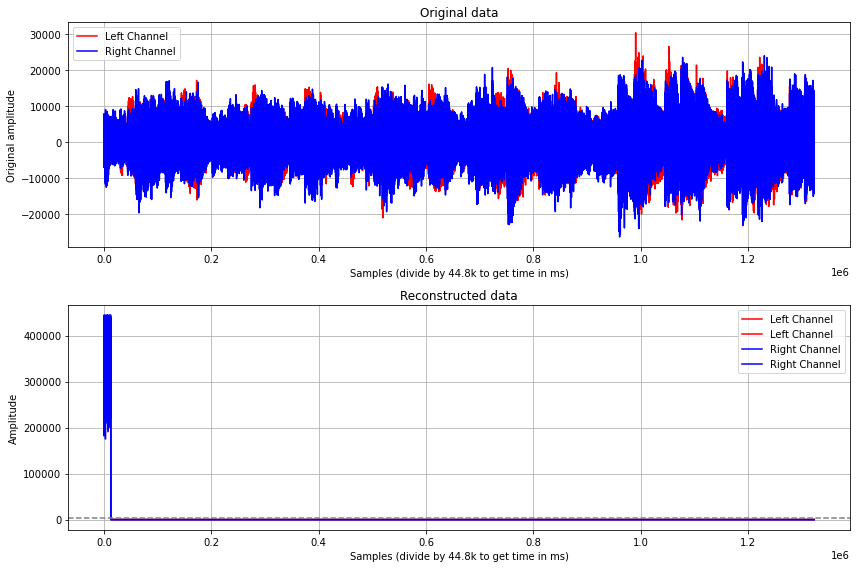

In [15]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.sparse import load_npz

def safe_load_npy(file_path, allow_pickle=False):
    if not os.path.isfile(file_path):
        print(f"Error: The file {file_path} does not exist.")
        return None
    
    try:
        data = np.load(file_path, allow_pickle=allow_pickle)
        print(f"Successfully loaded data from {file_path}.")
        return data
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

def safe_load_npz(file_path):
    if not os.path.isfile(file_path):
        print(f"Error: The file {file_path} does not exist.")
        return None
    
    try:
        data = load_npz(file_path)
        print(f"Successfully loaded sparse matrix from {file_path}.")
        return data
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

def get_idx_for_spike_count(spike_count):
    spike_values = np.load('results/current_spikes_values.npy')
    
    # Handle both 1D and 2D spike_values arrays
    if spike_values.ndim == 1:
        spike_counts = spike_values
    elif spike_values.ndim == 2:
        spike_counts = spike_values[:, 1]
    else:
        raise ValueError("Unexpected number of dimensions in spike values array.")

    idx = np.where(spike_counts == spike_count)[0]
    if len(idx) == 0:
        print(f"Warning: Spike count {spike_count} not found in spike values. Using default index -1.")
        return -1  # Return a default index or handle appropriately
    return idx[0]

def reconstruct_value_from_values(values):
    if len(values) != 6:
        raise ValueError("Expected 6 spike counts, but got: {}".format(len(values)))

    idx_neuron0 = get_idx_for_spike_count(values[0])
    idx_neuron1 = get_idx_for_spike_count(values[1])
    idx_neuron2 = get_idx_for_spike_count(values[2])
    idx_neuron3 = get_idx_for_spike_count(values[3])
    idx_neuron4 = get_idx_for_spike_count(values[4])
    idx_neuron5 = get_idx_for_spike_count(values[5])

    # Default behavior if index is -1
    if idx_neuron0 == -1 or idx_neuron1 == -1 or idx_neuron2 == -1 or idx_neuron3 == -1 or idx_neuron4 == -1:
        return np.nan  # or another default behavior

    value = idx_neuron0 + \
            idx_neuron1 * 10 + \
            idx_neuron2 * 100 + \
            idx_neuron3 * 1000 + \
            idx_neuron4 * 10000

    if idx_neuron5 == 1:
        value *= -1
    
    return value

def reconstruct_value(normalised_3Dmat_left, normalised_3Dmat_right, x, y, data):
    simulation_ts = 52  # ms
    number_neurons_sample = 6
    reconstructed_vector = np.zeros((x, y, 2))

    idx = 0
    for ts in tqdm(range(0, normalised_3Dmat_left.shape[1], simulation_ts), desc="Processing simulation time-steps"):
        for neuron in range(0, normalised_3Dmat_left.shape[0], number_neurons_sample):
            chunk_left = normalised_3Dmat_left[neuron:neuron + number_neurons_sample, ts:ts + simulation_ts].toarray()
            chunk_right = normalised_3Dmat_right[neuron:neuron + number_neurons_sample, ts:ts + simulation_ts].toarray()

            spike_counts_left = np.sum(chunk_left, axis=1)
            spike_counts_right = np.sum(chunk_right, axis=1)

            # Debugging output to verify spike counts
            print(f"Spike counts left: {spike_counts_left}")
            print(f"Spike counts right: {spike_counts_right}")

            reconstructed_value_left = reconstruct_value_from_values(spike_counts_left)
            reconstructed_value_right = reconstruct_value_from_values(spike_counts_right)

            reconstructed_vector[idx, 0] = reconstructed_value_left
            reconstructed_vector[idx, 1] = reconstructed_value_right
            idx += 1

    np.save(f"results/reconstructed_{data}.npy", reconstructed_vector)
    return reconstructed_vector

def plot_reconstructed_vector(reconstructed_data, original_data, data_name):
    if original_data.size == 0 or reconstructed_data.size == 0:
        print("Error: No data to plot.")
        return

    plt.figure(figsize=(12, 8))

    # Plot original data
    plt.subplot(2, 1, 1)
    plt.plot(original_data[:, 0], label='Left Channel', color='red')
    plt.plot(original_data[:, 1], label='Right Channel', color='blue')
    plt.xlabel('Samples (divide by 44.8k to get time in ms)')
    plt.ylabel('Original amplitude')
    plt.title(f'Original {data_name}')
    plt.legend()
    plt.grid()

    # Plot reconstructed data
    plt.subplot(2, 1, 2)
    plt.plot(reconstructed_data[:, 0], label='Left Channel', color='red')
    plt.plot(reconstructed_data[:, 1], label='Right Channel', color='blue')
    plt.xlabel('Samples (divide by 44.8k to get time in ms)')
    plt.ylabel('Amplitude')
    plt.title(f'Reconstructed {data_name}')
    plt.legend()
    plt.grid()

    # Add a horizontal line to help visualize flat regions
    plt.axhline(y=np.nanmean(reconstructed_data), color='gray', linestyle='--')

    # Save and show the plots
    plt.tight_layout()
    plt.savefig(f"results/{data_name}_results.png")
    plt.show()

# Load files safely
original_signal = safe_load_npy('results/data.npy')
original_rate = safe_load_npy('results/rate.npy')
normalised_3Dmat_left = safe_load_npz("results/normalised_3Dmat_data_left.npz")
normalised_3Dmat_right = safe_load_npz("results/normalised_3Dmat_data_right.npz")

# Check if all files are loaded properly before proceeding
if (original_signal is None or original_rate is None or 
    normalised_3Dmat_left is None or normalised_3Dmat_right is None):
    print("One or more files could not be loaded. Please check the file paths and formats.")
else:
    # Perform reconstruction and plotting for single sound
    data_name = "data"
    reconstructed_matrix = reconstruct_value(normalised_3Dmat_left, normalised_3Dmat_right, original_signal.shape[0], original_signal.shape[1], data_name)
    
    # Print some details about the reconstructed data for verification
    print(f"Reconstructed data shape: {reconstructed_matrix.shape}")
    print(f"First few values of reconstructed data: {reconstructed_matrix[:5]}")

    plot_reconstructed_vector(reconstructed_matrix, original_signal, data_name)
